In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from scipy.stats import pearsonr, spearmanr, kendalltau
import seaborn as sns
import os
pd.set_option('future.no_silent_downcasting', True)
from typing import Literal, Dict, Any

# Economic, Governance, and Educational Drivers of University Rankings: A Comparative and Correlational Study (2017–2022)



### Author Ivan Georgiev Georgiev 

## Abstract 

This study examines the relationship between national economic, governance, and educational indicators and the performance of countries in the QS World University Rankings from 2017 to 2022. Focusing on the top ten countries by total score each year, it compares their standings with the top ten countries ranked by gross domestic product (GDP), government effectiveness, research and development (R&D) expenditure, and government spending on education. The analysis is further extended to include primary, secondary, and tertiary school enrolment rates as additional educational metrics. Relationships between these indicators and QS total scores are examined using Pearson’s, Spearman’s, and Kendall’s correlation methods to assess the strength and direction of the associations between these indicators and QS total scores. The findings provide insight into whether strong economic performance and governance are directly linked to higher education quality as reflected in global rankings, and identify the factors most strongly associated with national academic excellence.

## Introduction 

University rankings, such as the QS World University Rankings, are widely regarded as key benchmarks of educational quality and global academic competitiveness. Countries that consistently host top-performing institutions often emerge as knowledge hubs, attracting international students, faculty, and investment. As such, understanding the drivers behind a nation’s ranking performance is not only valuable for higher education policy but also for long-term socio-economic planning.

While many analyses focus on institutional-level performance, there is growing interest in how national contexts influence global rankings. Economic strength—reflected in indicators such as gross domestic product (GDP) often signals a country’s capacity to invest in education, research, and infrastructure. Governance quality, measured through indices such as government effectiveness, may affect the efficiency of these investments, while educational factors such as enrolment rates across primary, secondary, and tertiary levels—capture the breadth of a nation’s human capital pipeline.

University rankings have become an influential benchmark for assessing higher education systems worldwide, shaping perceptions of academic quality, research productivity, and global competitiveness. The QS World University Rankings evaluate institutions on different criteria including academic reputation, research impact, faculty–student ratio, and internationalization. However, the extent to which these measures reflect broader national conditions remains an open question. 

This study investigates the relationship between national economic, governance, and educational indicators and the performance of countries in the QS World University Rankings between 2017 and 2022. To ensure a consistent and comparable sample across years, the analysis focuses on the top 300 universities in each annual ranking. This selection captures a broad representation of high-performing institutions while maintaining data quality and reducing the influence of smaller, less comparable entries.

The analysis examines the top ten countries by QS total score in each year and compares them to the top ten countries ranked by key macroeconomic and governance indicators: gross domestic product (GDP), government effectiveness, research and development (R&D) expenditure, and government spending on education. Additionally, primary, secondary, and tertiary school enrolment rates are incorporated to provide a more comprehensive view of national educational ecosystems.

The research is structured in two main parts. The first part is a comparative analysis of rankings across these indicators, highlighting overlaps and discrepancies between countries leading in higher education and those excelling economically or in governance. The second part applies classical statistical correlation techniques  Pearson’s correlation coefficient, Spearman’s rank correlation, and Kendall’s tau to quantify relationships between the QS total score and each indicator. We believe that this combined approach provides both descriptive and inferential insights, clarifying how national conditions align with global academic performance.

Motivation University rankings play a critical role in shaping international education policy, research funding, and student decision-making. While many analyses focus on institutional performance, this project shifts the lens to the country level, offering insights into how macroeconomic and social conditions influence national academic outcomes.

- Motivation. University rankings shape international education policy, research funding priorities, and student decision-making. By shifting the focus to the country level, this study offers a broader perspective on how macroeconomic and governance factors influence national academic outcomes.

- Research Question. To what extent do indicators such as GDP per capita, government effectiveness, and R&D investment correlate with national performance in the QS World University Rankings?

- Significance. Identifying the macro-level drivers of academic performance can guide policy, foster international collaboration, and inform investment strategies. The findings may also help anticipate changes in global competitiveness, highlighting which countries are poised to advance—or decline—in the coming years.

## Previous Work Preview 

Research on the determinants of university rankings has examined economic, governance, and educational dimensions, often linking macro-level national characteristics to higher education outcomes. Previous studies have explored how a country’s wealth, governance quality, research investment, and policy initiatives influence its representation in global rankings such as QS, THE, and ARWU. This literature is directly relevant to the present study, as it provides both empirical evidence and methodological approaches for assessing how national contexts affect academic performance. Moreover, critical perspectives on the limitations of rankings offer necessary caution when interpreting these measures in relation to broader socio-economic and educational realities.

In summary, prior research underscores several recurring themes:
- Strong links between higher education excellence and GDP per capita, particularly via broader (rather than elite) university presence. Telias (2014) examined 2013 ARWU data for universities ranked in the top 100–500, finding a strong positive correlation between the number of top 500 universities per capita and GDP per capita—stronger than for top 100 universities. The study concluded that broader “decent” university systems are more closely linked to economic outcomes than a small elite tier. It also highlighted “freedom from corruption” as a key complementary institutional factor, while finding no link between university presence and GDP growth. Also, 
Lu (2014) reached similar conclusions using ARWU data, reporting that GDP per capita is strongly associated with the number of universities in global rankings, but GDP growth is not. Pietrucha (2018), through regression analysis across ARWU, THE, and QS rankings, found that GDP, R&D expenditure, education spending per tertiary student, and governance quality (e.g., government effectiveness) are significant determinants of university ranking scores. Recentlly, Agasisti & Bertoletti (2022) analyzed Universitas 21 National Higher Education System Rankings and found that GDP per capita and R&D expenditure (% of GDP) were significant predictors of system-level ranking performance, along with non-economic factors such as institutional connectivity and regulatory quality.

- Governance and institutional quality significantly shape both economic and educational performance.
Kaufmann, Kraay, & Mastruzzi (2011) developed the Worldwide Governance Indicators (WGI) framework, widely used to measure governance quality, including government effectiveness, rule of law, and corruption control—factors repeatedly linked to development and educational outcomes. In his study, Pietrucha (2018) explicitly included governance indicators in his models, confirming that government effectiveness is a significant determinant of university ranking scores, often in combination with economic capacity. Whetsell et al. (2019) found that democratic governance is positively correlated with national scientific performance, with the relationship moderated by factors such as economic complexity and globalization.

- Research funding, R&D investment, and institutional size as drivers of ranking performance.
Benito et al. (2019), analyzing QS top 300 universities, found that public funding levels explain up to 51% of variance in ranking position, with top 100 universities having two to three times the funding of lower tiers. Public funding was critical for 84% of top universities, especially in Europe, while private funding played a lesser role. Meo et al. (2013), focusing on 40 Asian countries from 1996–2011, found strong correlations between research outputs (publications, citations, H-index) and R&D spending, number of universities, and indexed journals, but no significant link with GDP per capita.Prathap (2014) reinforced these findings globally, reporting strong positive correlations between R&D expenditure and both academic outputs and rankings.Guo (2023) provided evidence from a policy perspective, showing that national higher education initiatives can raise QS rankings by 12–17 places on average, with even larger gains in ARWU—particularly in Asia-Pacific countries.

## Correlation  Methods General Principles 

In order to quantify the relationships between the QS total score and the selected economic and educational indicators, this study applies three complementary correlation measures: Pearson’s $r$, Spearman’s $ρ$, and Kendall’s $τ$. Each method captures different aspects of association between variables and helps ensure that results are robust to differences in scale, distribution, and relationship form. 

### Pearson Correlation Coefficient 
The Pearson correlation coefficient $r$ measures the strength and direction of the linear relationship between two quantitative variables.

Pearson’s correlation coefficient (r) measures the strength and direction of the linear relationship between two variables. It captures how closely the data points cluster around a straight line:

- A positive correlation means both variables increase together.

- A negative correlation means one variable increases while the other decreases.

- A value close to zero suggests little to no linear relationship.

Its value lies in the range: $ −1≤r≤1 $ 
- r = 1: perfect positive linear relationship 
- r = −1: perfect negative linear relationship
- r = 0: no linear correlation

**Definition** 

Let’s say we have two variables:

$$
X = (x_1, x_2, \dots, x_n)
$$
$$
Y = (y_1, y_2, \dots, y_n)
$$

with sample size $n$.

The Pearson correlation coefficient, denoted as $r$, measures the strength and direction of a $\mathbf{linear}$ relationship between two continuous variables. Its value lies within the interval $[-1, 1]$, where $r = +1$ indicates perfect positive correlation, $r = -1$ indicates perfect negative correlation, and $r = 0$ indicates no linear correlation.


\begin{equation}
r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}
{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2} \cdot \sqrt{\sum_{i=1}^{n} (y_i - \bar{y})^2}}
\end{equation}
where $x_i, y_i$ are paired observations, and $\bar{x}, \bar{y}$ denote their respective means.

This formula has three parts:

(a) Covariance
The numerator: 

$$
\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})
$$

This is proportional to the sample covariance between $( X $) and $( Y $):

$
\mathrm{Cov}(X, Y) = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{n - 1}
$

Covariance measures how two variables vary together:

Positive → when $X$ is above its mean, $Y$ tends to be above its mean.

Negative → when $X$ is above its mean, $X$ tends to be below its mean. 

(b) Normalization (Standard Deviations)

The denominator:

$$
\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2} \cdot \sqrt{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$

is proportional to:

$$
(n - 1) \cdot s_X \cdot s_Y
$$

where:

$$
s_X = \sqrt{\frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n - 1}}
$$
is the sample standard deviation of $( X $),

$$
s_Y = \sqrt{\frac{\sum_{i=1}^{n} (y_i - \bar{y})^2}{n - 1}}
$$
is the sample standard deviation of $( Y $).

Dividing the covariance by $s_X$ $s_Y$ standardizes it, making $r$ unitless and bounded between -1 and 1. 

- The Full Relationship   

Combining the ideas:

$$
r = \frac{\mathrm{Cov}(X, Y)}{s_X \cdot s_Y}
$$

This shows that $( r $) is the \mathbf{normalized covariance}.

- Principles Behind $r$

 - Unit-Free Measure
Covariance depends on the units (e.g., meters × seconds).

Pearson’s $r$ divides by the product of the standard deviations, removing units and allowing comparisons across datasets.

 - Centering Around the Mean
We measure deviations from the mean, not raw values.

This ensures the coefficient reflects relative movements.

 - Linearity Assumption $r$ only captures linear relationships. 

Two variables can have $r≈0$ but still have a strong nonlinear relationship.

Assumptions:
- Linear relationship between variables.
- Continuous and normally distributed variables.
- Homoscedasticity (equal variance across the range).

Relevance:

In this project, Pearson’s $r$ will help determine whether changes in an indicator (e.g., GDP per capita) are proportionally associated with changes in QS total score. In the context of this study, Pearson's $r$ identifies whether indicators such as GDP per capita or literacy rate exhibit a direct proportionality with the QS $\mathbf{total\_score}$. 

### Spearman’s Rank Correlation Coefficient 

The **Spearman correlation coefficient** denoted as $\rho$ or $r_s$ is a **non-parametric measure of statistical dependence** between two variables.  
Unlike Pearson’s correlation, which measures the *strength of a linear relationship*, Spearman’s $rho$ evaluates the *strength and direction of a monotonic relationship*.  

A **monotonic relationship** means that as one variable increases, the other either always increases or always decreases (not necessarily at a constant rate).

#### Mathematical Definition

##### Rank Transformation
Given two variables:
$$
X = (x_1, x_2, \dots, x_n), \quad Y = (y_1, y_2, \dots, y_n)
$$

Transform them into ranks:
$$
R(x_i) = \text{rank of } x_i, \quad R(y_i) = \text{rank of } y_i
$$

##### Formula (No Ties Case)
If there are no tied ranks:

$$
\rho = 1 - \frac{6 \sum_{i=1}^{n} d_i^2}{n(n^2 - 1)}
$$

where  
- \( d_i = R(x_i) - R(y_i) \) = difference in ranks,  
- \( n \) = number of observations.

##### General Formula (With Ties)
In general, Spearman’s \( \rho \) is the **Pearson correlation coefficient** computed on ranks:

$$
\rho = \frac{\text{Cov}(R_X, R_Y)}{\sigma_{R_X}\sigma_{R_Y}}
$$

where  
- \( R_X, R_Y \) = rank-transformed variables,  
- \(\text{Cov}\) = covariance,  
- \(\sigma\) = standard deviation.  

This version handles **ties** correctly.

##### Properties

- Range: \(-1 \leq \rho \leq 1\)  
- $( \rho$ = 1 \): perfect positive monotonicity (variables increase together).  
- $( \rho$ = -1 \): perfect negative monotonicity (one increases, the other decreases).  
- $( \rho$ \approx 0 \): no monotonic association.

##### Interpretation vs. Pearson’s r

- **Pearson’s r**: Measures *linear correlation*, assumes normality.  
- **Spearman’s ρ**: Measures *rank-based monotonic correlation*, robust to outliers.  

Example: If \( Y = X^2 \), Pearson’s \( r \) may be near 0, while Spearman’s \( \rho \) still shows strong monotonic dependence (on restricted domains).

##### Hypothesis Testing

We can test:

$$
H_0: \rho = 0 \quad \text{(no monotonic relationship)}
$$
$$
H_1: \rho \neq 0 \quad \text{(monotonic relationship exists)}
$$

For \( n > 30 \), significance testing approximates normal distribution (after Fisher transformation). For small \( n \), exact critical values are used.

##### Advantages

- Non-parametric (no distribution assumptions).  
- Robust to outliers.  
- Works with **ordinal data**.  
- Detects monotonic but nonlinear relationships.  

#### Example Calculation

Suppose:

| Obs | \(X\) | \(Y\) | Rank(X) | Rank(Y) | \(d_i\) | \(d_i^2\) |
|-----|-------|-------|---------|---------|---------|-----------|
| 1   | 10    | 100   | 1       | 1       | 0       | 0         |
| 2   | 20    | 300   | 2       | 3       | -1      | 1         |
| 3   | 30    | 200   | 3       | 2       | 1       | 1         |
| 4   | 40    | 400   | 4       | 4       | 0       | 0         |

\[
\sum d_i^2 = 2, \quad n=4
\]

\[
\rho = 1 - \frac{6 \cdot 2}{4(4^2 - 1)} = 1 - \frac{12}{60} = 0.8
\]

This indicates a **strong positive monotonic relationship**.

#### Application to This Project

In this project, Spearman’s \( \rho \) is particularly useful:  
- Economic and educational indicators may not relate **linearly** to QS rankings.  
- A monotonic relationship is sufficient (e.g., higher GDP per capita generally → higher rankings, but not in a proportional way).  
- Robustness to outliers ensures unusual data points (e.g., very small or very large countries) do not distort results.

Works with ordinal data or when the variables do not meet normality assumptions. Captures non-linear but monotonic relationships. In this project, Spearman’s $\rho$ is useful when increases in an economic or educational indicator correspond to increases in QS rankings, but not necessarily in a proportional manner.

### Kendall’s Tau 

**Kendall’s tau (τ)** is a **non-parametric rank-based measure** of the strength and direction of association between two variables.  
It evaluates how similar the **orderings** of two datasets are by counting **concordant** and **discordant** pairs of observations.

#### 1. Definition

Given \( n \) paired observations:
$$
(x_1, y_1), (x_2, y_2), \dots, (x_n, y_n)
$$

We consider all possible pairs of observations \( (i, j) \) with \( i < j \).  
There are \(\binom{n}{2} = \frac{n(n-1)}{2}\) such pairs.

- **Concordant pair**:  
  A pair \((x_i, y_i), (x_j, y_j)\) is *concordant* if the ranks of both elements agree:  
  $$
  (x_i - x_j)(y_i - y_j) > 0
  $$

- **Discordant pair**:  
  A pair is *discordant* if the ranks disagree:  
  $$
  (x_i - x_j)(y_i - y_j) < 0
  $$

- **Ties**:  
  If either \( x_i = x_j \) or \( y_i = y_j \), the pair is neither concordant nor discordant (special tie adjustments exist).

#### Formula

Let:  
- \( C \) = number of concordant pairs  
- \( D \) = number of discordant pairs  

#### Kendall’s Tau (no ties):
$$
\tau = \frac{C - D}{\tfrac{1}{2}n(n-1)}
$$

#### Kendall’s Tau-b (adjusted for ties):
When ties are present, a more general version is used:

$$
\tau_b = \frac{C - D}{\sqrt{(C + D + T_x)(C + D + T_y)}}
$$

where  
- \( T_x \) = number of tied pairs in variable \( X \),  
- \( T_y \) = number of tied pairs in variable \( Y \).  

This adjustment ensures \( \tau_b \) still lies in \([-1, 1]\).

#### Properties

- **Range**:  
  \(-1 \leq \tau \leq 1\)  

- **Interpretation**:  
  - \( \tau = 1 \): perfect agreement in rankings (all pairs concordant).  
  - \( \tau = -1 \): perfect disagreement (all pairs discordant).  
  - \( \tau = 0 \): no association (roughly half concordant, half discordant).  

- **Symmetry**:  
  Swapping \( X \) and \( Y \) does not change \( \tau \).

#### Comparison with Spearman’s ρ

- Both are **rank-based** measures of association.  
- **Spearman’s ρ**: based on correlation of **ranks** (sensitive to magnitude of rank differences).  
- **Kendall’s τ**: based on **pairwise concordance/discordance** (directly interpretable as probability of agreement).  

Interpretation:  
$$
\tau = P(\text{concordant}) - P(\text{discordant})
$$

This probability-based interpretation makes Kendall’s τ more intuitive and often preferred for ranking problems.

#### Hypothesis Testing

We test:
$$
H_0: \tau = 0 \quad \text{(no association)}
$$
$$
H_1: \tau \neq 0 \quad \text{(association exists)}
$$

For large \( n \), significance testing uses an approximate normal distribution. Exact tests exist for small \( n \).

#### 6. Example

Suppose we have the pairs:

| Obs | \(X\) | \(Y\) |
|-----|-------|-------|
| 1   | 12    | 30    |
| 2   | 15    | 40    |
| 3   | 14    | 35    |

All pairs (\(\binom{3}{2} = 3\)):  
- Pair (1,2): \( (12-15)(30-40) > 0 \) → concordant  
- Pair (1,3): \( (12-14)(30-35) > 0 \) → concordant  
- Pair (2,3): \( (15-14)(40-35) > 0 \) → concordant  

So \( C=3, D=0 \).  

\[
\tau = \frac{3 - 0}{3} = 1
\]

Perfect agreement in rankings.

#### Application to This Project

Kendall’s \( \tau \) is particularly appropriate when:  
- Comparing **rankings of countries** across QS scores and other indicators (GDP, R&D, etc.).  
- The question of interest is: *How consistent are the rankings between two variables?*  
- Its probabilistic interpretation makes results more intuitive for rank comparisons in national indicators.

Advantages:

More robust to small sample sizes than Pearson’s $r$ and Spearman’s $ρ$. Particularly useful when data contain many tied ranks. 

Each method addresses a different type of relationship:

- Pearson’s $r$ — linear relationships, sensitive to magnitude.

- Spearman’s $ρ$ — monotonic relationships, based on ranks.

- Kendall’s $τ$ — rank agreement, robust to small samples and ties.

Using all three ensures a comprehensive understanding of how economic, governance, and educational factors relate to QS rankings. These methods together offer a comprehensive view of the relationships between national-level economic and educational performance and global university rankings.

### Top-20 Comparative Overlap

To evaluate the similarity between the top-performing countries by QS total\_score and those ranked highly in a given indicator, the **overlap percentage** is calculated:

\begin{equation}
\text{Overlap\%} = \frac{|T_Q \cap T_I|}{10} \times 100
\end{equation}
where $T_Q$ is the set of top 10 countries by QS score, and $T_I$ is the set of top 10 countries by a given indicator.

This metric provides a direct measure of elite-set similarity between the QS rankings and indicator-based rankings.

### Data Standardization

Since economic and educational indicators are measured on different scales, variables are standardized before correlation analysis:

\begin{equation}
Z_{i} = \frac{x_i - \mu}{\sigma}
\end{equation}
where $\mu$ is the mean and $\sigma$ is the standard deviation of the variable.

Standardization ensures comparability and prevents scale differences from biasing the correlation analysis.

## Experiment Setup and Methodology

### Data Sources

This study integrates multiple datasets covering **2017–2022** period. The datasets are shown bellow: 

#### University Rankings
- **QS World University Rankings (2017–2022)** — Kaggle dataset by *padhmam*.  
  Link: <https://www.kaggle.com/datasets/padhmam/qs-world-university-rankings-2017-2022>  
  **Coverage:** world; 2017–2022.  
  **Fields used:** university, country, score, rank; aggregated to country‑year.  
  
#### Macroeconomic & Governance Indicators
- **GDP per capita (current US$)** — World Bank indicator **NY.GDP.PCAP.CD**.  
  Link: <https://data.worldbank.org/indicator/NY.GDP.PCAP.CD>  
  
- **Government Effectiveness (percentile rank)** — Worldwide Governance Indicators **GE.EST**.  
  Link: <https://info.worldbank.org/governance/wgi/>  
  
- **R&D expenditure (% of GDP)** — World Bank indicator **GB.XPD.RSDV.GD.ZS**.  
  Link: <https://data.worldbank.org/indicator/GB.XPD.RSDV.GD.ZS>  
  
- **Government spending on education (% of GDP)** — World Bank indicator **SE.XPD.TOTL.GD.ZS**.  
  Link: <https://data.worldbank.org/indicator/SE.XPD.TOTL.GD.ZS>   

#### Educational Enrolment Indicators
- **Gross enrolment: Primary, Secondary, Tertiary (%)** — Kaggle “World Education Dataset” by *bushraqurban*.  
  Link: <https://www.kaggle.com/datasets/bushraqurban/world-education-dataset>  
  **Mapped World Bank indicators:**  
  - Primary: **SE.PRM.ENRR**  
  - Secondary: **SE.SEC.ENRR**  
  - Tertiary: **SE.TER.ENRR**    

### Data Preprocessing

For the purposes of this study, we extract the top 300 universities for each year in the 2017–2022 period. This subset provides a balance between global diversity and ensuring that included institutions meet a high academic standard. Limiting the dataset to this range also reduces the number of missing or incomplete records, thereby improving the robustness of the subsequent correlation and comparative analyses.

All datasets were harmonized and prepared for analysis using the following steps:

1. **Country Name Harmonization**  
   - Standardized country names across all datasets (QS rankings, economic, governance, and educational) to ensure consistent merging.  
   - Resolved variations (e.g., “United States of America” → “United States”) using a mapping dictionary.

2. **Temporal Filtering**  
   - Retained only observations for the period **2017–2022** to align with the QS dataset’s coverage and ensure temporal consistency across all sources.

3. **Top-Ten Selection (Per Year)**  
   - Identified **top 10 countries by QS total score**.  
   - Identified **top 10 countries** for each economic, governance, and educational indicator individually.  
   - These lists were later used for overlap analysis.

4. **Missing Data Handling**  
   - Dropped years or indicators exhibiting excessive missingness (e.g., >30% of observations missing).  
   - Applied **linear interpolation** for remaining gaps within time series when indicator coverage was otherwise sufficient.  
   
5. **Data Aggregation & Alignment**  
   - Aggregated QS total scores to the **country–year** level.  
   - Aligned economic, governance, and enrolment indicators to the same country–year keys.  
   - Merged into a unified analysis dataframe, ensuring no loss of valid country–year observations.

6. **Quality Checks**  
   - Verified indicator units and ranges (e.g., GDP per capita in current USD, enrolment rates as % gross).  
   - Checked for duplicates and ensured each country–year pair was unique.  
   - Conducted exploratory checks for outliers using boxplots before proceeding to statistical analysis.
   
7. **Gross enrollment ratio** and net enrollment rate. The gross enrollment ratio includes all students enrolled in primary school, regardless of their age, while the net enrollment rate includes only those within the official primary school age range. Both are calculated as a percentage of the relevant population

### Performance Metrics

Because this study focuses on **relationships** rather than **predictions**, evaluation relies on statistical measures of association and ranking similarity instead of predictive error metrics.

#### Correlation Coefficients
To quantify the strength and direction of relationships between the QS total score and each economic, governance, and educational indicator, the following measures were used:

- **Pearson’s *r*** — Measures the **linear** relationship between two continuous variables.  
  Range: \([-1, 1]\), with \(+1\) indicating perfect positive correlation.

- **Spearman’s ρ** — Measures **monotonic** relationships based on ranked data, less sensitive to outliers.

- **Kendall’s τ** — Measures **rank concordance**, capturing the proportion of agreement between ranked pairs.

These metrics were calculated for each indicator over the 2017–2022 period.

#### Rank Overlap
To assess the similarity between country rankings, the Rank Overlap (%) is calculated as the percentage of countries common to two top-10 lists for the same year (e.g., top 10 by QS total score vs. top 10 by GDP per capita).
This metric is computed separately for each year and each indicator, revealing areas of alignment or divergence between university rankings and selected national indicators.

$$\begin{equation}
\text{Overlap\%} = \frac{|T_Q \cap T_I|}{10} \times 100
\end{equation}$$


**Rationale:**  
- Correlation coefficients capture the **degree of association** between indicators and QS scores across the full dataset.  
- Rank overlap quantifies **positional similarity** in the highest-performing countries, which is relevant for policy and strategic comparison.

### Instance Generation

For the purposes of comparison, this study generates instances focusing on the **top 10 countries** according to three different ranking-based metrics:

1. **Total QS Score (Primary Metric)**  
   - Defined as the **sum of all ranked universities’ scores** within a country.  
   - Captures both the **scale** (number of ranked institutions) and the **quality** (individual scores) of a country’s higher education system.  
   - Offers a balanced measure that avoids the limitations of:
     - **Number of universities alone**, which ignores academic performance.
     - **Average score alone**, which may overrepresent countries with only a small number of elite universities.

2. **Average QS Score per Institution (Supplementary Metric)**  
   - Highlights cases where countries achieve exceptional **per-institution quality** despite a small presence in the rankings.  
   - Example: Singapore’s consistently high average score reflects a concentrated set of world-class universities, illustrating that **per-institution excellence** does not necessarily correlate with overall system size.

3. **Number of Ranked Universities (Supplementary Metric)**  
   - Indicates the breadth of representation in global rankings.  
   - Useful for identifying systems with extensive international presence, even if per-institution quality varies.

### Rationale
Using multiple metrics allows for a **multi-dimensional view** of national performance in the QS World University Rankings.  
- **Total score** provides the most comprehensive single measure, balancing scale and quality.  
- **Average score** highlights exceptional concentration of excellence.  
- **Number of universities** emphasizes breadth of international representation.

### Comparative Analysis

Rank Overlap Analysis was used to quantify the intersection between the **top 10 countries by QS total score** and the **top 10 countries** for each external indicator.  
For each year (2017–2022), we compute the **overlap percentage**:  
\begin{equation}
\text{Overlap\%} = \frac{|T_Q \cap T_I|}{10} \times 100
\end{equation}
where $T_Q$ is the set of top 10 countries by QS score, and $T_I$ is the set of top 10 countries by a given indicator.

### Trend Comparison
- Track and compare **indicator trajectories** for countries consistently present in the QS top 10.
- Examine **rank shifts over time** for both QS scores and external indicators to identify convergence or divergence in performance trends.

### Correlation Analysis

The correlation analysis is used to quantify associations between QS total score and external indicators. The following measures were used:

- **Pearson’s $r$** — Measures the strength and direction of **linear** relationships between two continuous variables.
- **Spearman’s $ρ$** — Measures **monotonic** relationships based on ranked data; less sensitive to outliers.
- **Kendall’s $τ$** — Measures **rank concordance**, reflecting the proportion of agreement between pairs of ranked observations.

### Variables Tested
- **Dependent variable:** QS total score.
- **Independent variables:**
  - GDP per capita (current US\$)
  - Government effectiveness (percentile rank)
  - R&D expenditure (% of GDP)
  - Government spending on education (% of GDP)
  - Primary school enrolment (% gross)
  - Secondary school enrolment (% gross)
  - Tertiary school enrolment (% gross)

### Significance Testing
- Reported **p-values** alongside all correlation coefficients.
- Highlighted **statistically significant** relationships where \( p < 0.05 \).

## QS University Dataset - Exploratory Data Analysis 

### Data Overview
For the QS World University Ranking dataset, the analysis begins with a general overview to understand its structure and content. Since this study focuses on the top 300 universities in each annual ranking (2017–2022), the initial step is to filter the dataset to this subset. This selection captures a broad range of high-performing institutions while ensuring consistency across years and reducing the influence of smaller, less comparable entries.

The overview process includes:

- Displaying basic metadata such as the number of unique countries represented and the range of years covered.

- Presenting sample rows to inspect the data format.

- Examining column data types to ensure compatibility with subsequent analyses.

- Checking for missing values and assessing their extent and distribution within the top 300 subset.

- Identifying and handling duplicate entries.

Additionally, we compute basic descriptive statistics for numerical columns, review unique value counts for categorical fields, and check for potential inconsistencies in country or university names.

### Data Cleaning
The data cleaning process ensures the QS dataset is accurate, consistent, and ready for analysis. Key steps include:

- Filtering: The dataset is restricted to the top 300 universities per year (2017–2022) to create a consistent and comparable sample.

- Missing values: Within this filtered subset, we identify seven missing score values for 2018 - 2, for 2019 - 2 and for 2020 - 3. Given their small proportion, these rows are removed rather than imputed.

- Standardization of country names: Country names are harmonized to ensure consistency and alignment with external datasets for merging.

- Outlier detection: Boxplots are used to identify potential outliers in university scores. Countries with unusually high or low scores are reviewed to determine whether they reflect valid observations or data errors.

- Data type verification: Numerical columns are confirmed to have the correct data type for statistical analysis, and categorical fields (e.g., country, university name) are stored as strings.

These steps yield a clean and standardized dataset of top-ranking institutions, minimizing the risk of bias or error in the subsequent correlation, regression, and ranking analyses.

In [20]:
# Load dataset
df_rank = pd.read_csv("data/world-university-rankings-2017-to-2022.csv")

In [21]:
# Display basic information
## df_rank.info()

In [22]:
# df_rank.describe().T

In [23]:
df_rank.dtypes

university                 object
year                        int64
rank_display               object
score                     float64
link                       object
country                    object
city                       object
region                     object
logo                       object
type                       object
research_output            object
student_faculty_ratio     float64
international_students     object
size                       object
faculty_count              object
dtype: object

In [24]:
df_rank.head(5)

,university,year,rank_display,score,link,country,city,region,logo,type,research_output,student_faculty_ratio,international_students,size,faculty_count
0,Massachusetts Institute of Technology (MIT),2017,1,100.0,https://www.topuniversities.com/universities/m...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,4.0,"3,730",M,"3,065"
1,Stanford University,2017,2,98.7,https://www.topuniversities.com/universities/s...,United States,Stanford,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,3.0,"3,879",L,"4,725"
2,Harvard University,2017,3,98.3,https://www.topuniversities.com/universities/h...,United States,Cambridge,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,5.0,"5,877",L,"4,646"
3,University of Cambridge,2017,4,97.2,https://www.topuniversities.com/universities/u...,United Kingdom,Cambridge,Europe,https://www.topuniversities.com/sites/default/...,Public,Very high,4.0,"7,925",L,"5,800"
4,California Institute of Technology (Caltech),2017,5,96.9,https://www.topuniversities.com/universities/c...,United States,Pasadena,North America,https://www.topuniversities.com/sites/default/...,Private,Very High,2.0,692,S,968


In [25]:
num_countries_rank = df_rank['country'].nunique()
num_years_rank = df_rank['year'].nunique()
print(f"Ranking Dataset: {num_countries_rank} countries, {num_years_rank}years")

Ranking Dataset: 97 countries, 6years


In [26]:
print(df_rank.isnull().sum())

university                   0
year                         0
rank_display                68
score                     3662
link                         0
country                      0
city                       178
region                       0
logo                         0
type                        12
research_output              2
student_faculty_ratio       75
international_students     164
size                         2
faculty_count               78
dtype: int64


In [27]:
# Convert rank_display to numeric 
df_rank['rank_display'] = pd.to_numeric(df_rank['rank_display'], errors='coerce')

# Filter top 300 universities for each year
df_top300 = df_rank[df_rank['rank_display'] <= 300]

# Count missing scores
missing_count = df_top300['score'].isna().sum()
total_count = len(df_top300)
missing_percentage = (missing_count / total_count) * 100

print(f"Total entries in top 300: {total_count}")
print(f"Missing score entries: {missing_count}")
print(f"Missing percentage: {missing_percentage:.2f}%")

# check missing score by year
missing_by_year = df_top300.groupby('year')['score'].apply(lambda x: x.isna().sum())
print("\nMissing scores by year:")
print(missing_by_year)

Total entries in top 300: 1802
Missing score entries: 7
Missing percentage: 0.39%

Missing scores by year:
year
2017    0
2018    2
2019    2
2020    3
2021    0
2022    0
Name: score, dtype: int64


In [28]:
# save the new dataset in tables folder
df_top300.to_csv("tables/top300_universities.csv", index=False)

In [29]:
# check what is the shape of the table
df_top300.shape

(1802, 15)

In [30]:
# Keep only the columns needed 
df_clean = df_top300[["university", "year", "score", "country"]].copy()

We will create a global dictionary of country name replacements and we can reuse it across all of our datasets. 

In [32]:
# =====================================
# Global country name standardization
# =====================================

country_replacements = {
    # United States
    "USA": "United States",
    "U.S.A.": "United States",
    "United States of America": "United States",

    # United Kingdom
    "UK": "United Kingdom",
    "U.K.": "United Kingdom",
    "Great Britain": "United Kingdom",
    "England": "United Kingdom",  # sometimes appears separately

    # Russia
    "Russia": "Russian Federation",
    "Russian Fed.": "Russian Federation",
    "RU": "Russian Federation",

    # South Korea
    "Korea, South": "South Korea",
    "Republic of Korea": "South Korea",
    "Korea Republic": "South Korea",

    # North Korea
    "Korea, North": "North Korea",
    "Democratic People's Republic of Korea": "North Korea",

    # Iran
    "Iran, Islamic Rep.": "Iran",
    "Islamic Republic of Iran": "Iran",

    # Egypt
    "Egypt, Arab Rep.": "Egypt",
    "Arab Republic of Egypt": "Egypt",

    # Vietnam
    "Viet Nam": "Vietnam",

    # Czech Republic
    "Czechia": "Czech Republic",

    # Others common in World Bank / QS
    "Hong Kong SAR, China": "Hong Kong",
    "Macao SAR, China": "Macau",
    "China, Hong Kong SAR": "Hong Kong",
    "China, Macao SAR": "Macau",

    "Slovak Republic": "Slovakia",
    "Syrian Arab Republic": "Syria",
    "Türkiye": "Turkey",
    "Gambia, The": "Gambia",
    "Bahamas, The": "Bahamas",
    "Yemen, Rep.": "Yemen",
    "Lao PDR": "Laos",
    "Brunei Darussalam": "Brunei",
    "Côte d'Ivoire": "Ivory Coast",
    "Congo, Dem. Rep.": "Democratic Republic of the Congo",
    "Congo, Rep.": "Republic of the Congo"
}

def standardize_country_names(df: pd.DataFrame, col: str = "country") -> pd.DataFrame:
    """
    Harmonize country names in a dataframe for consistency across datasets.
    
    Parameters:
    -----------
    df : pd.DataFrame
        Input dataframe with a country column.
    col : str
        Column name containing country names (default: 'country').
    
    Returns:
    --------
    pd.DataFrame
        Dataframe with standardized country names.
    """
    if col not in df.columns:
        raise KeyError(f"Column '{col}' not found in dataframe")

    df[col] = (
        df[col]
        .astype(str)
        .str.strip()
        .replace(country_replacements)
    )
    return df

In [33]:
# Strip whitespace and title-case country names
df_clean["country"] = df_clean["country"].str.strip()

df_clean = standardize_country_names(df_clean, col="country")

df_clean["country"] = df_clean["country"].replace(country_replacements)

In [34]:
# Drop duplicates
df_clean = df_clean.drop_duplicates(subset=["university", "year", "country"])

In [35]:
# Since the missing values are 0.39 % we will drop them
df_clean = df_clean.dropna(subset=["score"])

In [36]:
# For sanity convert year and score to int and float 
df_clean["year"] = df_clean["year"].astype(int)
df_clean["score"] = df_clean["score"].astype(float)

In [37]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1795 entries, 0 to 5483
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   university  1795 non-null   object 
 1   year        1795 non-null   int32  
 2   score       1795 non-null   float64
 3   country     1795 non-null   object 
dtypes: float64(1), int32(1), object(2)
memory usage: 63.1+ KB


### Feature Engineering

For the QS World University Rankings dataset, we constructed country‑level features to enable consistent comparison across years (2017–2022):

- **Average score per country per year** — mean QS score of all ranked universities within a country.
- **Total score per country per year** — sum of QS scores of all ranked universities within a country.
- **Number of ranked universities per country per year** — count of institutions from a country appearing in the ranking.

These features support identifying patterns, trends, and correlations over time. We also compile and visualize the **Top 10 country lists** from three perspectives:
1) **Total QS score (2017–2022)**  
2) **Number of ranked universities**  
3) **Average score (2017–2022)**

**Rationale for Total Score as the Primary Metric**  
We decided to use total score as the principal indicator of national performance because, it captures both **breadth (how many institutions)** and **depth (how strong they are)** of the world institutions. In contrast, the **number of universities** ignores quality and also the results by countries are somewhat similar to the total score. The **average score** metric is skewed by countries with very few but elite institutions, like  Singapore - 2 universities, Hong Kong SAR - 6 universities and Argentina - one university. In that perspective total score reflects the combined educational and research strength of a country’s higher‑education system and according to our analysis is most suitable for assessing overall presence and influence.

**Overview of Average Score**  
Despite teh fact that, we decide to not used as our primary metric, average score remains a valuable complementary view, highlighting countries with fewer but exceptionally strong universities like Singapore, showing that per‑institution excellence does not always align with overall system scale.

In [39]:
# Make the total_score_df, in which total_score = sum of all university scores per country-year
total_score_df = (
    df_clean.groupby(["year", "country"], as_index=False)
      .agg(total_score=("score", "sum"))
)

print(total_score_df.head())

   year    country  total_score
0  2017  Argentina         65.8
1  2017  Australia        884.1
2  2017    Austria        139.0
3  2017    Belgium        318.7
4  2017     Brazil        107.0


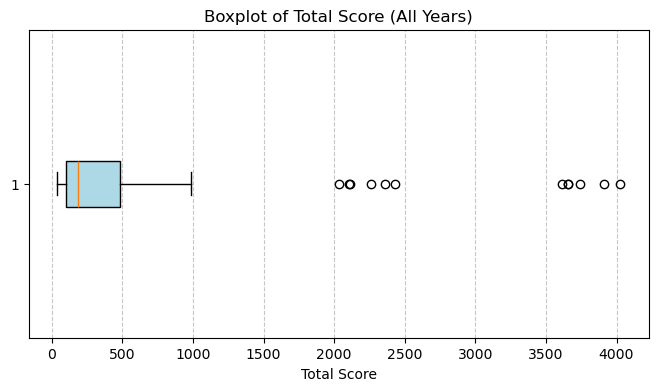

In [40]:
# Boxplot for total_score to visualize outliers
plt.figure(figsize=(8, 4))
plt.boxplot(total_score_df["total_score"], vert=False, patch_artist=True, 
            boxprops=dict(facecolor="lightblue"))

plt.title("Boxplot of Total Score (All Years)")
plt.xlabel("Total Score")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.savefig("plots/qs_total_score_trends.png", dpi=300, bbox_inches='tight')
plt.show()

In [41]:
# Make num_univ_df in which num_universities = count of unique universities per country-year
num_univ_df = (
    df_clean.groupby(["year", "country"], as_index=False)
      .agg(num_universities=("university", "nunique"))
)

print(num_univ_df.head())

   year    country  num_universities
0  2017  Argentina                 1
1  2017  Australia                15
2  2017    Austria                 3
3  2017    Belgium                 6
4  2017     Brazil                 2


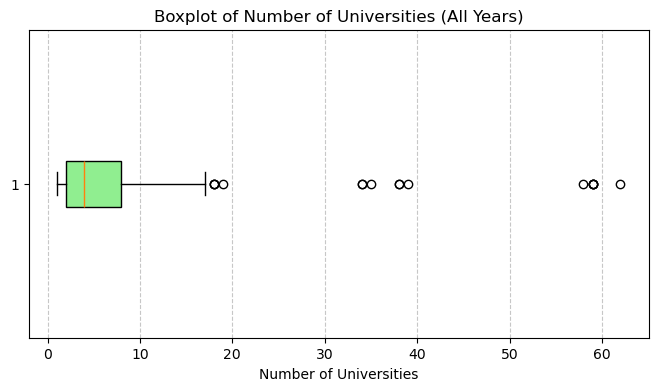

In [42]:
# Boxplot for num_universities
plt.figure(figsize=(8, 4))
plt.boxplot(num_univ_df["num_universities"], vert=False, patch_artist=True, 
            boxprops=dict(facecolor="lightgreen"))
plt.title("Boxplot of Number of Universities (All Years)")
plt.xlabel("Number of Universities")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.savefig("plots/num_universities_trends.png", dpi=300, bbox_inches='tight')
plt.show()

In [43]:
# Merge total_score_df and num_universities_df to new agg_df
agg_df = total_score_df.merge(num_univ_df, on=["year", "country"], how="left")

# Make avg_score_df in which avg_score = total_score / num_universities
agg_df["avg_score"] = agg_df["total_score"] / agg_df["num_universities"]

print(agg_df.head())

   year    country  total_score  num_universities  avg_score
0  2017  Argentina         65.8                 1  65.800000
1  2017  Australia        884.1                15  58.940000
2  2017    Austria        139.0                 3  46.333333
3  2017    Belgium        318.7                 6  53.116667
4  2017     Brazil        107.0                 2  53.500000


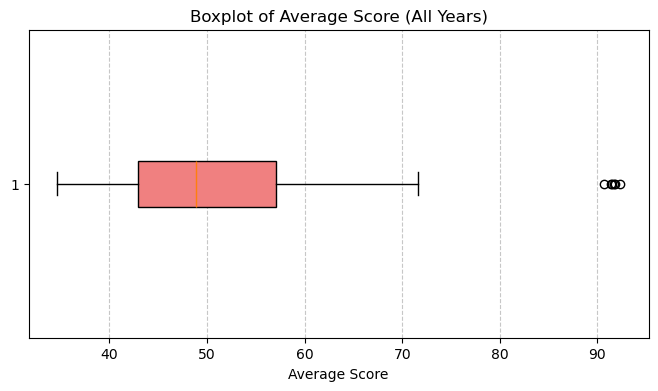

In [44]:
# Boxplot for avg_score
plt.figure(figsize=(8, 4))
plt.boxplot(agg_df["avg_score"], vert=False, patch_artist=True, 
            boxprops=dict(facecolor="lightcoral"))
plt.title("Boxplot of Average Score (All Years)")
plt.xlabel("Average Score")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.savefig("plots/avearge_scores_trends.png", dpi=300, bbox_inches='tight')
plt.show()

Our analysis of the boxplots for average score, number of universities, and total score indicate that there are no problematic outliers in the statistical sense; instead, the apparent “outlier” points correspond to countries that consistently outperform others.
In the average score plot, a few countries (e.g., with scores above 90) stand out for exceptional per-institution quality.
In the number of universities plot, the higher values simply reflect nations with large higher-education systems.
In the total score plot, the highest values belong to countries combining both many ranked universities and strong performance, positioning them as leaders rather than anomalies.

### Visualizations 

We use:
- **Bar plots** of Top 10 countries under each perspective.
- **Time‑series plots** of score trends for leading countries.

In [47]:
# ---------- Build aggregated dataset ----------
def build_agg_from_raw(df_clean: pd.DataFrame) -> pd.DataFrame:
    """
    Expects columns: ['university','year','score','country'].
    Returns agg_df with: ['year','country','total_score','num_universities','avg_score'].
    """
    required_cols = {"university", "year", "score", "country"}
    missing = required_cols - set(df_clean.columns)
    if missing:
        raise KeyError(f"Missing columns: {sorted(missing)}")

    # Drop rows with NaNs in essential columns
    df = df_clean.dropna(subset=["country", "year", "score", "university"]).copy()
    df["year"] = df["year"].astype(int)

    # One groupby-agg for both metrics
    agg_df = (
        df.groupby(["year", "country"], as_index=False)
          .agg(
              total_score=("score", "sum"),
              num_universities=("university", "nunique")
          )
    )

    # Average score per university
    agg_df["avg_score"] = agg_df["total_score"] / agg_df["num_universities"]

    return agg_df

agg_df.to_csv("tables/agg_university_metrics.csv", index=False)

# ---------- 2) Helper to get top-K per year ----------
def top_k_per_year(df_clean: pd.DataFrame, value_col: str, k: int = 10) -> pd.DataFrame:
    need = {"year", "country", value_col}
    if not need.issubset(df.columns):
        raise KeyError(f"DataFrame must contain: {sorted(need)}")
    return (
        df.sort_values(["year", value_col], ascending=[True, False], kind="mergesort")
          .groupby("year", group_keys=False)
          .head(k)
          .reset_index(drop=True)
    )

# ---------- 3) Plotters (one per metric) ----------
def plot_top10_total_score_per_year(agg_df: pd.DataFrame, k: int = 10):
    for y in sorted(agg_df["year"].unique()):
        d = (agg_df[agg_df["year"] == y]
             .sort_values("total_score", ascending=False)
             .head(k).iloc[::-1])
        plt.figure(figsize=(10, 6))
        plt.barh(d["country"], d["total_score"])
        for i, v in enumerate(d["total_score"]):
            plt.text(v, i, f"{v:.1f}", va="center", ha="left")
        plt.title(f"Top {k} Countries by Total Score ({y})")
        plt.xlabel("Total Score")
        plt.tight_layout()
        plt.show()


def plot_top10_avg_score_per_year(agg_df: pd.DataFrame, k: int = 10):
    for y in sorted(agg_df["year"].unique()):
        d = (agg_df[agg_df["year"] == y]
             .sort_values("avg_score", ascending=False)
             .head(k).iloc[::-1])
        plt.figure(figsize=(10, 6))
        plt.barh(d["country"], d["avg_score"])
        # label with both avg and number of universities
        for i, (v, n) in enumerate(zip(d["avg_score"], d["num_universities"])):
            plt.text(v, i, f"{v:.1f}  |  {n} univ", va="center", ha="left")
        plt.title(f"Top {k} Countries by Average Score ({y})")
        plt.xlabel("Average Score per University")
        plt.tight_layout()
        plt.show()


def plot_top10_num_universities_per_year(agg_df: pd.DataFrame, k: int = 10):
    for y in sorted(agg_df["year"].unique()):
        d = (agg_df[agg_df["year"] == y]
             .sort_values("num_universities", ascending=False)
             .head(k).iloc[::-1])
        plt.figure(figsize=(10, 6))
        plt.barh(d["country"], d["num_universities"])
        for i, v in enumerate(d["num_universities"]):
            plt.text(v, i, f"{v}", va="center", ha="left")
        plt.title(f"Top {k} Countries by Number of Universities ({y})")
        plt.xlabel("Number of Universities")
        plt.tight_layout()
        plt.show()


# ---------- 4) Example usage ----------
# raw df name assumed to be `df` with cols: university, year, score, country
# agg_df = build_agg_from_raw(df)

# Tables (if you need them):
# top10_total = top_k_per_year(agg_df[["year","country","total_score"]], "total_score", k=10)
# top10_avg   = top_k_per_year(agg_df[["year","country","avg_score","num_universities"]], 
        #"avg_score", k=10)
# top10_count = top_k_per_year(agg_df[["year","country","num_universities"]], 
        #"num_universities", k=10)

# Plots:
# plot_top10_total_score_per_year(agg_df, k=10)
# plot_top10_avg_score_per_year(agg_df, k=10)
# plot_top10_num_universities_per_year(agg_df, k=10)

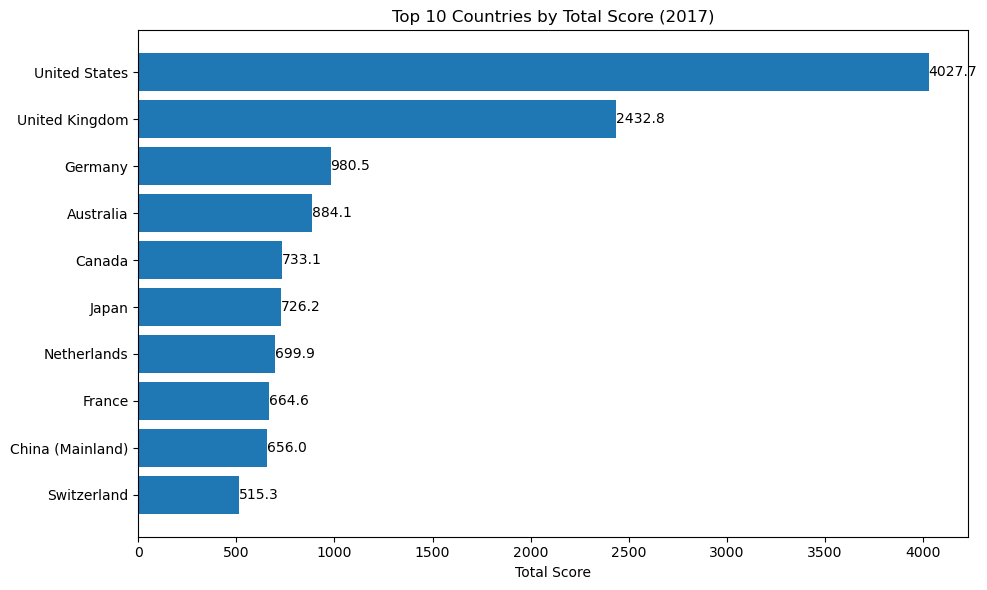

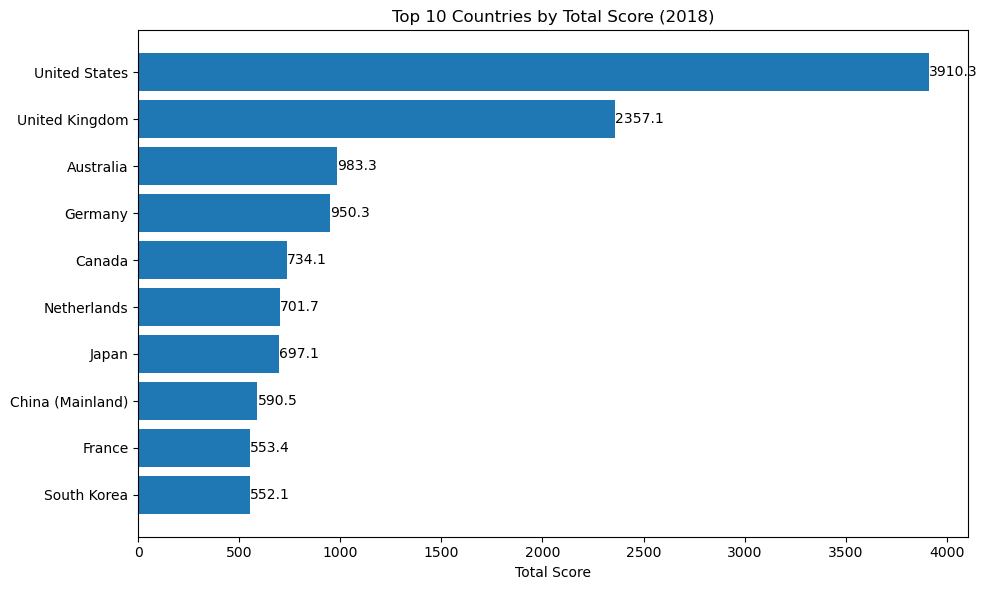

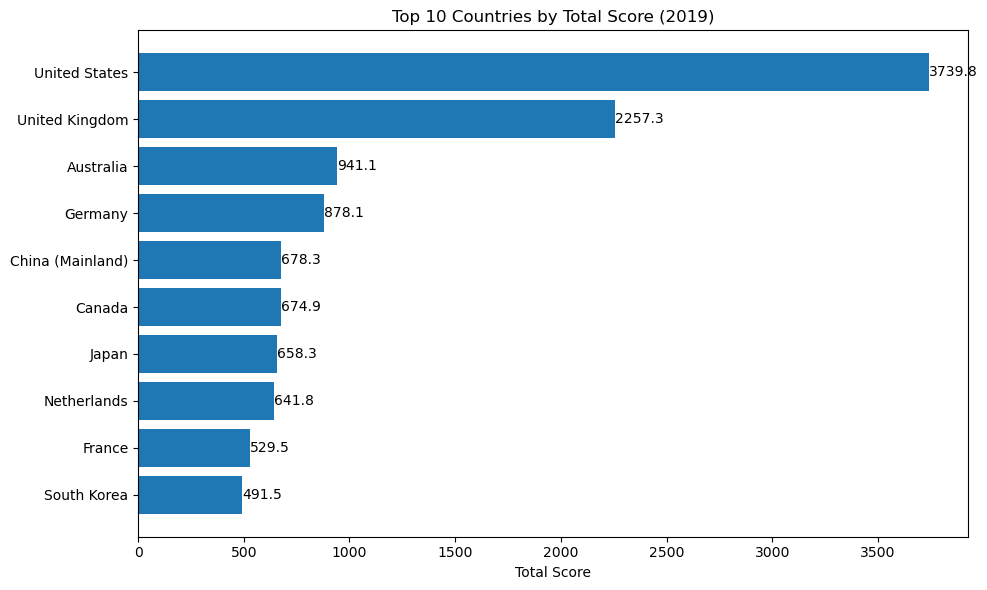

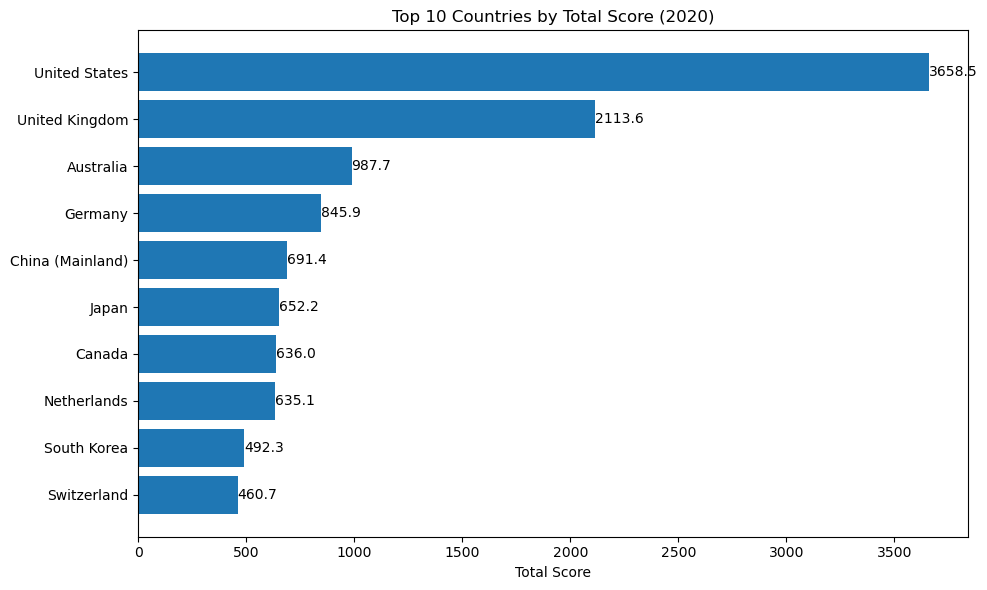

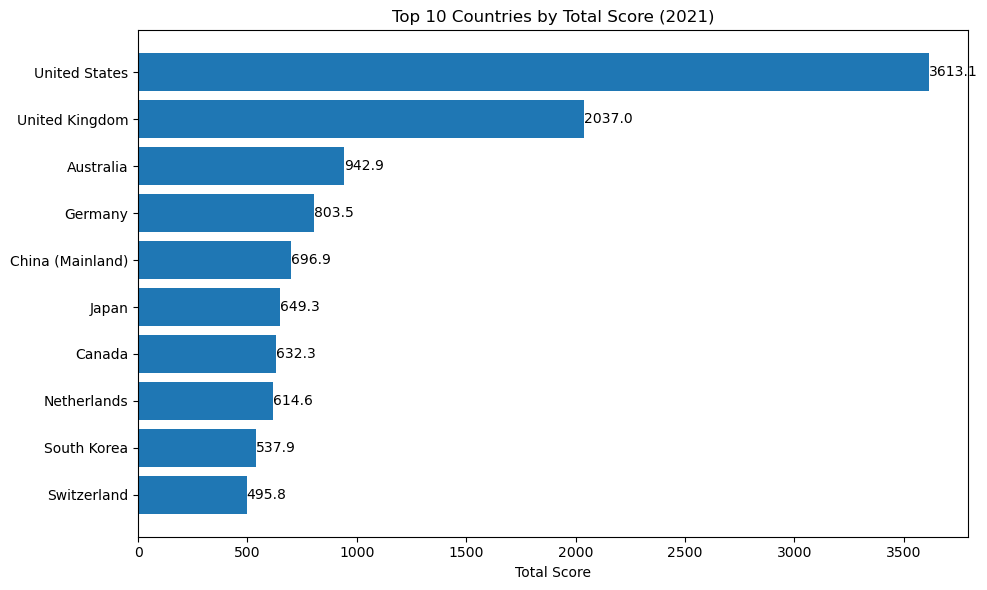

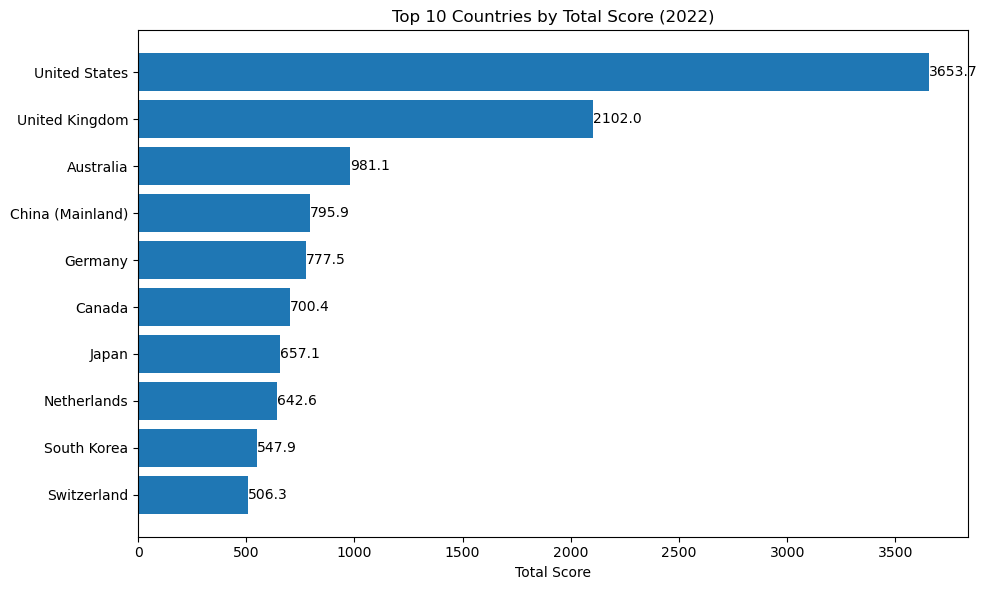

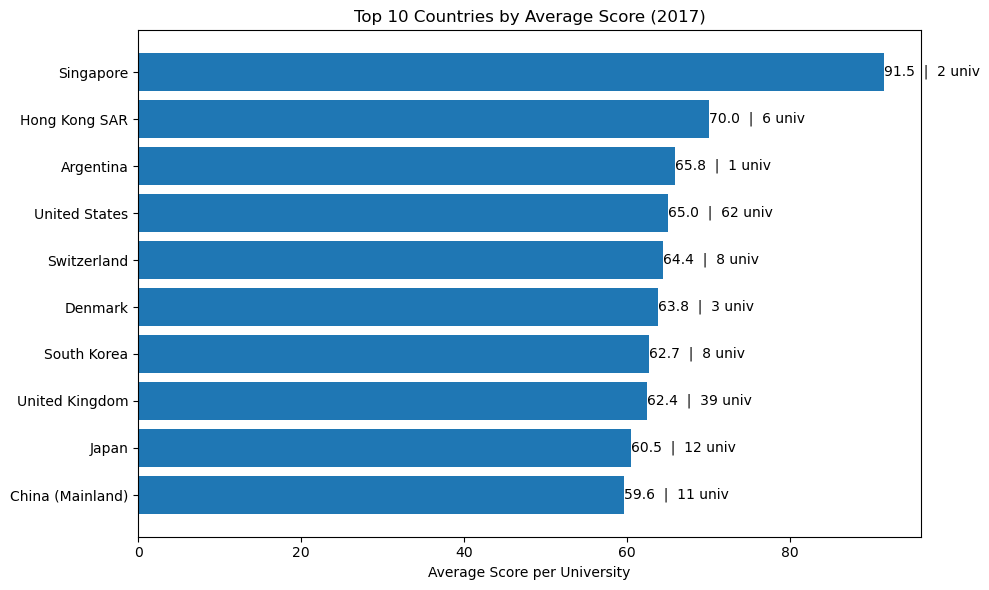

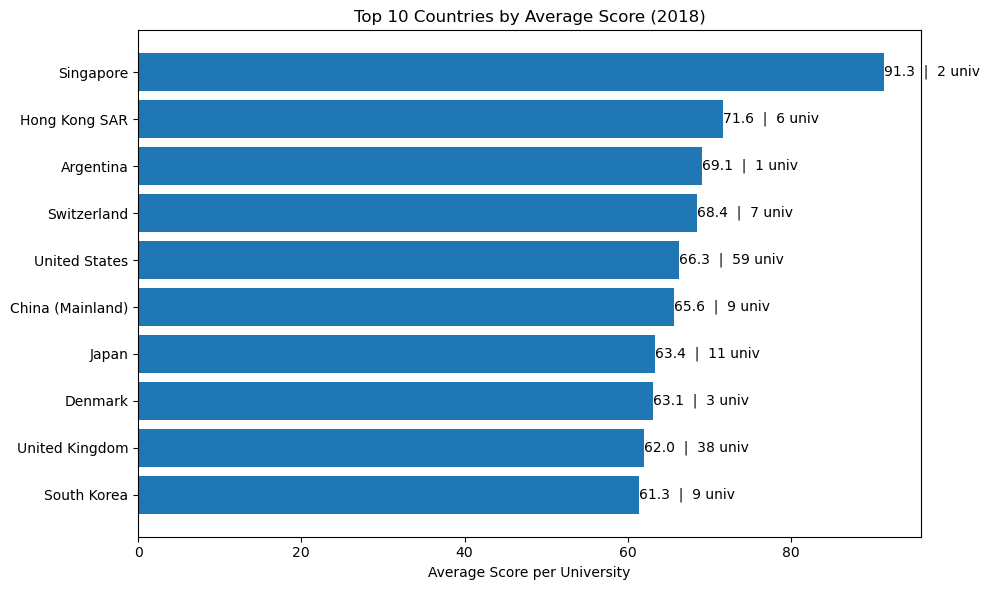

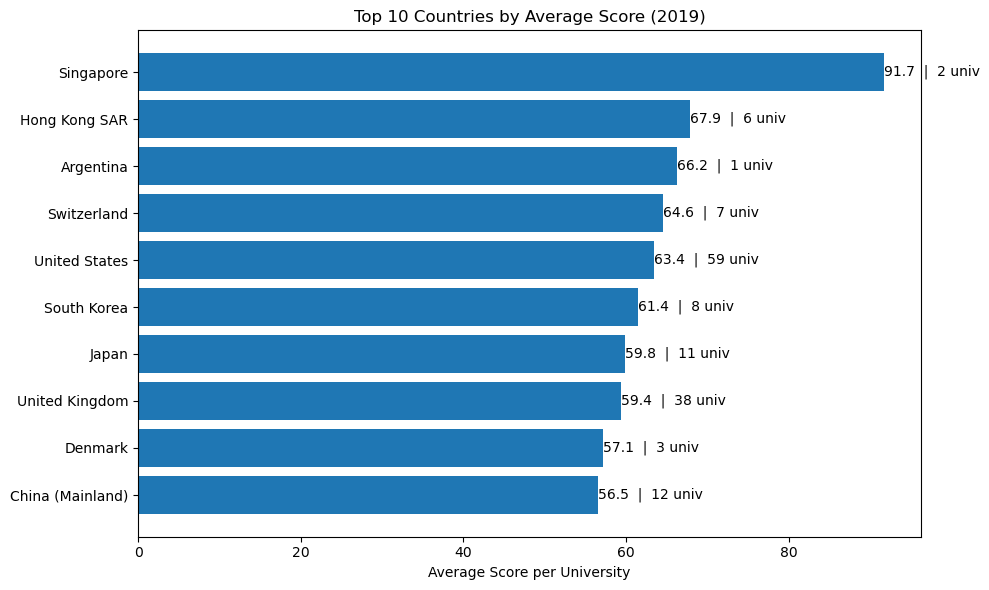

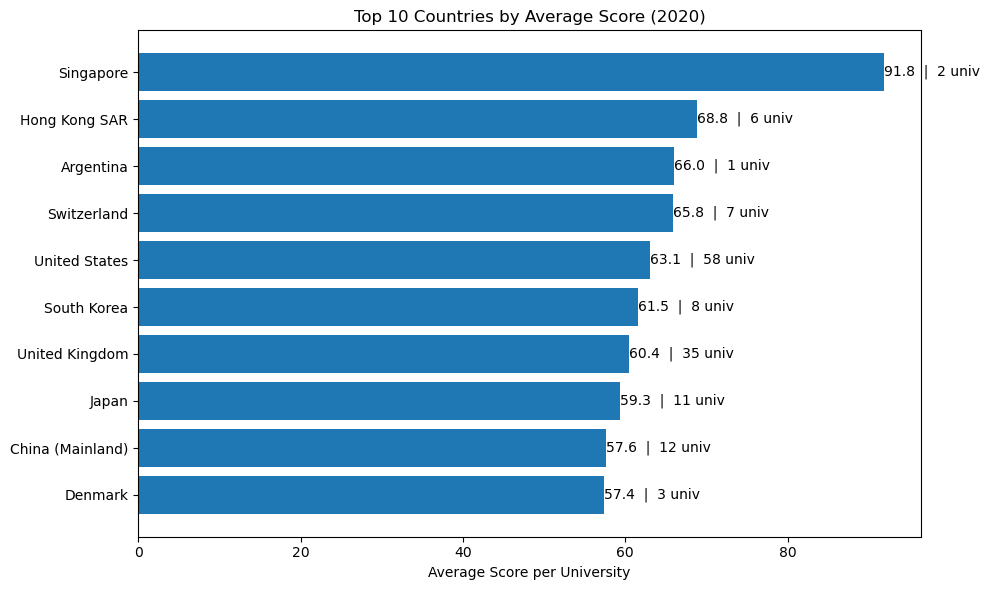

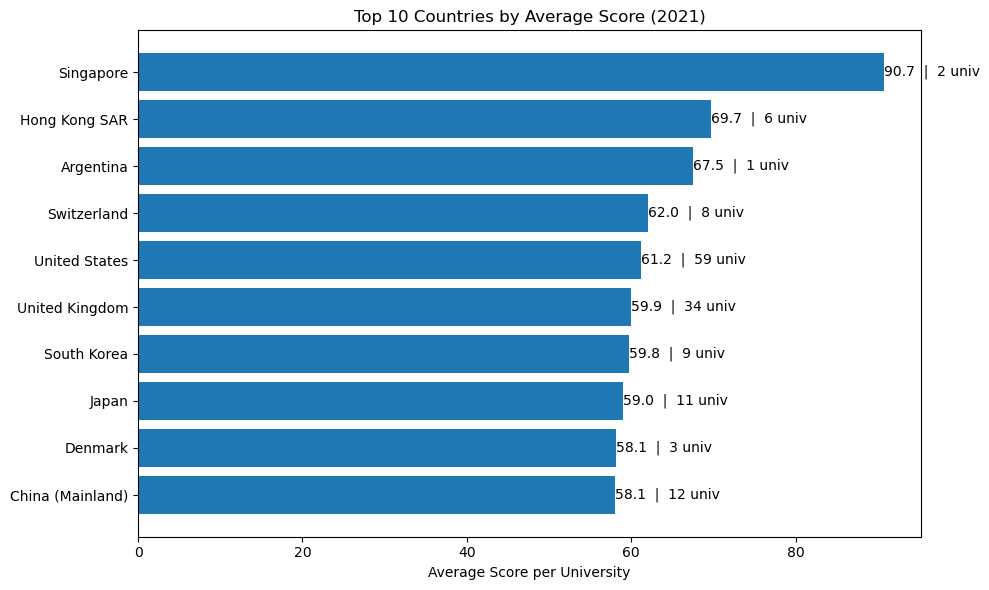

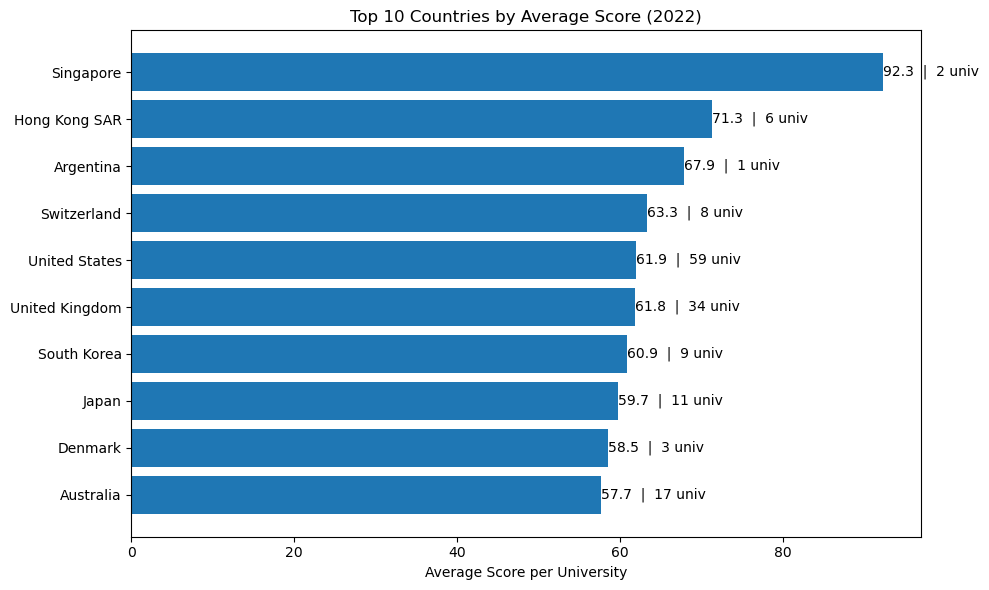

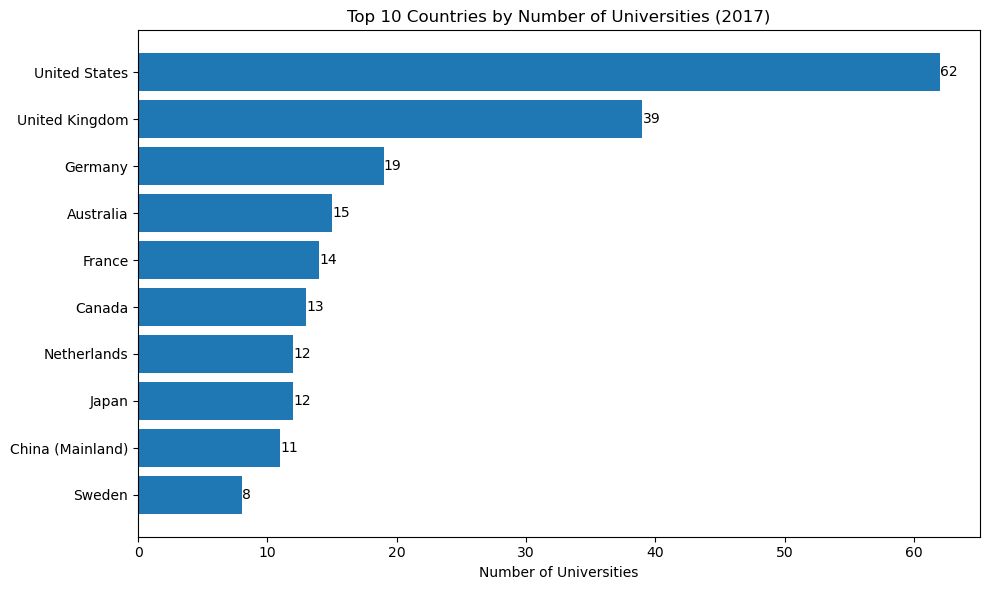

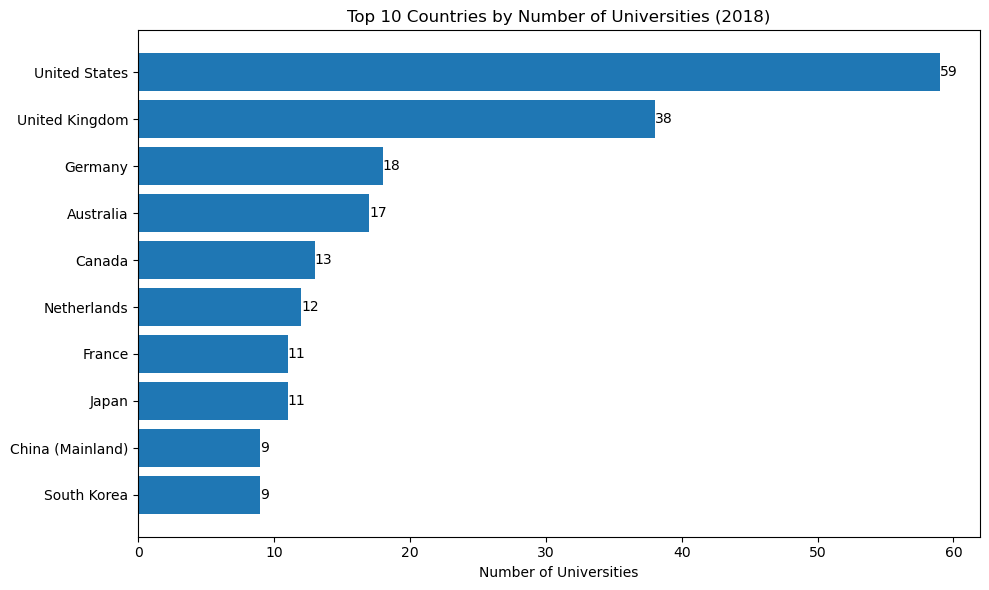

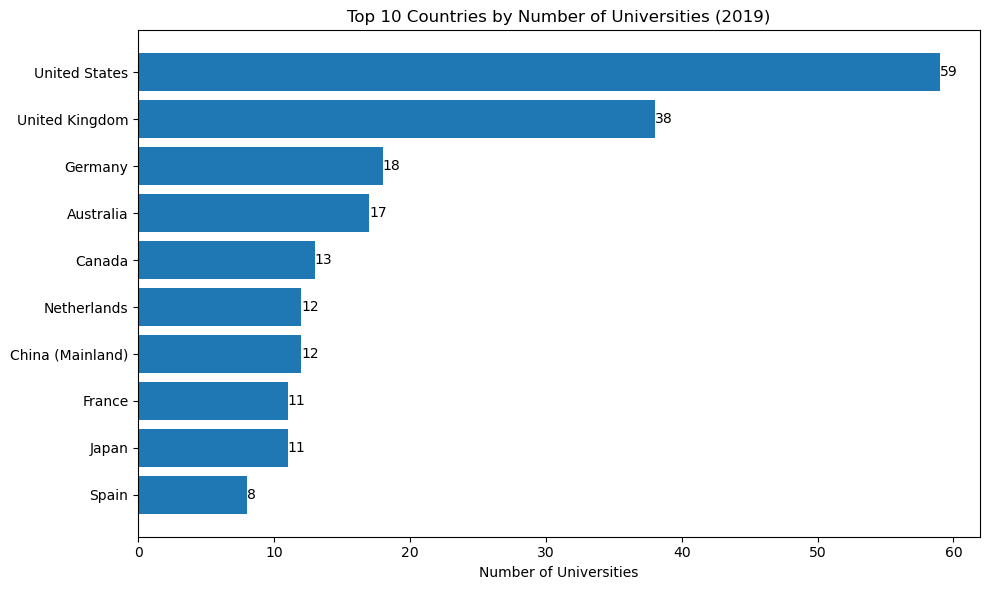

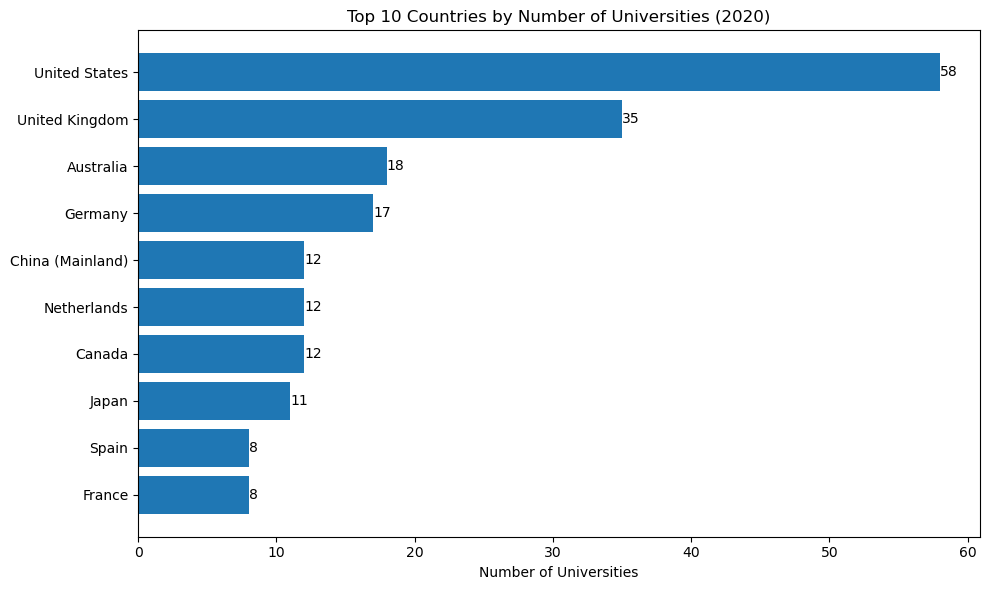

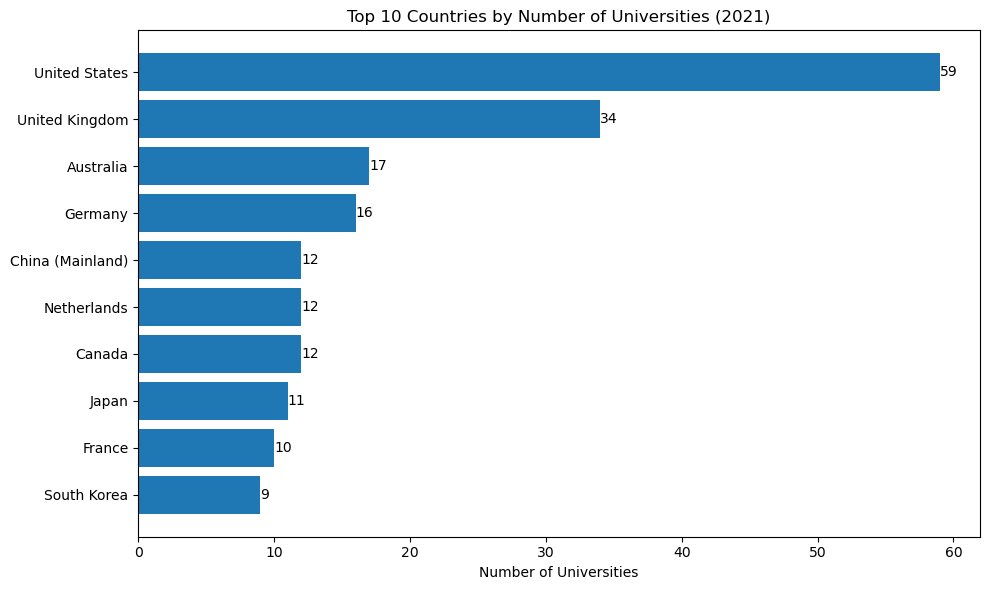

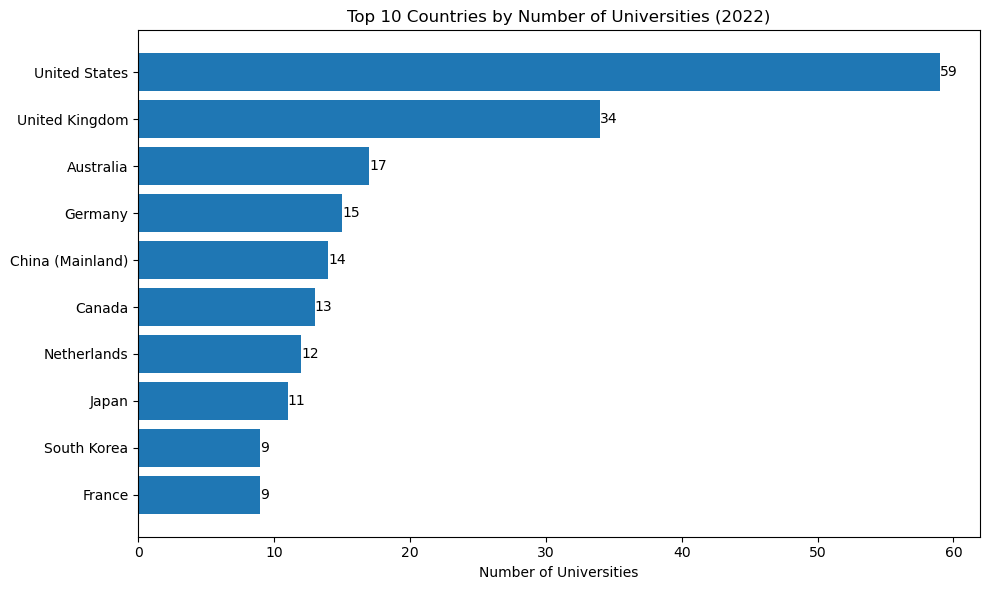

In [48]:
plot_top10_total_score_per_year(agg_df, k=10)
plot_top10_avg_score_per_year(agg_df, k=10)
plot_top10_num_universities_per_year(agg_df, k=10)

In [49]:
# Time Series trends for the top 10 countires  

def plot_score_trends(agg_df: pd.DataFrame, metric: str = "total_score", top_n: int = 5):
    """
    Plots time-series trends for the top N countries based on the last available year.
    
    Parameters
    ----------
    agg_df : pd.DataFrame
        Must contain ['year','country', metric].
    metric : str
        One of ['total_score', 'avg_score', 'num_universities'].
    top_n : int
        Number of countries to plot (selected from the last year).
    """
    if metric not in agg_df.columns:
        raise KeyError(f"Metric '{metric}' not found in DataFrame.")

    # --- Determine top N countries based on last year ---
    last_year = agg_df["year"].max()
    top_countries = (
        agg_df[agg_df["year"] == last_year]
        .nlargest(top_n, metric)["country"]
        .tolist()
    )

    # --- Filter for those countries only ---
    plot_df = agg_df[agg_df["country"].isin(top_countries)].copy()

    # --- Plot ---
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=plot_df, x="year", y=metric, hue="country", marker="o")

    plt.title(f"{metric.replace('_', ' ').title()} Trends for Top {top_n} Countries")
    plt.xlabel("Year")
    plt.ylabel(metric.replace("_", " ").title())
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

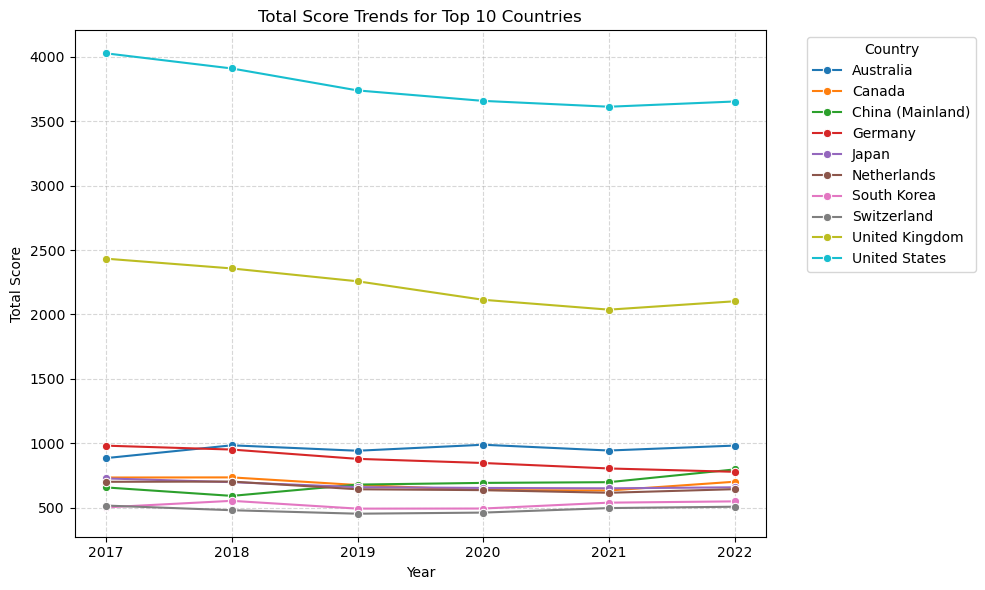

In [50]:
plot_score_trends(agg_df, metric="total_score", top_n=10)

## Economic Indicators - Exploratory Data Analysis

### Data Overview
The economic and governance indicators used in this study gross domestic product (GDP) per capita, government expenditure on education (as a percentage of GDP), research and development (R&D) expenditure (as a percentage of GDP), and government effectiveness are sourced from the World Bank’s World Development Indicators database. These datasets cover the period 2017–2022 and are reported at the country-year level, enabling direct comparison with the QS World University Rankings data.

The overview process includes:

- Displaying metadata such as the total number of countries represented and the time span of the data for each indicator.

- Presenting sample rows to inspect the data structure, units of measurement, and formatting consistency.

- Examining column data types to ensure compatibility with merging operations and statistical analyses.

- Assessing the completeness of each dataset by identifying missing values across countries and years.

- Reviewing indicator units (e.g., constant USD, percentage of GDP, index scores) to confirm comparability and readiness for analysis.

Descriptive statistics (mean, median, standard deviation) are computed for each indicator to gain an initial understanding of their distribution and variation across countries and over time.

In [53]:
# Load datasets
gdp_df = pd.read_csv("data/gdp.csv")
edu_df = pd.read_csv("data/gov_exp_on_edu.csv")
gov_df = pd.read_csv("data/gov_effect_score .csv")
res_df = pd.read_csv("data/res_dev.csv")

In [54]:
gdp_df

,Series Name,Series Code,Country Name,Country Code,1990 [YR1990],2000 [YR2000],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024]
0,GDP per capita (current US$),NY.GDP.PCAP.CD,Afghanistan,AFG,..,174.930991430166,565.569730408751,522.082215583898,525.469770891619,491.337221382603,496.6025042585,510.787063366811,356.496214115892,357.261152798144,413.757894705303,..
1,GDP per capita (current US$),NY.GDP.PCAP.CD,Albania,ALB,617.230435515505,1160.42047054038,3981.72662261867,4168.37544462548,4614.0479692596,5365.48880180298,5460.4305086932,5370.77749956875,6413.28280828537,6846.42669381643,8575.17134637222,10011.6279856667
2,GDP per capita (current US$),NY.GDP.PCAP.CD,Algeria,DZA,2445.18332740258,1772.92869122761,4685.05902729002,4424.98529027556,4554.66753957828,4577.21029180491,4468.45341883656,3743.5419522929,4160.55926736925,4961.55257664733,5364.02795022731,5631.17999109851
3,GDP per capita (current US$),NY.GDP.PCAP.CD,American Samoa,ASM,..,..,12727.4102651386,12843.3342903627,11863.6839452565,12552.0546868861,12886.1359517218,14489.2586563775,15236.1604875571,18017.4589383973,..,..
4,GDP per capita (current US$),NY.GDP.PCAP.CD,Andorra,AND,19563.6574722488,21810.2487431414,38654.9347203095,40129.8192007698,40672.9943348258,42819.7745797624,41257.8045846483,37361.0900666982,42425.6996756291,42414.0590092117,46812.4484486309,49303.6733899464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
edu_df

,Series Name,Series Code,Country Name,Country Code,1990 [YR1990],2000 [YR2000],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024]
0,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,Afghanistan,AFG,..,..,3.2558000087738,4.54397010803223,4.34319019317627,..,..,..,..,..,..,..
1,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,Albania,ALB,..,3.4301700592041,3.43796992301941,3.96209001541138,3.61172008514404,3.15294480323792,3.91623997688293,3.3422999382019,3.02255988121033,2.74432992935181,..,..
2,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,Algeria,DZA,..,..,6.17633008956909,6.50210857391357,5.73482370376587,5.81275129318237,5.57536554336548,6.1939172744751,5.51403284072876,4.74924659729004,5.61015701293945,..
3,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,American Samoa,ASM,..,..,..,..,..,..,..,..,..,..,..,..
4,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,Andorra,AND,..,..,3.28034996986389,3.23707008361816,3.21708989143372,3.2467200756073,3.15060997009277,2.63213038444519,2.58397221565247,2.64728999137878,1.92790997028351,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
# Get basic information
gdp_df.info()
edu_df.info()
gov_df.info()
res_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Series Name    268 non-null    object
 1   Series Code    266 non-null    object
 2   Country Name   266 non-null    object
 3   Country Code   266 non-null    object
 4   1990 [YR1990]  266 non-null    object
 5   2000 [YR2000]  266 non-null    object
 6   2015 [YR2015]  266 non-null    object
 7   2016 [YR2016]  266 non-null    object
 8   2017 [YR2017]  266 non-null    object
 9   2018 [YR2018]  266 non-null    object
 10  2019 [YR2019]  266 non-null    object
 11  2020 [YR2020]  266 non-null    object
 12  2021 [YR2021]  266 non-null    object
 13  2022 [YR2022]  266 non-null    object
 14  2023 [YR2023]  266 non-null    object
 15  2024 [YR2024]  266 non-null    object
dtypes: object(16)
memory usage: 34.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data co

### Data Cleaning
The cleaning process ensures the World Bank datasets are accurate, harmonized, and ready for integration with the QS ranking data. Key steps include:

- Dropping fully empty rows, Keeping only rows from the start until the last country (e.g., Zimbabwe),  Resetting the index

- Filtering: Restricting each dataset to the years 2017–2022 to match the QS rankings timeframe.

- Country name standardization: Harmonizing country names across all indicators to match the standardized naming in the QS dataset, ensuring smooth merging.

- Missing values: Identifying gaps in the time series for individual countries. For indicators with sporadic missing years, interpolation or forward/backward filling is considered if the gap is minimal; otherwise, countries with substantial missing data are excluded from certain analyses.

- Data type and unit consistency: Ensuring all numerical values are stored in the correct format (e.g., floats) and confirming uniform units of measurement across years and countries.

- Outlier review: Generating boxplots for each indicator to detect extreme values. Potential anomalies are cross-checked with the original World Bank source to determine whether they reflect real-world events (e.g., economic shocks) or require correction.

Through this process, the four economic and governance datasets are transformed into a clean, consistent, and fully aligned format, enabling robust correlation, regression, and comparative analyses alongside the QS university ranking data.

In [58]:
def clean_worldbank_df(df, country_col="Country Name", last_country="Zimbabwe"):
    """
    Cleans a World Bank dataset by:
    - Dropping fully empty rows
    - Keeping only rows from the start until the last country (e.g., Zimbabwe)
    - Resetting the index
    
    Parameters
    ----------
    df : pd.DataFrame
        The dataset to clean
    country_col : str
        Name of the column containing country names
    last_country : str
        The last valid country in the dataset (default: 'Zimbabwe')
    
    Returns
    -------
    pd.DataFrame
        Cleaned dataset
    """
    # Remove completely empty rows
    df = df.dropna(how="all")
    
    # Keep only up to last_country
    last_country_idx = df[df[country_col] == last_country].index
    if not last_country_idx.empty:
        df = df.loc[:last_country_idx[0]]
    
    # Reset index
    df = df.reset_index(drop=True)
    
    return df

# Apply to all datasets
gdp_df = clean_worldbank_df(gdp_df)
edu_df = clean_worldbank_df(edu_df)
gov_df = clean_worldbank_df(gov_df)
res_df = clean_worldbank_df(res_df)

# Quick check
print(gdp_df.tail(3))

                      Series Name     Series Code Country Name Country Code  \
214  GDP per capita (current US$)  NY.GDP.PCAP.CD  Yemen, Rep.          YEM   
215  GDP per capita (current US$)  NY.GDP.PCAP.CD       Zambia          ZMB   
216  GDP per capita (current US$)  NY.GDP.PCAP.CD     Zimbabwe          ZWE   

        1990 [YR1990]     2000 [YR2000]     2015 [YR2015]     2016 [YR2016]  \
214  910.422465960748  493.235182634814  1362.17381205593  975.359417003225   
215  422.336298804219  359.429500988221  1295.87788680068  1239.08527877713   
216   866.48652703408  562.556945680495  1386.41855927575  1407.42096413212   

        2017 [YR2017]     2018 [YR2018]     2019 [YR2019]     2020 [YR2020]  \
214  811.165970405745  633.887202450998  623.376168144679  559.564675805502   
215  1483.46577328065  1463.89997855593  1258.98619844462  951.644316655957   
216  3448.08699068824  2271.85250365817  1683.91313584141  1730.45391034701   

        2021 [YR2021]     2022 [YR2022]     2023 

#### Handling Missing Values

- First we will check and summarize the missing values perd dataset per country
- Interpolation 

In [60]:
def check_missing_values(df: pd.DataFrame, dataset_name: str = "Dataset",
                         year_min: int = 2017, year_max: int = 2022):
    """
    Cleans '..' placeholders to NaN, checks missing values ONLY for years in [year_min, year_max],
    and returns cleaned DataFrame + summary.
    """
    df_clean = (
        df.copy()
          .replace(r"^\s*\.\.\s*$", np.nan, regex=True)
          .infer_objects(copy=False)
    )

    # Detect year columns
    def _extract_year(col):
        m = re.match(r"^\s*((19|20)\d{2})", str(col))
        return int(m.group(1)) if m else None

    year_cols = [c for c in df_clean.columns
                 if (y := _extract_year(c)) is not None and year_min <= y <= year_max]

    if not year_cols:
        print(f"[{dataset_name}] No year columns found in {year_min}–{year_max} range.")
        return df_clean, pd.DataFrame()

    # Missing summary only for relevant years
    missing_summary = df_clean[year_cols].isna().sum().to_frame(name="missing_count")
    missing_summary["missing_pct"] = (missing_summary["missing_count"] / len(df_clean)) * 100

    print(f"=== Missing Values Summary ({year_min}–{year_max}): {dataset_name} ===")
    print(missing_summary)

    return df_clean, missing_summary

In [61]:
df_clean_gdp, missing_summary_gdp = check_missing_values(gdp_df)

=== Missing Values Summary (2017–2022): Dataset ===
               missing_count  missing_pct
2017 [YR2017]              7     3.225806
2018 [YR2018]              7     3.225806
2019 [YR2019]              6     2.764977
2020 [YR2020]              7     3.225806
2021 [YR2021]              7     3.225806
2022 [YR2022]              8     3.686636


In [62]:
df_clean_edu, missing_summary_edu = check_missing_values(edu_df)

=== Missing Values Summary (2017–2022): Dataset ===
               missing_count  missing_pct
2017 [YR2017]             46    21.198157
2018 [YR2018]             51    23.502304
2019 [YR2019]             50    23.041475
2020 [YR2020]             52    23.963134
2021 [YR2021]             52    23.963134
2022 [YR2022]             80    36.866359


In [63]:
df_clean_gov, missing_summary_gov = check_missing_values(gov_df)

=== Missing Values Summary (2017–2022): Dataset ===
               missing_count  missing_pct
2017 [YR2017]             12     5.529954
2018 [YR2018]             12     5.529954
2019 [YR2019]             12     5.529954
2020 [YR2020]             12     5.529954
2021 [YR2021]             12     5.529954
2022 [YR2022]             12     5.529954


In [64]:
df_clean_res, missing_summary_res = check_missing_values(res_df)

=== Missing Values Summary (2017–2022): Dataset ===
               missing_count  missing_pct
2017 [YR2017]            122    56.221198
2018 [YR2018]            124    57.142857
2019 [YR2019]            122    56.221198
2020 [YR2020]            131    60.368664
2021 [YR2021]            133    61.290323
2022 [YR2022]            141    64.976959


#### Data Cleaning Function: `clean_interp_ffill_bfill_2017_2022`

To prepare World Bank–style datasets for analysis, a custom cleaning function was developed. Its main tasks are:

1. **Identify year columns (2017–2022)**  
   Detects columns containing 4-digit years within the target range.

2. **Clean placeholders and coerce to numeric**  
   Replaces World Bank missing value markers (`".."`) with `NaN` and ensures all year columns are numeric.

3. **Report missing values (before cleaning)**  
   Counts the number of missing values per year, total missing values across all years, and rows that are completely missing.

4. **Fill missing values**  
   - **Linear interpolation** is applied across years within each country row.  
   - **Forward- and backward-fill** ensure the first and last year values are also filled if possible.

5. **Report missing values (after cleaning)**  
   Provides a per-year summary of missing values before and after cleaning, plus an overall reduction count.

6. **Return outputs**  
   - The cleaned dataset with filled year values.  
   - A per-year report of missing values.  
   - An overall summary of missing value reduction.

This process ensures a consistent, gap-free time series for 2017–2022 across all countries and indicators, ready for reshaping and further analysis.

In [66]:

def _yr_cols(df: pd.DataFrame, year_min: int = 2017, year_max: int = 2022) -> list[str]:
    yrs = []
    for c in df.columns:
        m = re.search(r'(19|20)\d{2}', str(c))
        if m:
            y = int(m.group(0))
            if year_min <= y <= year_max:
                yrs.append((c, y))
    yrs.sort(key=lambda t: t[1])
    return [c for c, _ in yrs]

def clean_interp_ffill_bfill_2017_2022(
    df: pd.DataFrame,
    year_min: int = 2017,
    year_max: int = 2022,
    clean_dots: bool = True
):
    year_cols = _yr_cols(df, year_min, year_max)
    if not year_cols:
        raise ValueError(f"No {year_min}–{year_max} year-like columns found.")

    out = df.copy()

    if clean_dots:
        out[year_cols] = out[year_cols].replace(r'^\s*\.\.\s*$', np.nan, regex=True)
    out[year_cols] = out[year_cols].apply(pd.to_numeric, errors="coerce")

    before = out[year_cols].isna().sum()
    total_before = int(before.sum())
    rows_all_na_before = int(out[year_cols].isna().all(axis=1).sum())

    out[year_cols] = out[year_cols].interpolate(axis=1, method="linear", limit_direction="both")
    out[year_cols] = out[year_cols].ffill(axis=1).bfill(axis=1)

    after = out[year_cols].isna().sum()
    total_after = int(after.sum())
    rows_all_na_after = int(out[year_cols].isna().all(axis=1).sum())

    per_year_report = pd.DataFrame({
        "missing_before": before,
        "missing_after": after,
        "reduced": before - after
    })
    overall = {
        "total_nans_before": total_before,
        "total_nans_after": total_after,
        "total_reduction": total_before - total_after,
        "rows_all_nan_before": rows_all_na_before,
        "rows_all_nan_after": rows_all_na_after,
    }
    return out, per_year_report, overall

In [67]:
def sanity_check_wb_data(
    df: pd.DataFrame,
    year_min: int = 2017,
    year_max: int = 2022,
    expected_range: tuple[float, float] | None = None
):
    """
    Run basic sanity checks on a cleaned World Bank-style dataset.
    
    Checks performed:
    1. Year columns exist, are sorted, and no duplicates.
    2. Missing values did not increase after cleaning.
    3. Rows with all-NaN remain unchanged.
    4. Optional: values lie within expected bounds.
    5. Warn if high proportion of missing values remain.
    """

    year_cols = _yr_cols(df, year_min, year_max)
    if not year_cols:
        raise ValueError(f"No {year_min}–{year_max} year-like columns found.")

    # --- 1. Structure ---
    years = [int(re.search(r'(19|20)\d{2}', c).group(0)) for c in year_cols]
    if sorted(years) != years:
        print("[WARN] Year columns are not sorted.")
    if len(set(year_cols)) != len(year_cols):
        print("[WARN] Duplicate year columns detected.")

    # --- 2. Missingness before vs after (requires original NaN info) ---
    # Here we just compute current missingness:
    missing_now = df[year_cols].isna().sum().sum()
    rows_all_na = int(df[year_cols].isna().all(axis=1).sum())
    print(f"[INFO] Total missing values now: {missing_now}")
    print(f"[INFO] Rows with all NaNs: {rows_all_na}")

    # --- 3. Value range ---
    if expected_range is not None:
        lo, hi = expected_range
        vmin, vmax = df[year_cols].min().min(), df[year_cols].max().max()
        if vmin < lo or vmax > hi:
            print(f"[WARN] Values outside expected range {expected_range}: "
                  f"min={vmin}, max={vmax}")

    # --- 4. Proportion of missing ---
    total_cells = len(df) * len(year_cols)
    missing_pct = (missing_now / total_cells) * 100
    if missing_pct > 20:
        print(f"[WARN] {missing_pct:.1f}% of values still missing after cleaning.")

    print("[OK] Sanity check completed.")

In [68]:
# After cleaning step
df_clean, per_year, overall = clean_interp_ffill_bfill_2017_2022(gov_df)

# Run sanity checks
sanity_check_wb_data(df_clean, expected_range=(0, 100))

[INFO] Total missing values now: 72
[INFO] Rows with all NaNs: 12
[OK] Sanity check completed.


In [69]:
datasets = {
    "gdp": gdp_df,        # World Bank GDP (wide)
    "gov_eff": gov_df,    # Government Effectiveness (wide)
    "edu_spend": edu_df,  # Gov. Expenditure on Education (wide)
    "rd": res_df,         # R&D Expenditure (wide)
}

cleaned = {}
per_year_reports = {}
overall_rows = []

for name, raw in datasets.items():
    df_clean, per_year_report, overall = clean_interp_ffill_bfill_2017_2022(raw)
    cleaned[name] = df_clean
    per_year_reports[name] = per_year_report
    overall_rows.append({"dataset": name, **overall})

overall_summary_df = pd.DataFrame(overall_rows)

print("=== Overall missing summary (before/after) ===")
print(overall_summary_df)

=== Overall missing summary (before/after) ===
     dataset  total_nans_before  total_nans_after  total_reduction  \
0        gdp                 42                36                6   
1    gov_eff                 72                72                0   
2  edu_spend                331               210              121   
3         rd                773               630              143   

   rows_all_nan_before  rows_all_nan_after  
0                    6                   6  
1                   12                  12  
2                   35                  35  
3                  105                 105  


#### Summary for Missing Values and Interpolation

Across the four World Bank datasets, the extent of missing data varies substantially.

GDP dataset: Missing values were relatively limited (42 total NaNs across 2017–2022), with interpolation reducing this to 36. The number of countries with all years missing remained unchanged (6), suggesting a few cases cannot be recovered.

Government effectiveness: Initially contained 331 missing values, reduced to 210 after interpolation (a 36% reduction). However, 35 countries lack all six years, indicating persistent gaps.

Government spending on education: This dataset showed no improvement after interpolation. All 72 missing entries remained, with 12 countries having no data at all for the period. This suggests systemic reporting issues rather than sporadic gaps.

R&D expenditure: Had the largest proportion of missingness (773 NaNs), reduced to 630 after interpolation (a 19% improvement). Still, 105 countries provide no values across the six years, limiting coverage.

#### List of countries to be excluded per Dataset

In [72]:
# Countries to exclude per dataset 

os.makedirs("excluded", exist_ok=True)

excluded_results = {}

for name, df_clean in cleaned.items():
    year_cols = list(per_year_reports[name].index)  # same year columns used in reporting

    excluded_countries = (
        df_clean.loc[df_clean[year_cols].isna().all(axis=1), "Country Name"]
        .dropna()
        .unique()
    )
    excluded_results[name] = excluded_countries

    print(f"\n=== Countries to exclude: {name.upper()} ===")
    for c in excluded_countries:
        print(" -", c)
    print(f"Total excluded: {len(excluded_countries)}")

    # Save one file per dataset (optional, comment out if not needed)
    pd.DataFrame({"Country Name": excluded_countries}).to_csv(
        f"excluded/excluded_{name}.csv", index=False
    )

# (Optional) combined long table for appendix
combined_excluded = pd.concat(
    [pd.DataFrame({"dataset": name, "country_name": countries})
     for name, countries in excluded_results.items()],
    ignore_index=True
)
combined_excluded.to_csv("excluded/excluded_all_datasets.csv", index=False)
print("\nSaved combined excluded list to excluded/excluded_all_datasets.csv")


=== Countries to exclude: GDP ===
 - British Virgin Islands
 - Eritrea
 - Gibraltar
 - Korea, Dem. People's Rep.
 - South Sudan
 - Venezuela, RB
Total excluded: 6

=== Countries to exclude: GOV_EFF ===
 - British Virgin Islands
 - Channel Islands
 - Curacao
 - Faroe Islands
 - French Polynesia
 - Gibraltar
 - Isle of Man
 - New Caledonia
 - Northern Mariana Islands
 - Sint Maarten (Dutch part)
 - St. Martin (French part)
 - Turks and Caicos Islands
Total excluded: 12

=== Countries to exclude: EDU_SPEND ===
 - American Samoa
 - Brunei Darussalam
 - Channel Islands
 - Colombia
 - Curacao
 - Egypt, Arab Rep.
 - Equatorial Guinea
 - Eritrea
 - Faroe Islands
 - French Polynesia
 - Gibraltar
 - Greenland
 - Guam
 - Guinea-Bissau
 - Iraq
 - Isle of Man
 - Korea, Dem. People's Rep.
 - Kosovo
 - Libya
 - Liechtenstein
 - Montenegro
 - New Caledonia
 - North Macedonia
 - Northern Mariana Islands
 - Puerto Rico (US)
 - Saudi Arabia
 - Somalia
 - South Sudan
 - St. Martin (French part)
 - Sudan


#### Reshaping Function: `wb_to_long_simple_nointerp`

This function converts World Bank–style datasets from **wide format** (years as columns) to **long format** (rows as country–year pairs) for the period 2017–2022. It assumes the dataset has already been cleaned (numeric, NaNs handled).

**Key steps:**
1. **Identify column names**  
   Detects the appropriate fields for country, indicator code, and indicator name (flexible across WB datasets).

2. **Optional indicator filtering**  
   Filters rows to keep only the target series, based on `series_code` or `series_name` (case-insensitive exact match).

3. **Drop metadata columns**  
   Removes non-essential fields such as country/series codes and any `Unnamed` columns.

4. **Select year columns**  
   Finds all year columns within the specified window (default 2017–2022).

5. **Wide → long reshaping**  
   Uses `pandas.melt` to transform the dataset into long format:
   - Columns: `country`, `year`, `<value_name>`  
   - Each row = one country–year observation.

6. **Year extraction and cleaning**  
   Ensures years are integers, restricted to the specified window.

7. **Finalize output**  
   - Renames the country column uniformly to `"country"`.  
   - Drops rows with missing values in the target indicator.  
   - Returns a clean, long-format dataframe ready for merging and analysis.

**Purpose:**  
This reshaping step standardizes the structure of all World Bank indicators, enabling consistent time-series comparison and integration across GDP, governance, education spending, and R&D data.

In [74]:
def drop_all_nan_rows(df_clean: pd.DataFrame, year_min=2017, year_max=2022):
    yc = _yr_cols(df_clean, year_min, year_max)
    return df_clean.loc[~df_clean[yc].isna().all(axis=1)].reset_index(drop=True)

cleaned_no_allnan = {k: drop_all_nan_rows(v) for k, v in cleaned.items()}

In [75]:
def wb_to_long_simple_nointerp(
    df: pd.DataFrame,
    *,
    value_name: str,                 # e.g. "gov_effectiveness_pctile"
    series_code: str | None = None,  # e.g. "GE.PER.RNK"
    series_name: str | None = None,  # e.g. "Government Effectiveness: Percentile Rank"
    year_min: int = 2017,
    year_max: int = 2022,
) -> pd.DataFrame:
    """
    Wide -> long for 2017–2022 with optional indicator filter.
    Assumes data already cleaned (NaNs handled, numeric).
    """
    # Likely column names
    name_col = ("Series Name" if "Series Name" in df.columns else
                "Indicator Name" if "Indicator Name" in df.columns else None)
    code_col = ("Series Code" if "Series Code" in df.columns else
                "Indicator Code" if "Indicator Code" in df.columns else None)
    country_col = ("Country Name" if "Country Name" in df.columns else
                   "country" if "country" in df.columns else None)
    if country_col is None:
        raise KeyError("Need a country column (expected 'Country Name' or 'country').")

    d = df.copy()

    # Optional exact-match filters (case-insensitive)
    if series_code and code_col:
        d = d[d[code_col].astype(str).str.strip().str.casefold() == series_code.strip().casefold()]
    if series_name and name_col:
        d = d[d[name_col].astype(str).str.strip().str.casefold() == series_name.strip().casefold()]

    # Drop meta + Unnamed
    d = d.drop(columns=[c for c in ["Country Code", "Series Code", "Series Name",
                                    "Indicator Code", "Indicator Name"] if c in d.columns],
               errors="ignore")
    d = d.loc[:, ~d.columns.str.match(r"^Unnamed")]

    # Year columns
    year_cols = _yr_cols(d, year_min, year_max)
    if not year_cols:
        raise ValueError(f"No year columns detected in {year_min}-{year_max}.")

    # Wide -> long
    long_df = d.melt(
        id_vars=[country_col],
        value_vars=year_cols,
        var_name="year_raw",
        value_name=value_name
    )
    # Extract 4-digit year
    long_df["year"] = pd.to_numeric(
        long_df["year_raw"].astype(str).str.extract(r"(\d{4})")[0],
        errors="coerce"
    ).astype("Int64")

    long_df = long_df.drop(columns=["year_raw"]).dropna(subset=["year"])
    long_df["year"] = long_df["year"].astype(int)
    long_df = long_df[long_df["year"].between(year_min, year_max)]

    # Standardize country column name
    if country_col != "country":
        long_df = long_df.rename(columns={country_col: "country"})

    # Since upstream cleaning already handled NaNs, we can keep rows as-is,
    # but if you prefer to drop any remaining NaNs in this value:
    long_df = long_df.dropna(subset=[value_name]).reset_index(drop=True)

    return long_df

In [76]:
def sanity_check_long(
    df: pd.DataFrame,
    value_col: str,
    year_min: int = 2017,
    year_max: int = 2022,
    expected_range: tuple[float, float] | None = None
) -> dict:
    """
    Sanity checks for long-format World Bank data.
    Expects columns: ['country','year', value_col]
    """

    summary = {"rows": len(df)}

    # 1) Year checks
    if not pd.api.types.is_integer_dtype(df["year"]):
        print("[WARN] Year column is not integer dtype.")
    if not df["year"].between(year_min, year_max).all():
        print("[WARN] Some years fall outside expected range.")
    summary["year_min"] = df["year"].min()
    summary["year_max"] = df["year"].max()

    # 2) Duplicates
    dup_count = df.duplicated(subset=["country", "year"]).sum()
    if dup_count > 0:
        print(f"[WARN] {dup_count} duplicate (country, year) rows detected.")
    summary["duplicates"] = int(dup_count)

    # 3) Coerce value column to numeric (tracks non-numeric)
    s_raw = df[value_col]
    s_num = pd.to_numeric(s_raw, errors="coerce")
    non_numeric = s_raw.notna() & s_num.isna()
    nn_count = int(non_numeric.sum())
    if nn_count > 0:
        print(f"[WARN] {nn_count} non-numeric entries in '{value_col}' were coerced to NaN.")

    n_missing = int(s_num.isna().sum())
    if n_missing > 0:
        print(f"[INFO] {n_missing} missing (or non-numeric) values in '{value_col}'.")
    summary["missing_values"] = n_missing

    # 4) Range check (only if we have any numeric values)
    if expected_range is not None and s_num.notna().any():
        lo, hi = expected_range
        vmin, vmax = float(s_num.min()), float(s_num.max())
        if (vmin < lo) or (vmax > hi):
            print(f"[WARN] Values outside expected range {expected_range}: min={vmin}, max={vmax}")
        summary["value_min"] = vmin
        summary["value_max"] = vmax

    print("[OK] Long-format sanity check completed.")
    return summary


In [77]:
# Step 1: Reshape your raw World Bank dataframe
gov_long = wb_to_long_simple_nointerp(
    gov_df,                                # raw dataframe
    value_name="gov_effectiveness_pctile", # column name for values
    series_code="GE.PER.RNK"               # filter for indicator (optional)
)

# Step 2: Run sanity check on reshaped data
summary = sanity_check_long(
    gov_long, 
    value_col="gov_effectiveness_pctile", 
    year_min=2017, 
    year_max=2022, 
    expected_range=(0, 100)  # optional: if you know the expected scale
)

print(summary)

[WARN] 72 non-numeric entries in 'gov_effectiveness_pctile' were coerced to NaN.
[INFO] 72 missing (or non-numeric) values in 'gov_effectiveness_pctile'.
[OK] Long-format sanity check completed.
{'rows': 1302, 'year_min': 2017, 'year_max': 2022, 'duplicates': 0, 'missing_values': 72, 'value_min': 0.0, 'value_max': 100.0}


In [78]:
print("datasets keys:", list(datasets.keys()))
print("cleaned keys :", list(cleaned.keys()))

datasets keys: ['gdp', 'gov_eff', 'edu_spend', 'rd']
cleaned keys : ['gdp', 'gov_eff', 'edu_spend', 'rd']


In [79]:
gdp_pc_long = wb_to_long_simple_nointerp(
    cleaned["gdp"],
    value_name="gdp_per_capita",
    series_code="NY.GDP.PCAP.CD"
)
print(gdp_pc_long.head())
 
gov_long = wb_to_long_simple_nointerp(
    cleaned["gov_eff"],
    value_name="gov_effectiveness",
    series_code="GE.PER.RNK"
)
print(gov_long.head())

rd_long = wb_to_long_simple_nointerp(
    cleaned["rd"],
    value_name="rd_exp_gdp",
    series_code="GB.XPD.RSDV.GD.ZS"
)
print(rd_long.head())

edu_long = wb_to_long_simple_nointerp(
    cleaned["edu_spend"],
    value_name="gov_edu_exp",
    series_code="SE.XPD.TOTL.GD.ZS"
)
print(edu_long.head())

          country  gdp_per_capita  year
0     Afghanistan      525.469771  2017
1         Albania     4614.047969  2017
2         Algeria     4554.667540  2017
3  American Samoa    11863.683945  2017
4         Andorra    40672.994335  2017
          country  gov_effectiveness  year
0     Afghanistan           7.142857  2017
1         Albania          57.619049  2017
2         Algeria          31.428572  2017
3  American Samoa          70.476189  2017
4         Andorra          98.095238  2017
     country  rd_exp_gdp  year
0    Algeria     0.47865  2017
1  Argentina     0.55631  2017
2    Armenia     0.22788  2017
3  Australia     1.87919  2017
4    Austria     3.05656  2017
       country  gov_edu_exp  year
0  Afghanistan     4.343190  2017
1      Albania     3.611720  2017
2      Algeria     5.734824  2017
3      Andorra     3.217090  2017
4       Angola     2.466879  2017


In [80]:
edu_long = standardize_country_names(edu_long, col="country")

In [81]:
rd_long = standardize_country_names(rd_long, col="country")

In [82]:
gov_long = standardize_country_names(gov_long, col="country")

In [83]:
gdp_pc_long = standardize_country_names(gdp_pc_long, col="country")

### Visualizations 
We performed bar charts illustrating the top 10 countries by GDP per capita , Government Effectiveness, Government Expenditure on Education and Research and Development for each year, highlighting how their relative standings change over time.

#### GDP per capita

In [86]:
top10_per_year_gdp = (
    gdp_pc_long
    .sort_values(["year", "gdp_per_capita"], ascending=[True, False])
    .groupby("year")
    .head(10)
    .reset_index(drop=True)
)
top10_per_year_gdp.to_csv("tables/top10_gdp_per_year.csv", index = False)
print(top10_per_year_gdp)

           country  gdp_per_capita  year
0           Monaco   170663.375248  2017
1    Liechtenstein   170547.092299  2017
2          Bermuda   112339.425587  2017
3       Luxembourg   110193.213797  2017
4      Isle of Man    83481.303849  2017
5      Switzerland    82254.377047  2017
6   Cayman Islands    80053.944451  2017
7            Macau    77704.921531  2017
8           Norway    76131.838403  2017
9          Ireland    72198.107700  2017
10          Monaco   188298.315668  2018
11   Liechtenstein   174988.775083  2018
12      Luxembourg   116926.759594  2018
13         Bermuda   113204.822108  2018
14     Isle of Man    89393.824425  2018
15     Switzerland    85217.369151  2018
16  Cayman Islands    83865.553157  2018
17           Macau    83761.817180  2018
18          Norway    82792.842711  2018
19         Ireland    80738.962883  2018
20          Monaco   193746.785647  2019
21   Liechtenstein   166907.839305  2019
22         Bermuda   115798.040776  2019
23      Luxembou

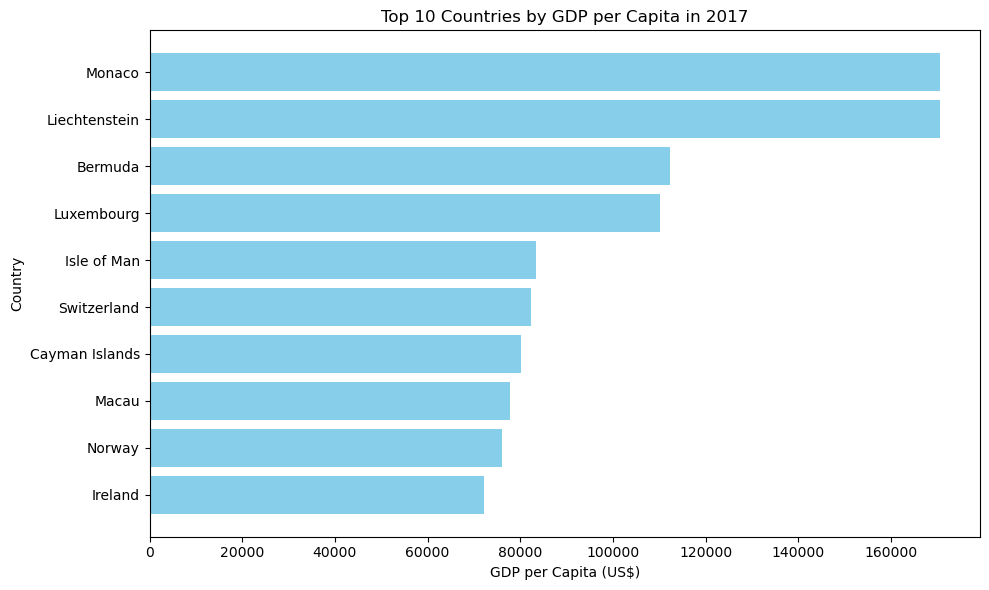

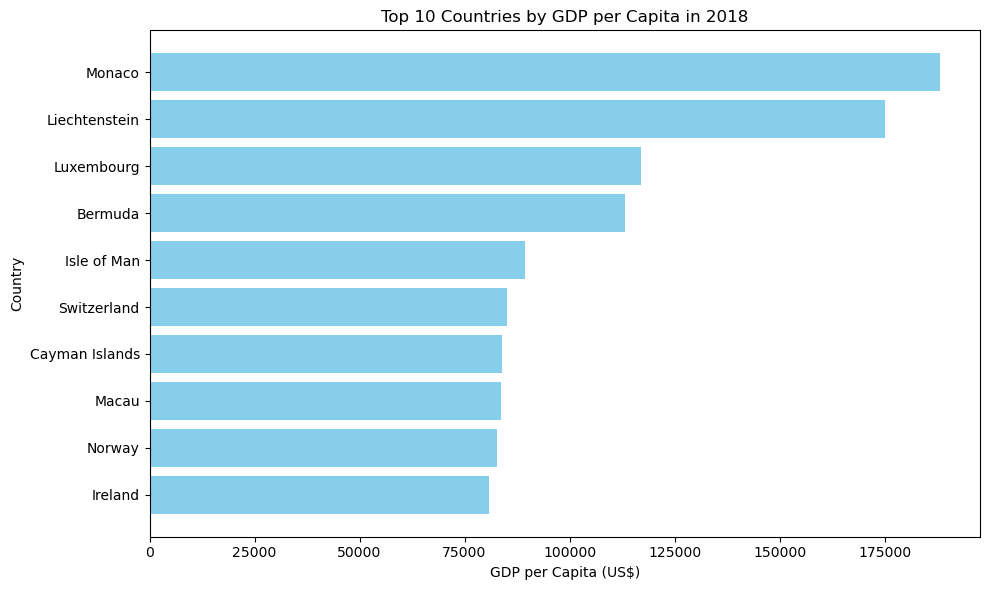

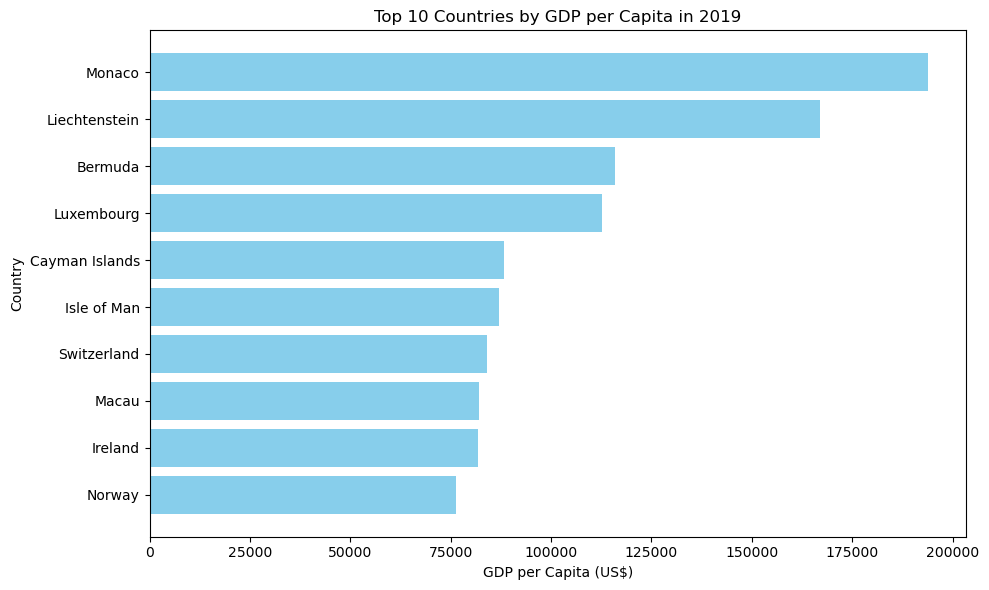

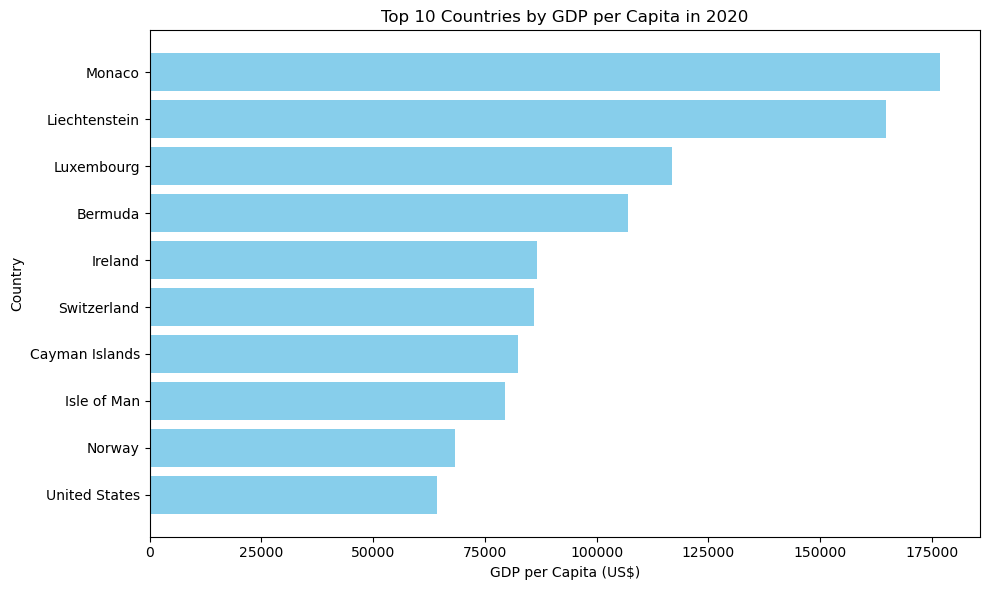

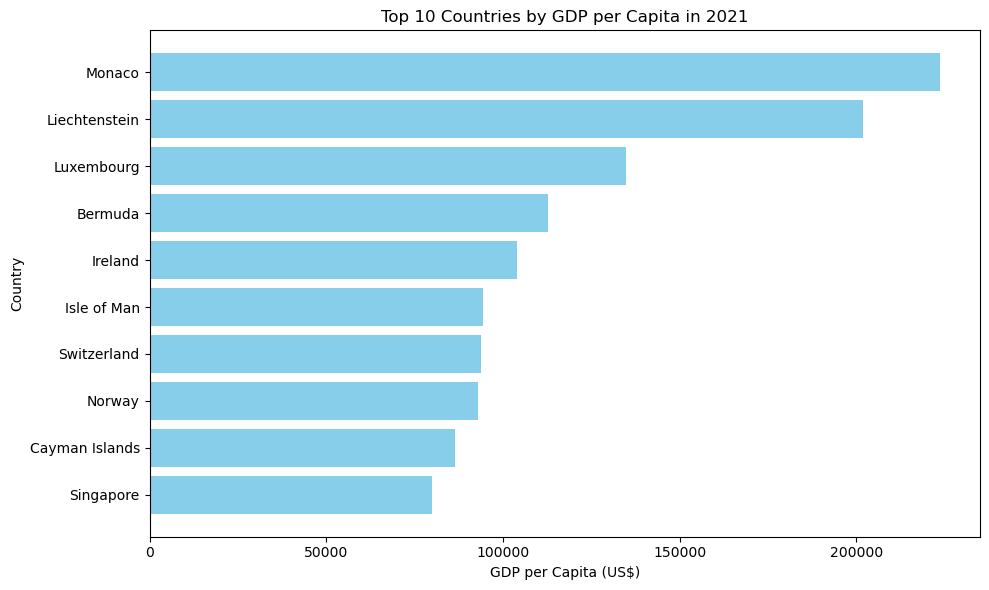

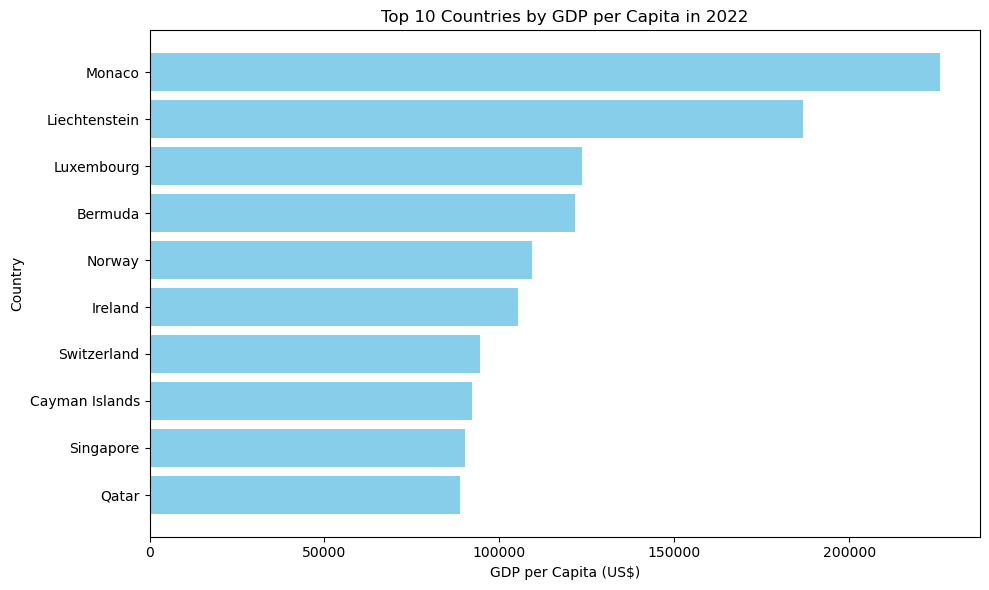

In [87]:
# We loop through each year and make a separate plot
for year, group in top10_per_year_gdp.groupby("year"):
    plt.figure(figsize=(10, 6))
    group_sorted = group.sort_values("gdp_per_capita", ascending=False)
    plt.barh(group_sorted["country"], group_sorted["gdp_per_capita"], color="skyblue")
    plt.xlabel("GDP per Capita (US$)")
    plt.ylabel("Country")
    plt.title(f"Top 10 Countries by GDP per Capita in {year}")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

#### Goverment Expenditures on Education

In [89]:
top10_per_year_edu = (
    edu_long
    .sort_values(["year", "gov_edu_exp"], ascending=[True, False])
    .groupby("year")
    .head(10)
    .reset_index(drop=True)
)

print(top10_per_year_edu)

                  country  gov_edu_exp  year
0                Kiribati    13.575000  2017
1   Micronesia, Fed. Sts.    12.416000  2017
2        Marshall Islands     9.920570  2017
3                 Namibia     9.708673  2017
4         Solomon Islands     9.643546  2017
5                    Cuba     9.046969  2017
6                 Bolivia     8.097240  2017
7                  Norway     7.845980  2017
8                Botswana     7.809245  2017
9                 Iceland     7.583860  2017
10               Kiribati    15.377000  2018
11       Marshall Islands     9.920570  2018
12  Micronesia, Fed. Sts.     9.697000  2018
13        Solomon Islands     9.643546  2018
14                   Cuba     9.046969  2018
15                Namibia     8.881123  2018
16                Vanuatu     8.606347  2018
17                Bolivia     8.015870  2018
18               Botswana     7.905386  2018
19                 Sweden     7.640840  2018
20               Kiribati    13.768655  2019
21  Micron

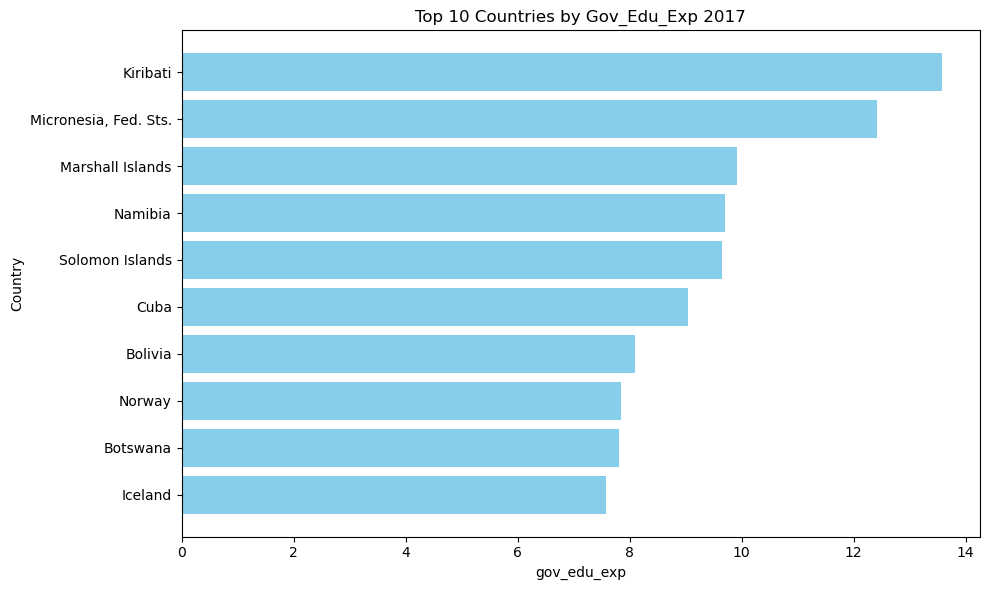

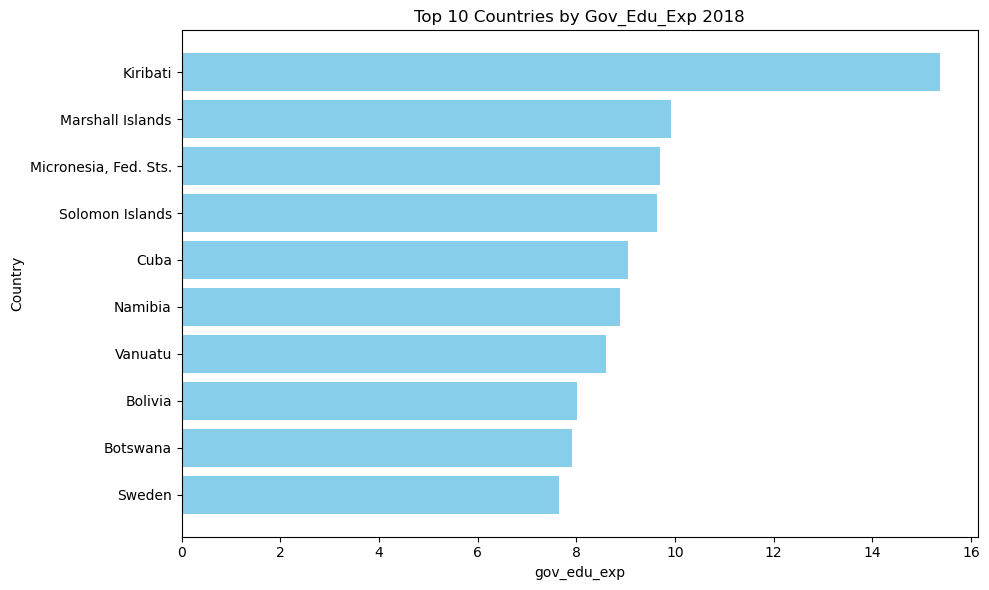

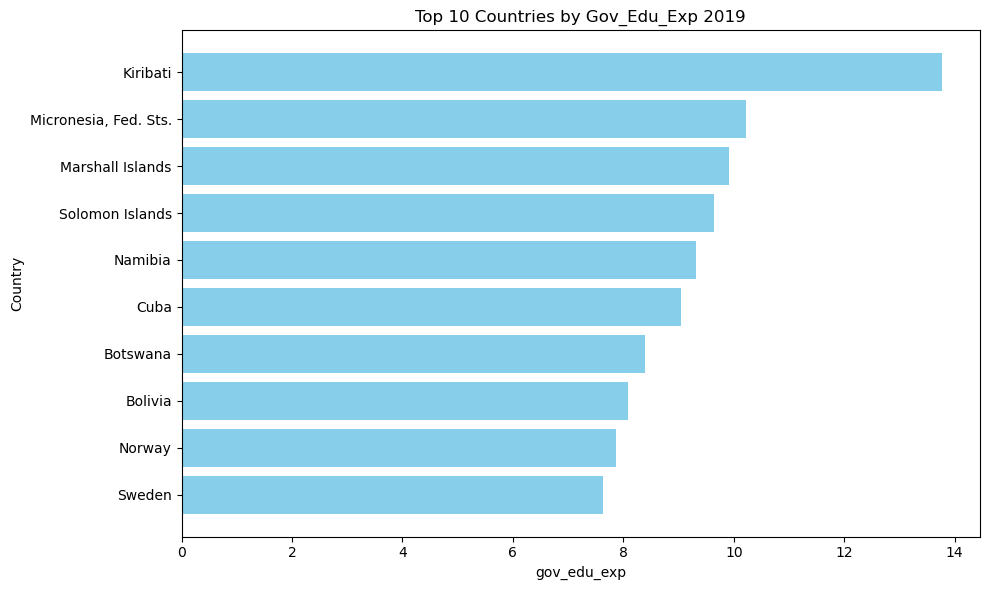

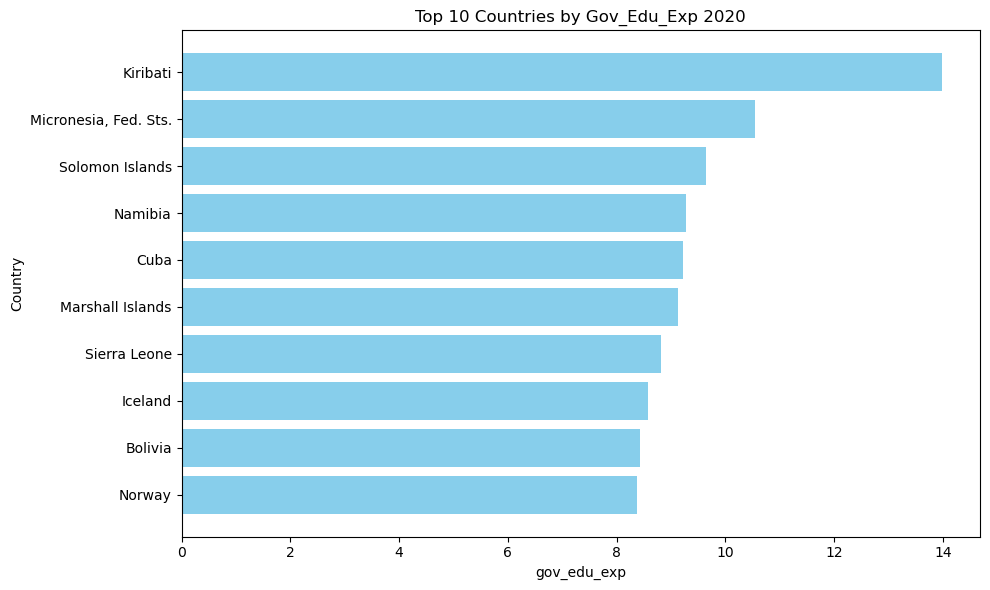

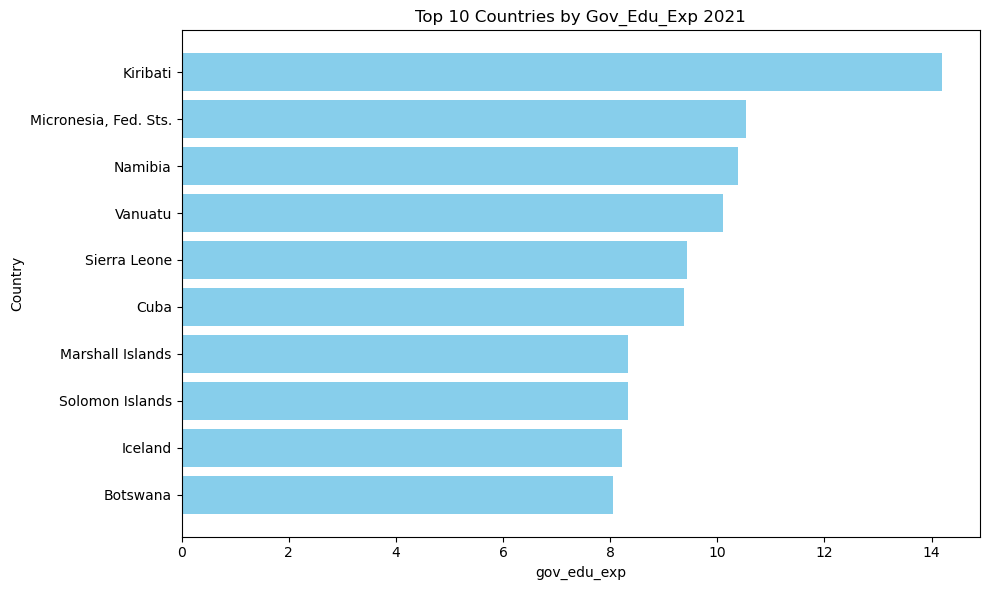

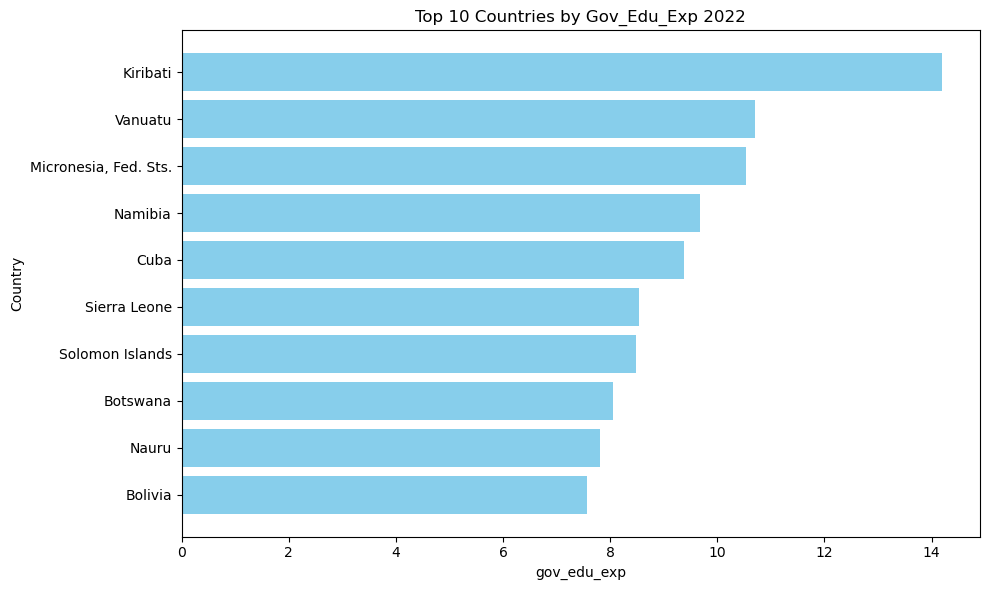

In [90]:
# Save to CSV
top10_per_year_edu.to_csv("top10_edu_per_year.csv", index=False)

# Loop through each year and make a separate plot
for year, group in top10_per_year_edu.groupby("year"):
    plt.figure(figsize=(10, 6))
    group_sorted = group.sort_values("gov_edu_exp", ascending=False)
    plt.barh(group_sorted["country"], group_sorted["gov_edu_exp"], color="skyblue")
    plt.xlabel("gov_edu_exp")
    plt.ylabel("Country")
    plt.title(f"Top 10 Countries by Gov_Edu_Exp {year}")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

#### Goverment Effectivness

In [92]:
top10_per_year_gov = (
    gov_long
    .sort_values(["year", "gov_effectiveness"], ascending=[True, False])
    .groupby("year")
    .head(10)
    .reset_index(drop=True)
)

print(top10_per_year_gov)

          country  gov_effectiveness  year
0       Singapore         100.000000  2017
1     Switzerland          99.523811  2017
2         Finland          99.047623  2017
3          Norway          98.571426  2017
4         Andorra          98.095238  2017
5          Monaco          98.095238  2017
6       Hong Kong          97.142860  2017
7          Canada          96.666664  2017
8     Netherlands          96.190475  2017
9         Denmark          95.714287  2017
10      Singapore         100.000000  2018
11        Finland          99.523811  2018
12    Switzerland          99.047623  2018
13        Andorra          98.571426  2018
14         Monaco          98.571426  2018
15      Hong Kong          97.619049  2018
16         Norway          97.142860  2018
17        Denmark          96.666664  2018
18    Netherlands          96.190475  2018
19     Luxembourg          95.714287  2018
20      Singapore         100.000000  2019
21        Finland          99.523811  2019
22    Switz

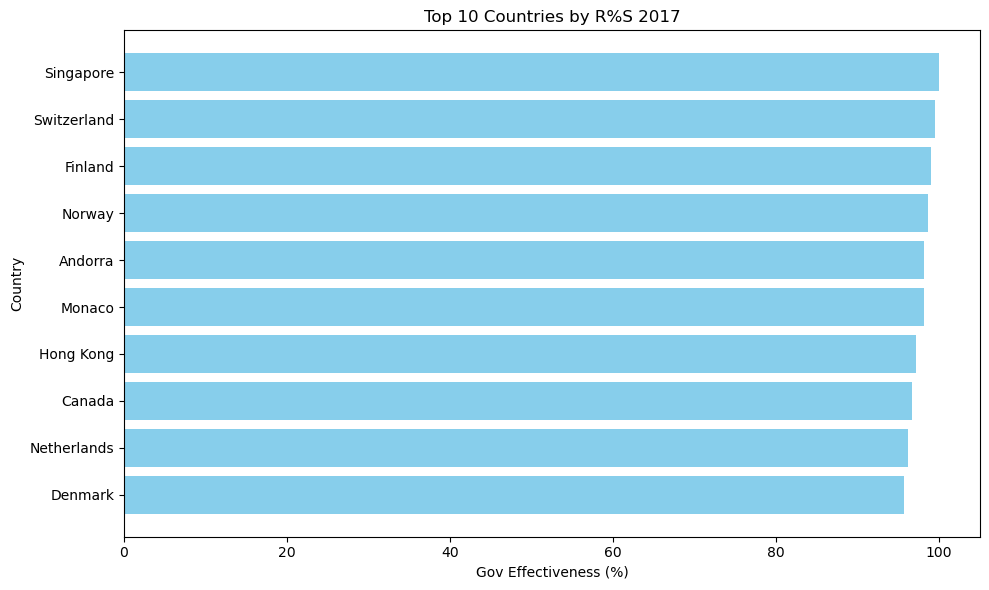

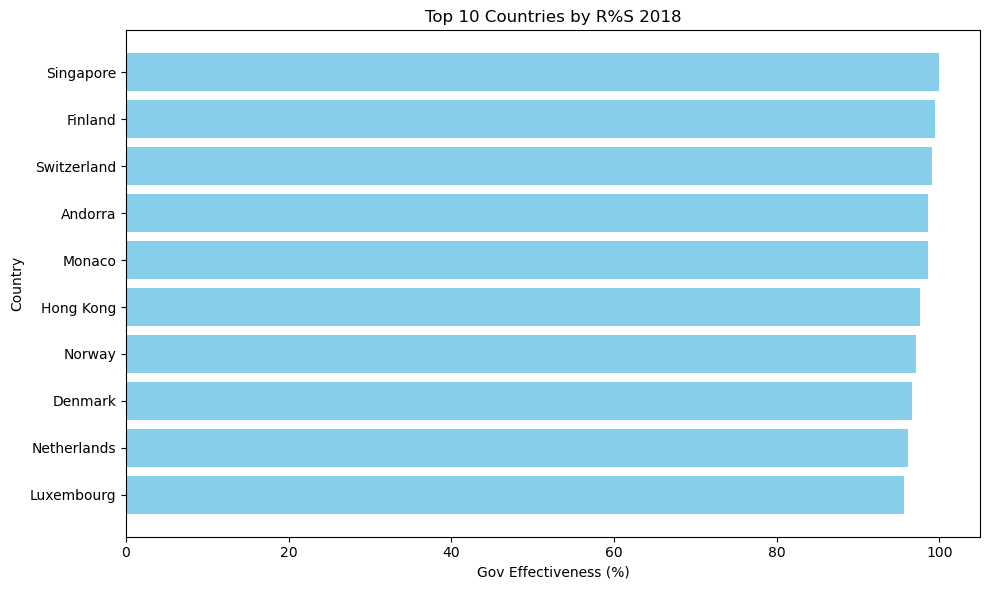

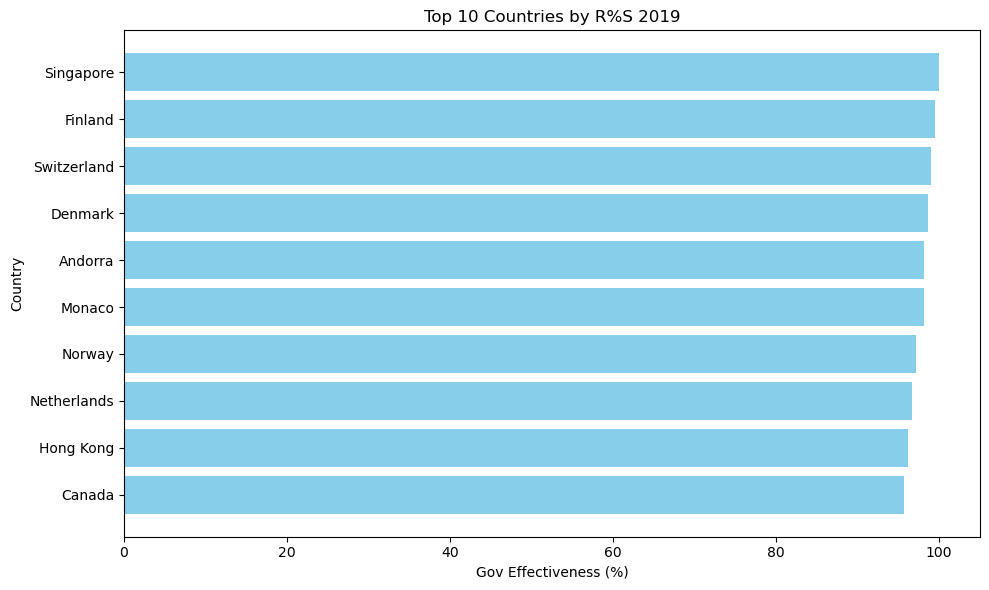

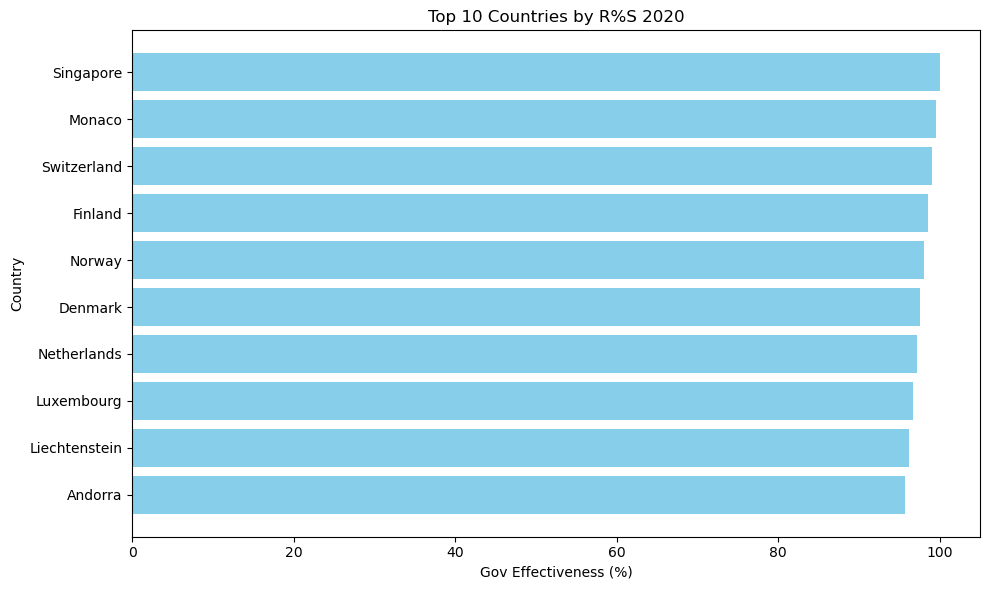

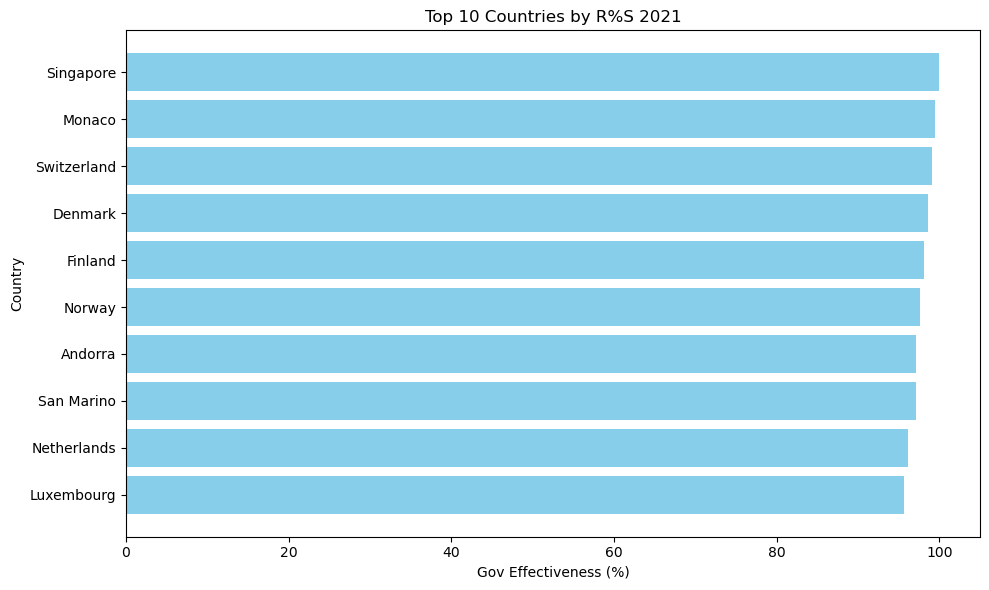

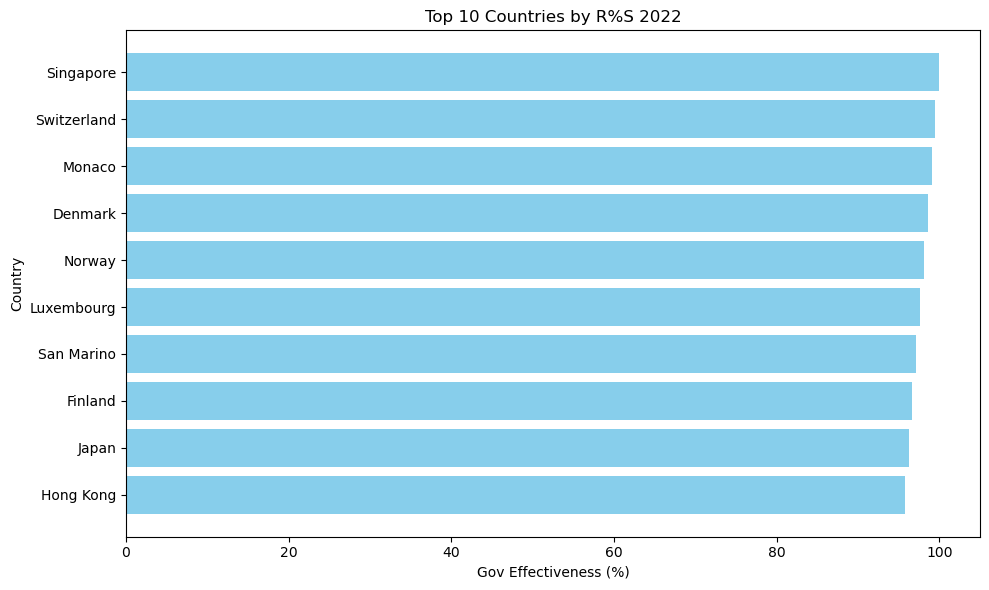

In [93]:
# We loop through each year and make a separate plot
for year, group in top10_per_year_gov.groupby("year"):
    plt.figure(figsize=(10, 6))
    group_sorted = group.sort_values("gov_effectiveness", ascending=False)
    plt.barh(group_sorted["country"], group_sorted["gov_effectiveness"], color="skyblue")
    plt.xlabel("Gov Effectiveness (%)")
    plt.ylabel("Country")
    plt.title(f"Top 10 Countries by R%S {year}")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

#### Research and Development

In [95]:
top10_per_year_res = (
    rd_long
    .sort_values(["year", "rd_exp_gdp"], ascending=[True, False])
    .groupby("year")
    .head(10)
    .reset_index(drop=True)
)

print(top10_per_year_res)

          country  rd_exp_gdp  year
0   Liechtenstein    5.868330  2017
1          Israel    4.743060  2017
2     Korea, Rep.    4.292060  2017
3          Sweden    3.362790  2017
4           Japan    3.166360  2017
5     Switzerland    3.076980  2017
6         Austria    3.056560  2017
7         Germany    3.047100  2017
8         Denmark    2.931240  2017
9   United States    2.883570  2017
10  Liechtenstein    5.868330  2018
11         Israel    4.914510  2018
12    Korea, Rep.    4.516330  2018
13         Sweden    3.321060  2018
14          Japan    3.219200  2018
15    Switzerland    3.136890  2018
16        Germany    3.110110  2018
17        Austria    3.091820  2018
18  United States    2.990450  2018
19        Denmark    2.966030  2018
20  Liechtenstein    5.868330  2019
21         Israel    5.330990  2019
22    Korea, Rep.    4.627030  2019
23         Sweden    3.387580  2019
24          Japan    3.218240  2019
25    Switzerland    3.196800  2019
26        Germany    3.16701

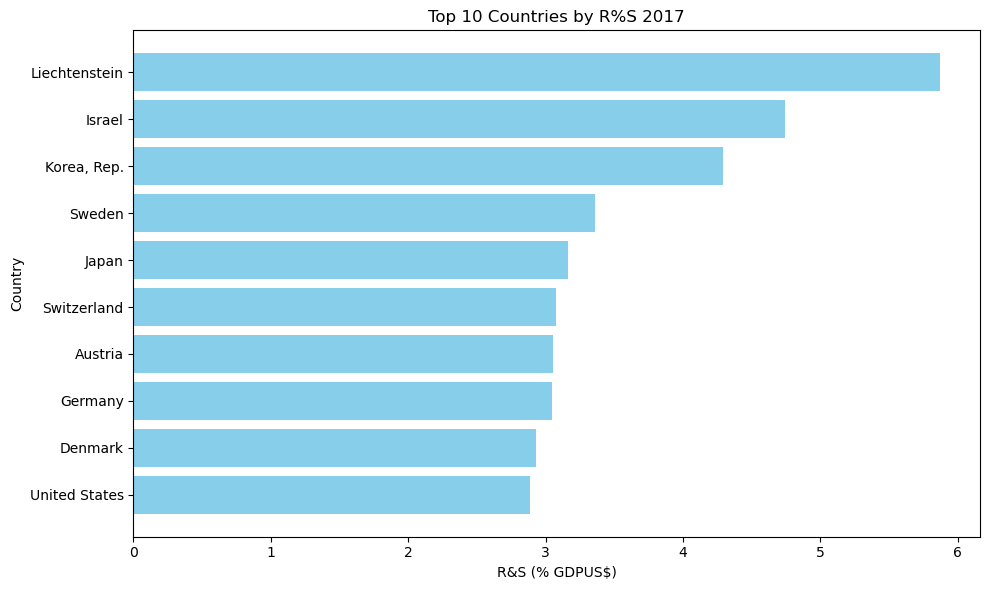

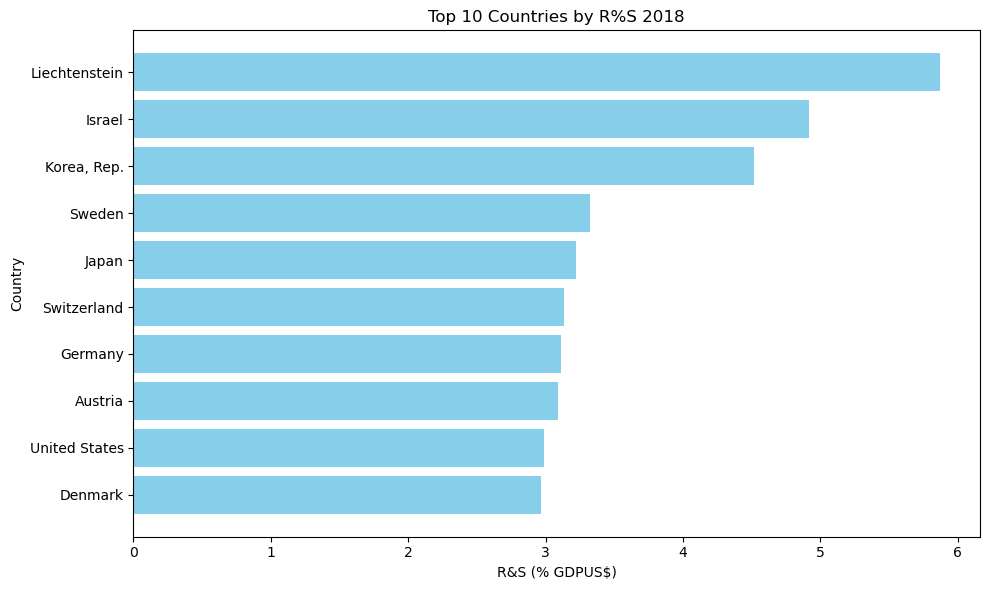

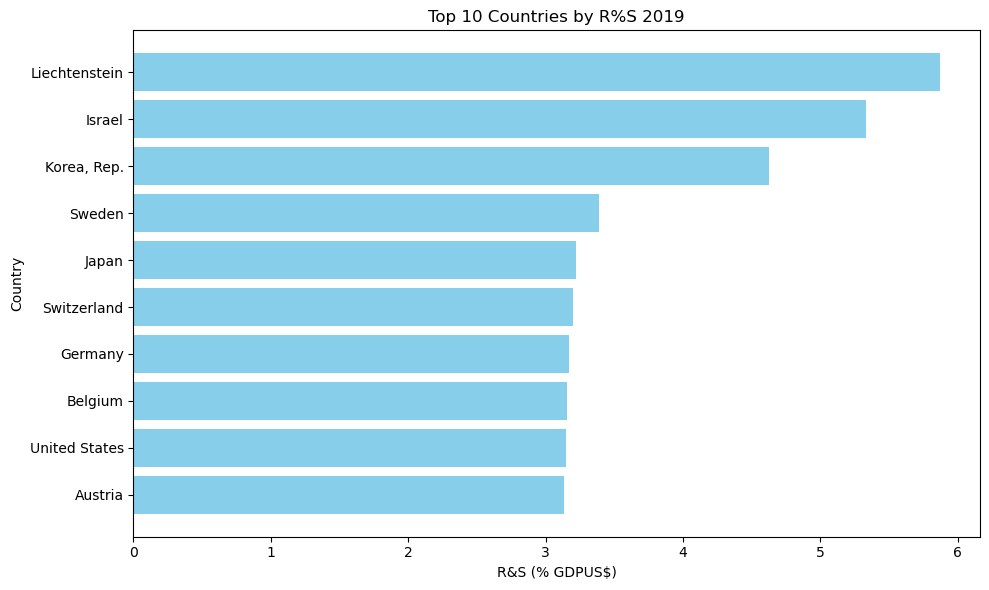

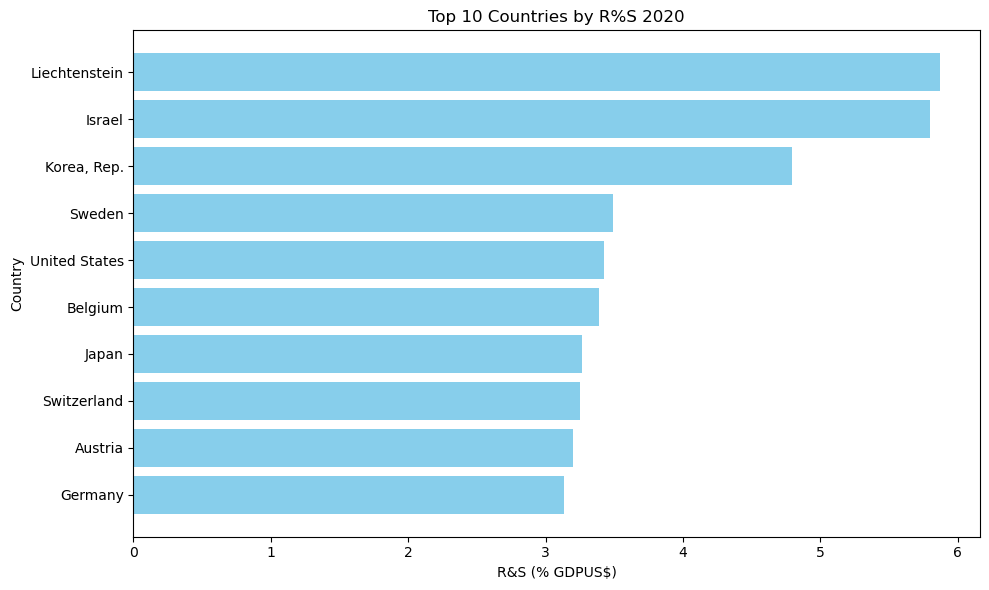

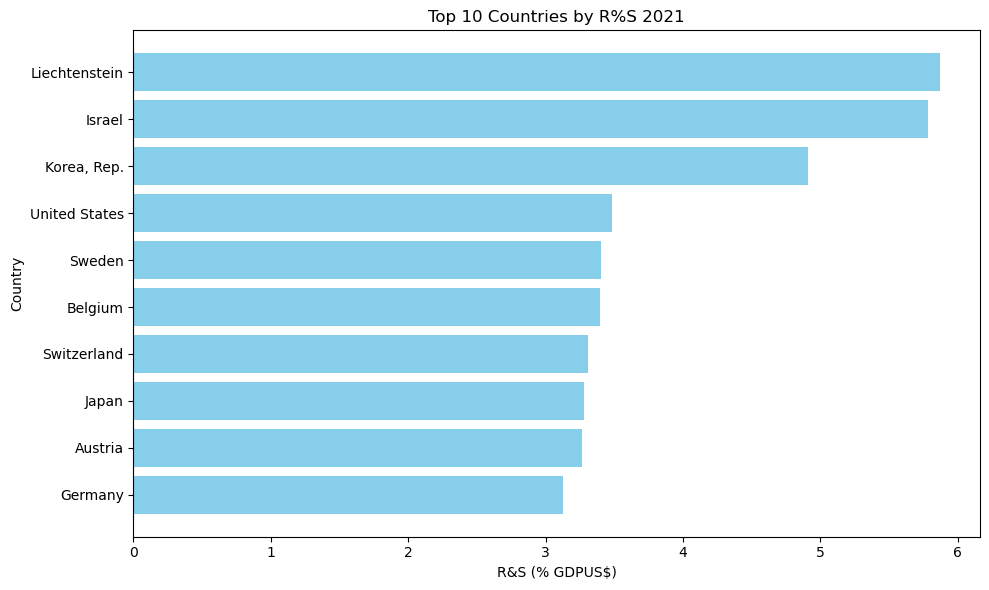

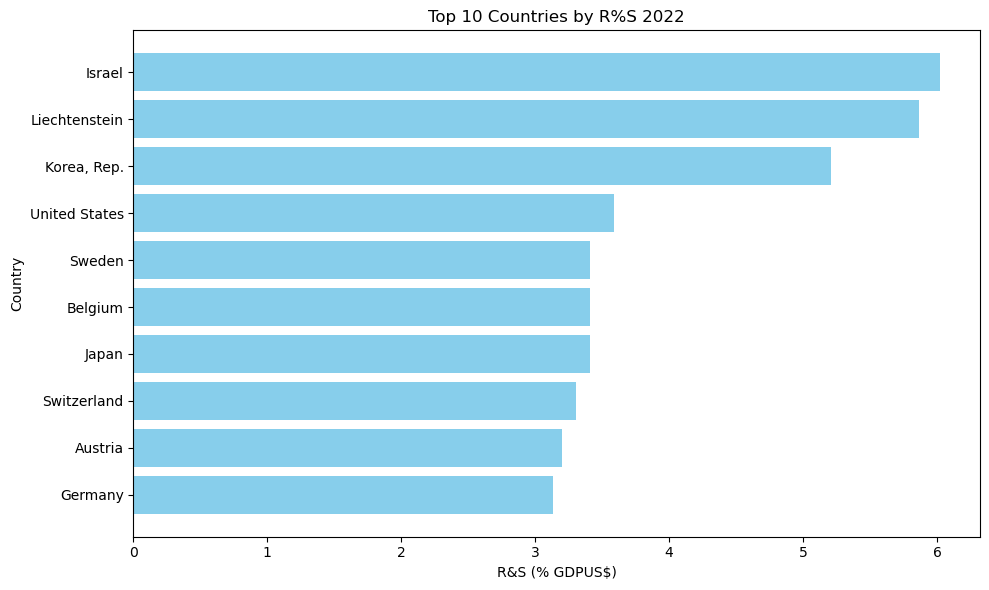

In [96]:
# We loop through each year and make a separate plot
for year, group in top10_per_year_res.groupby("year"):
    plt.figure(figsize=(10, 6))
    group_sorted = group.sort_values("rd_exp_gdp", ascending=False)
    plt.barh(group_sorted["country"], group_sorted["rd_exp_gdp"], color="skyblue")
    plt.xlabel("R&S (% GDPUS$)")
    plt.ylabel("Country")
    plt.title(f"Top 10 Countries by R%S {year}")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

## Comparative Analysis 

In [98]:
# Sort by year, then total_score descending
top10_total_score_df = (
    total_score_df
    .sort_values(["year", "total_score"], ascending=[True, False])
    .groupby("year")
    .head(10)  # top 10 per year
    .reset_index(drop=True)
)

print(top10_total_score_df)

    year           country  total_score
0   2017     United States       4027.7
1   2017    United Kingdom       2432.8
2   2017           Germany        980.5
3   2017         Australia        884.1
4   2017            Canada        733.1
5   2017             Japan        726.2
6   2017       Netherlands        699.9
7   2017            France        664.6
8   2017  China (Mainland)        656.0
9   2017       Switzerland        515.3
10  2018     United States       3910.3
11  2018    United Kingdom       2357.1
12  2018         Australia        983.3
13  2018           Germany        950.3
14  2018            Canada        734.1
15  2018       Netherlands        701.7
16  2018             Japan        697.1
17  2018  China (Mainland)        590.5
18  2018            France        553.4
19  2018       South Korea        552.1
20  2019     United States       3739.8
21  2019    United Kingdom       2257.3
22  2019         Australia        941.1
23  2019           Germany        878.1


### Function: `compute_yearly_overlaps`

This function calculates **year-by-year overlaps** between two Top-10 country lists:
- One based on a specific indicator (e.g., GDP, R&D, Government Effectiveness).
- One based on QS Total Score rankings.

#### Key Features
- **Inputs:**
  - `top10_indicator`: DataFrame of Top-10 countries per year for the indicator.
  - `top10_total_score`: DataFrame of Top-10 countries per year for QS Total Score.
  - `indicator_name`: Label for the indicator (string).
  - `baseline`: Determines denominator for overlap percentage:
    - `"score"` → size of QS Top-10 list (default).
    - `"indicator"` → size of indicator Top-10 list.
    - `"union"` → size of union of both lists.
  - Other params: `year_col`, `country_col`, `verbose`.

- **Outputs:**
  1. **`results_df` (DataFrame)**  
     Contains per-year results with columns:
     - `year`  
     - `indicator`  
     - `overlap_count` → number of overlapping countries  
     - `baseline_count` → denominator used for percentage  
     - `overlap_pct` → percentage of overlap  
     - `overlap_countries` → list of overlapping countries  

  2. **`totals` (dict)**  
     Aggregate overlap statistics across all years:
     - `total_overlap_sum`, `total_baseline_sum`, `total_pct_sum`
     - `unique_overlap_countries`, `unique_union_countries`
     - `unique_overlap_pct`

#### Purpose
This function provides both **per-year** and **aggregate** insights into how much the **Top-10 QS countries** overlap with the **Top-10 countries by a chosen indicator**, helping evaluate alignment or divergence between university rankings and national indicators.

In [100]:
def compute_yearly_overlaps(
    top10_indicator: pd.DataFrame,
    top10_total_score: pd.DataFrame,
    indicator_name: str,
    *,
    year_col: str = "year",
    country_col: str = "country",
    baseline: Literal["score", "indicator", "union"] = "score",
    verbose: bool = True,
) -> tuple[pd.DataFrame, Dict[str, Any]]:
    """
    Compute year-by-year overlaps between a Top-10 indicator list and the Top-10 Total Score list.

    Parameters
    ----------
    top10_indicator : DataFrame
        Must contain columns [year_col, country_col] for the indicator Top-10 per year.
    top10_total_score : DataFrame
        Must contain columns [year_col, country_col] for the Total Score Top-10 per year.
    indicator_name : str
        A label for the indicator (e.g., "GDP", "Primary", "Gov_Effectiveness", "R&D").
    year_col : str
        Name of the year column (default "year").
    country_col : str
        Name of the country column (default "country").
    baseline : {"score", "indicator", "union"}
        What to use in the denominator for the overlap percentage:
        - "score": size of Total Score list (default; matches your previous snippets)
        - "indicator": size of the indicator list
        - "union": size of the union of both lists
    verbose : bool
        If True, prints a per-year line and totals.

    Returns
    -------
    results_df : DataFrame
        Columns: [year, indicator, overlap_count, baseline_count, overlap_pct, overlap_countries]
    totals : dict
        {
          "indicator": str,
          "total_overlap_sum": int,
          "total_baseline_sum": int,
          "total_pct_sum": float,
          "unique_overlap_countries": set,
          "unique_union_countries": set,
          "unique_overlap_pct": float
        }
    """

    # Ensure required columns exist
    for df, name in [(top10_indicator, "top10_indicator"), (top10_total_score, "top10_total_score")]:
        missing = {year_col, country_col} - set(df.columns)
        if missing:
            raise ValueError(f"{name} is missing columns: {missing}")

    # Gather all years present in either dataframe
    years = sorted(set(top10_indicator[year_col].unique()).union(set(top10_total_score[year_col].unique())))

    # Accumulators
    rows = []
    total_overlap_sum = 0
    total_baseline_sum = 0
    all_overlap_countries = set()
    all_union_countries = set()

    for year in years:
        ind_countries = set(top10_indicator.loc[top10_indicator[year_col] == year, country_col])
        score_countries = set(top10_total_score.loc[top10_total_score[year_col] == year, country_col])

        overlap = ind_countries & score_countries

        if baseline == "score":
            denom = len(score_countries)
        elif baseline == "indicator":
            denom = len(ind_countries)
        elif baseline == "union":
            denom = len(ind_countries | score_countries)
        else:
            raise ValueError("baseline must be one of {'score','indicator','union'}")

        overlap_pct = (len(overlap) / denom * 100) if denom else 0.0

        # Track totals (sum-based uses same denominator choice as your previous code: size of score list)
        total_overlap_sum += len(overlap)
        total_baseline_sum += len(score_countries)  # keep consistent with your earlier snippets

        # Unique (set-based) accumulators
        all_overlap_countries |= overlap
        all_union_countries |= (ind_countries | score_countries)

        rows.append({
            "year": year,
            "indicator": indicator_name,
            "overlap_count": len(overlap),
            "baseline_count": denom,
            "overlap_pct": round(overlap_pct, 1),
            "overlap_countries": sorted(overlap),
        })

        if verbose:
            print(f"{year} → Overlap: {len(overlap)} countries ({overlap_pct:.1f}%) → {sorted(overlap)}")

    # Totals
    total_pct_sum = (total_overlap_sum / total_baseline_sum * 100) if total_baseline_sum else 0.0
    unique_overlap_pct = (len(all_overlap_countries) / len(all_union_countries) * 100) if all_union_countries else 0.0

    if verbose:
        print("\n=== TOTAL (sum-based) ===")
        print(f"Overlaps: {total_overlap_sum} over baseline {total_baseline_sum} → {total_pct_sum:.1f}%")
        print("=== UNIQUE (set-based across period) ===")
        print(f"Unique overlap countries: {len(all_overlap_countries)} / {len(all_union_countries)} "
              f"({unique_overlap_pct:.1f}%)")

    results_df = pd.DataFrame(rows)
    totals = {
        "indicator": indicator_name,
        "total_overlap_sum": total_overlap_sum,
        "total_baseline_sum": total_baseline_sum,
        "total_pct_sum": round(total_pct_sum, 1),
        "unique_overlap_countries": all_overlap_countries,
        "unique_union_countries": all_union_countries,
        "unique_overlap_pct": round(unique_overlap_pct, 1),
    }
    return results_df, totals

In [101]:
def quick_overlap_check(
    top10_indicator: pd.DataFrame,
    top10_total_score: pd.DataFrame,
    *,
    year_col: str = "year",
    country_col: str = "country",
) -> pd.DataFrame:
    """
    Minimal cross-check of overlaps under three baselines: score, indicator, union.
    Returns a tidy per-year DataFrame with counts and percentages.
    """
    years = sorted(
        set(top10_indicator[year_col].unique()).union(
            set(top10_total_score[year_col].unique())
        )
    )

    rows = []
    for y in years:
        ind = set(top10_indicator.loc[top10_indicator[year_col] == y, country_col].astype(str))
        sco = set(top10_total_score.loc[top10_total_score[year_col] == y, country_col].astype(str))
        overlap = ind & sco
        union = ind | sco

        n_ind, n_sco = len(ind), len(sco)
        n_ovl, n_uni = len(overlap), len(union)

        pct_score = (n_ovl / n_sco * 100) if n_sco else 0.0
        pct_indicator = (n_ovl / n_ind * 100) if n_ind else 0.0
        pct_union = (n_ovl / n_uni * 100) if n_uni else 0.0

        rows.append({
            "year": y,
            "n_indicator": n_ind,
            "n_score": n_sco,
            "n_overlap": n_ovl,
            "pct_score": round(pct_score, 1),
            "pct_indicator": round(pct_indicator, 1),
            "pct_union": round(pct_union, 1),
            "overlap_countries": sorted(overlap),
        })

    return pd.DataFrame(rows)

In [102]:
check_df = quick_overlap_check(top10_per_year_gdp, top10_total_score_df)
print(check_df)

   year  n_indicator  n_score  n_overlap  pct_score  pct_indicator  pct_union  \
0  2017           10       10          1       10.0           10.0        5.3   
1  2018           10       10          0        0.0            0.0        0.0   
2  2019           10       10          0        0.0            0.0        0.0   
3  2020           10       10          2       20.0           20.0       11.1   
4  2021           10       10          1       10.0           10.0        5.3   
5  2022           10       10          1       10.0           10.0        5.3   

              overlap_countries  
0                 [Switzerland]  
1                            []  
2                            []  
3  [Switzerland, United States]  
4                 [Switzerland]  
5                 [Switzerland]  


In [103]:
gdp_df, gdp_totals = compute_yearly_overlaps(top10_per_year_gdp, top10_total_score_df, 
                                             "GDP", baseline="score")
edu_df, edu_totals = compute_yearly_overlaps(top10_per_year_edu, top10_total_score_df, 
                                             "Education", baseline="score")
gov_df, gov_totals = compute_yearly_overlaps(top10_per_year_gov, top10_total_score_df, 
                                             "Gov_Effectiveness", baseline="score")
res_df, res_totals = compute_yearly_overlaps(top10_per_year_res, top10_total_score_df, 
                                             "R&D", baseline="score")

2017 → Overlap: 1 countries (10.0%) → ['Switzerland']
2018 → Overlap: 0 countries (0.0%) → []
2019 → Overlap: 0 countries (0.0%) → []
2020 → Overlap: 2 countries (20.0%) → ['Switzerland', 'United States']
2021 → Overlap: 1 countries (10.0%) → ['Switzerland']
2022 → Overlap: 1 countries (10.0%) → ['Switzerland']

=== TOTAL (sum-based) ===
Overlaps: 5 over baseline 60 → 8.3%
=== UNIQUE (set-based across period) ===
Unique overlap countries: 2 / 22 (9.1%)
2017 → Overlap: 0 countries (0.0%) → []
2018 → Overlap: 0 countries (0.0%) → []
2019 → Overlap: 0 countries (0.0%) → []
2020 → Overlap: 0 countries (0.0%) → []
2021 → Overlap: 0 countries (0.0%) → []
2022 → Overlap: 0 countries (0.0%) → []

=== TOTAL (sum-based) ===
Overlaps: 0 over baseline 60 → 0.0%
=== UNIQUE (set-based across period) ===
Unique overlap countries: 0 / 25 (0.0%)
2017 → Overlap: 3 countries (30.0%) → ['Canada', 'Netherlands', 'Switzerland']
2018 → Overlap: 1 countries (10.0%) → ['Netherlands']
2019 → Overlap: 2 countrie

### Economic Indicators vs. Total Score Top‑10

#### GDP (per capita)
| Indicator | Year | Overlap Countries | Overlap Count | Overlap % |
|---|---:|---|---:|---:|
| GDP | 2017 | Switzerland | 1 | 10.0% |
|  | 2018 |  | 0 | 0.0% |
|  | 2019 |  | 0 | 0.0% |
|  | 2020 | Switzerland, United States | 2 | 20.0% |
|  | 2021 | Switzerland | 1 | 10.0% |
|  | 2022 | Switzerland | 1 | 10.0% |
|  | 2023 |  | 0 | 0.0% |
|  | 2024 |  | 0 | 0.0% |
| **TOTAL** |  |  | **5 / 60** | **8.3%** |

#### Government Expenditure on Education (% of GDP)
| Indicator | Year | Overlap Countries | Overlap Count | Overlap % |
|---|---:|---|---:|---:|
| Gov. Exp. Edu | 2017 |  | 0 | 0.0% |
|  | 2018 |  | 0 | 0.0% |
|  | 2019 |  | 0 | 0.0% |
|  | 2020 |  | 0 | 0.0% |
|  | 2021 |  | 0 | 0.0% |
|  | 2022 |  | 0 | 0.0% |
|  | 2023 |  | 0 | 0.0% |
| **TOTAL** |  |  | **0 / 60** | **0.0%** |

#### R&D Expenditure (% of GDP)
| Indicator | Year | Overlap Countries | Overlap Count | Overlap % |
|---|---:|---|---:|---:|
| R&D | 2017 | Canada, Netherlands, Switzerland | 3 | 30.0% |
|  | 2018 | Netherlands | 1 | 10.0% |
|  | 2019 | Canada, Netherlands | 2 | 20.0% |
|  | 2020 | Netherlands, Switzerland | 2 | 20.0% |
|  | 2021 | Netherlands, Switzerland | 2 | 20.0% |
|  | 2022 | Japan, Switzerland | 2 | 20.0% |
|  | 2023 |  | 0 | 0.0% |
| **TOTAL** |  |  | **12 / 60** | **20.0%** |

#### Government Effectiveness (Percentile Rank)
| Indicator | Year | Overlap Countries | Overlap Count | Overlap % |
|---|---:|---|---:|---:|
| Gov. Effectiveness | 2017 | Germany, Japan, Switzerland, United States | 4 | 40.0% |
|  | 2018 | Germany, Japan, United States | 3 | 30.0% |
|  | 2019 | Germany, Japan, United States | 3 | 30.0% |
|  | 2020 | Japan, Switzerland, United States | 3 | 30.0% |
|  | 2021 | Japan, Switzerland, United States | 3 | 30.0% |
|  | 2022 | Japan, Switzerland, United States | 3 | 30.0% |
|  | 2023 |  | 0 | 0.0% |
| **TOTAL** |  |  | **19 / 60** | **31.7%** |

### Discussion of Economic Indicators vs. QS Total Score Top-10

The overlap analysis highlights substantial variation in how economic and governance indicators align with the QS Top-10 countries.

- **GDP per capita**  
  Shows **very limited overlap (8.3%)**, with *Switzerland* being the only consistently recurring country. The *United States* appears once, but most years show no overlap.  
  → Suggests that while economic wealth supports strong higher education, it is not by itself a reliable predictor of QS Top-10 representation.

- **Government expenditure on education (% of GDP)**  
  Exhibits **no overlap at all (0%)**, indicating a complete divergence between spending levels and the presence of globally top-ranked universities.  
  → Implies that absolute levels of spending matter less than efficiency, allocation, and system quality.

- **R&D expenditure (% of GDP)**  
  Shows a **moderate overlap (20%)**, with recurring appearances of *Netherlands*, *Switzerland*, *Canada*, and later *Japan*.  
  → Suggests that sustained R&D funding contributes to academic excellence, though not all top R&D investors translate into QS Top-10 presence.

- **Government effectiveness (percentile rank)**  
  Has the **highest overlap (31.7%)**, with a core group of *Germany, Japan, Switzerland,* and the *United States* appearing repeatedly.  
  → Indicates that strong governance and institutional quality are more closely aligned with global university performance than sheer economic indicators.

**Overall Insight**
Governance and R&D investment show **stronger associations with QS rankings** than GDP per capita or education expenditure.  
Countries like *Switzerland* emerge as consistent overlaps across multiple indicators, underlining their balanced strengths in wealth, governance, and research.


## Educational Indicators - Exploratory Data Analysis 

### Data Overview

The educational indicators dataset is sourced from the World Bank’s *World Development Indicators* and captures country-level measures of human capital and schooling outcomes for the period **2017–2022**. This dataset provides annual values for three core variables:

- **Primary school enrollment (% gross)**  
- **Secondary school enrollment (% gross)**  
- **Tertiary school enrollment (% gross)**  

Each indicator reflects the gross enrollment ratio, expressed as a percentage of the relevant age group population. Values above 100% are possible when students outside the official age group are enrolled.

The dataset is structured at the **country-year level**, enabling direct comparison with both the QS World University Rankings and with macroeconomic and governance indicators. Metadata such as the number of unique countries represented, the time span of coverage, and the availability of each indicator is recorded. A sample inspection of rows is performed to verify formatting consistency and units of measurement across the three indicators.

Descriptive statistics (mean, median, standard deviation) are computed for each enrollment variable to gain an initial understanding of their central tendency and variation across countries and over time. These statistics help highlight cross-country differences in educational attainment and provide context for their potential influence on university performance.

### Data Cleaning

Several preprocessing steps were applied to ensure consistency and usability of the educational indicators dataset:

1. **Standardization of country names** –  
   Country names were stripped of whitespace and harmonized to align with the naming conventions used in the QS dataset and other World Bank indicators (e.g., `"USA"` → `"United States"`, `"UK"` → `"United Kingdom"`).

2. **Type conversion** –  
   Year columns were coerced to numeric values, and all enrollment indicators were explicitly converted to floating-point format. This ensured compatibility with statistical operations and prevented silent errors during merging.

3. **Handling of missing values** –  
   Missing values, represented by placeholders such as `".."`, were replaced with `NaN`. Linear interpolation across years (2017–2022) was used where feasible, while countries with entire rows of missing values across all three indicators were flagged for potential exclusion from comparative analyses.

4. **Duplicate resolution** –  
   Duplicate `(country, year)` entries were removed to enforce uniqueness of observations. In cases of conflict, the most recent entry was retained.

5. **Subset selection** –  
   Only the three core indicators—primary, secondary, and tertiary enrollment—were retained, while unrelated metadata columns were dropped to streamline the dataset.

These steps produced a **clean, structured dataset** with harmonized country names, validated numerical types, and reduced missingness, ensuring its readiness for merging with QS rankings and other World Bank indicators.


In [108]:
edu_world_df = pd.read_csv("data/world-education-data.csv")

In [109]:
edu_world_df.dtypes

country                        object
country_code                   object
year                            int64
gov_exp_pct_gdp               float64
lit_rate_adult_pct            float64
pri_comp_rate_pct             float64
pupil_teacher_primary         float64
pupil_teacher_secondary       float64
school_enrol_primary_pct      float64
school_enrol_secondary_pct    float64
school_enrol_tertiary_pct     float64
dtype: object

In [110]:
focus_cols = [
    "school_enrol_primary_pct",
    "school_enrol_secondary_pct",
    "school_enrol_tertiary_pct"
]

# 1. Overview of data types & non-null counts
print("=== Data Info ===")
edu_world_df[["country", "year"] + focus_cols].info()

# 2. Basic descriptive statistics
print("\n=== Descriptive Stats ===")
print(edu_world_df[focus_cols].describe())

# 3. Missing values count & percentage
print("\n=== Missing Values ===")
missing_summary = edu_world_df[focus_cols].isna().sum().to_frame("missing_count")
missing_summary["missing_pct"] = (missing_summary["missing_count"] / len(edu_world_df)) * 100
print(missing_summary)

# 4. Check duplicates
duplicate_rows = edu_world_df.duplicated(subset=["country", "year"])
print(f"\nNumber of duplicate country-year rows: {duplicate_rows.sum()}")

# 5. Sample rows
print("\n=== Sample Data ===")
print(edu_world_df[["country", "year"] + focus_cols].sample(5))

=== Data Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5892 entries, 0 to 5891
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     5892 non-null   object 
 1   year                        5892 non-null   int64  
 2   school_enrol_primary_pct    5352 non-null   float64
 3   school_enrol_secondary_pct  4745 non-null   float64
 4   school_enrol_tertiary_pct   4392 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 230.3+ KB

=== Descriptive Stats ===
       school_enrol_primary_pct  school_enrol_secondary_pct  \
count               5352.000000                 4745.000000   
mean                 101.525234                   78.939810   
std                   13.029901                   28.350998   
min                    8.447979                    3.293810   
25%                   97.281084                   59.364799   
50%     

### Handling missing values

In [112]:
focus_cols = [
    "school_enrol_primary_pct",
    "school_enrol_secondary_pct",
    "school_enrol_tertiary_pct",
]

# 0) Ensure numeric (coerce weird strings like '..' to NaN)
for c in focus_cols:
    edu_world_df[c] = pd.to_numeric(edu_world_df[c], errors="coerce")

# 1) Sort so interpolation makes sense over time
edu_world_df = edu_world_df.sort_values(["country", "year"])

# 2) Interpolate within each country (keeps index aligned)
edu_world_df[focus_cols] = (
    edu_world_df
      .groupby("country")[focus_cols]
      .transform(lambda g: g.interpolate(method="linear"))
)

# 3) Optional: fill any edges that interpolation can’t fill
edu_world_df[focus_cols] = (
    edu_world_df
      .groupby("country")[focus_cols]
      .transform(lambda g: g.ffill().bfill())
)

# 4) Quick check
print(edu_world_df[focus_cols].isna().sum())

school_enrol_primary_pct       35
school_enrol_secondary_pct     64
school_enrol_tertiary_pct     187
dtype: int64


In [113]:
# Missing counts
missing_counts = edu_world_df[focus_cols].isna().sum()

# Missing percentages
missing_pct = (missing_counts / len(edu_world_df)) * 100

# Combine into a nice DataFrame
missing_summary = pd.DataFrame({
    "missing_count": missing_counts,
    "missing_pct": missing_pct.round(2)  # Round to 2 decimal places
})

print(missing_summary)

                            missing_count  missing_pct
school_enrol_primary_pct               35         0.59
school_enrol_secondary_pct             64         1.09
school_enrol_tertiary_pct             187         3.17


In [114]:
edu_world_df = standardize_country_names(edu_world_df, col="country")

In [115]:
# Duplicates by country-year
dups = edu_world_df.duplicated(["country", "year"]).sum()
print("Duplicate country-year rows:", dups)

Duplicate country-year rows: 0


### Function: `build_edu_merge`

This function prepares a **merged dataset** that combines QS university performance (total score per country-year) with World Bank educational indicators (primary, secondary, and tertiary school enrollment rates).  

**Steps performed:**

1. **Input validation** – checks that both input DataFrames contain the required columns (`country`, `year`, `total_score` for QS; enrollment indicators for education). Raises an error if columns are missing.  

2. **Standardization of country names** – trims whitespace and replaces common name variants (e.g., `"USA"` → `"United States"`, `"UK"` → `"United Kingdom"`) to ensure consistent merging.  

3. **Type conversion and cleaning** –  
   - Converts `year` to numeric type (`Int64`).  
   - Coerces enrollment columns to numeric, handling invalid entries.  
   - Removes duplicate `(country, year)` rows, keeping the latest record.  

4. **Merging datasets** – performs an **inner join** on `country` and `year`, combining QS scores with enrollment indicators.  

5. **Handling missing values** – drops rows where `total_score` or any enrollment indicator is missing, ensuring a clean dataset for correlation analysis.  

6. **Output** – returns a tidy DataFrame with columns:  
   - `country`, `year`, `total_score`  
   - `school_enrol_primary_pct`, `school_enrol_secondary_pct`, `school_enrol_tertiary_pct`  

The resulting dataset is **clean, harmonized, and ready for correlation or overlap analyses** between university rankings and educational indicators.


In [117]:
def build_edu_merge(total_score_df: pd.DataFrame, edu_world_df: pd.DataFrame) -> pd.DataFrame:
    """
    Merge QS total_score (country, year) with enrollment percentages (primary/secondary/tertiary).
    - Trims country names
    - Optionally standardizes common variants
    - Ensures numeric types
    - Drops rows with required NaNs
    Returns a tidy DataFrame ready for correlation analysis.
    """
    required_ts = {"country", "year", "total_score"}
    required_edu = {
        "country", "year",
        "school_enrol_primary_pct",
        "school_enrol_secondary_pct",
        "school_enrol_tertiary_pct",
    }
    missing_ts = required_ts - set(total_score_df.columns)
    missing_edu = required_edu - set(edu_world_df.columns)
    if missing_ts:
        raise KeyError(f"total_score_df missing columns: {sorted(missing_ts)}")
    if missing_edu:
        raise KeyError(f"edu_world_df missing columns: {sorted(missing_edu)}")

    # --- 1) Standardize country names
    for df in (total_score_df, edu_world_df):
        df["country"] = df["country"].astype(str).str.strip()

    # --- 2) Types & cleaning
    total_score_df = total_score_df.copy()
    edu_world_df = edu_world_df.copy()

    # Ensure year is int (drop rows where it's missing or non-numeric)
    for df in (total_score_df, edu_world_df):
        df["year"] = pd.to_numeric(df["year"], errors="coerce").astype("Int64")

    # Enrollment to numeric
    enrol_cols = [
        "school_enrol_primary_pct",
        "school_enrol_secondary_pct",
        "school_enrol_tertiary_pct",
    ]
    for c in enrol_cols:
        edu_world_df[c] = pd.to_numeric(edu_world_df[c], errors="coerce")

    # Optional: de-duplicate on (country, year) by keeping the latest/first
    total_score_df = (total_score_df
                      .sort_values(["country", "year"])
                      .drop_duplicates(subset=["country", "year"], keep="last"))
    edu_world_df = (edu_world_df
                    .sort_values(["country", "year"])
                    .drop_duplicates(subset=["country", "year"], keep="last"))

    # --- 3) Merge
    merged = pd.merge(
        total_score_df[["country", "year", "total_score"]],
        edu_world_df[["country", "year"] + enrol_cols],
        on=["country", "year"],
        how="inner",
        validate="one_to_one"  # change to "many_to_one" if needed
    )

    # --- 4) Drop rows with missing required values
    before = len(merged)
    merged = merged.dropna(subset=["total_score"] + enrol_cols)
    after = len(merged)

    # --- 5) Keep only relevant columns (already the case, but explicit)
    merged = merged[["country", "year", "total_score"] + enrol_cols].copy()

    # Quick sanity print
    print(f"Merged rows (before dropna → after): {before} → {after}")
    print(merged.head())

    return merged

In [118]:
merged_edu_ind = build_edu_merge(total_score_df, edu_world_df)

# keep only the relevant subset
merged_edu_ind_subset = merged_edu_ind[[
    "country", "year", "total_score",
    "school_enrol_primary_pct", 
    "school_enrol_secondary_pct", 
    "school_enrol_tertiary_pct"
]].copy()

Merged rows (before dropna → after): 225 → 225
     country  year  total_score  school_enrol_primary_pct  \
0  Argentina  2017         65.8                111.681458   
1  Argentina  2018         69.1                111.545609   
2  Argentina  2019         66.2                111.365318   
3  Argentina  2020         66.0                110.617813   
4  Argentina  2021         67.5                110.156113   

   school_enrol_secondary_pct  school_enrol_tertiary_pct  
0                  110.412407                  89.232941  
1                  109.696999                  90.972832  
2                  110.498528                  95.077553  
3                  112.416679                  99.266228  
4                  116.559448                 107.130661  


#### Top Ten Counties in Primary Enrolement

#### Top Ten Counties in Secondary Enrolement

In [121]:
# --- Top 10 Primary (only country, year, and primary enrollment) ---
top10_primary = (
    merged_edu_ind_subset
    .sort_values(["year", "school_enrol_primary_pct"], ascending=[True, False])
    .groupby("year")
    .head(10)
    .reset_index(drop=True)[["country", "year", "school_enrol_primary_pct"]]
)

print(top10_primary.head())

     country  year  school_enrol_primary_pct
0     Sweden  2017                122.896057
1      India  2017                117.868172
2   Colombia  2017                113.305382
3  Argentina  2017                111.681458
4     Brazil  2017                109.808510


In [122]:
# --- Top 10 Secondary ---
top10_secondary = (
   merged_edu_ind_subset
    .sort_values(["year", "school_enrol_secondary_pct"], ascending=[True, False])
    .groupby("year")
    .head(10)
    .reset_index(drop=True)[["country", "year", "school_enrol_secondary_pct"]]
)
print(top10_secondary.head())

     country  year  school_enrol_secondary_pct
0    Belgium  2017                  158.670288
1    Finland  2017                  153.583710
2  Australia  2017                  153.576126
3     Sweden  2017                  142.641586
4    Denmark  2017                  130.324432


#### Top Ten Counties in Tertiary Enrolement 

#### Visualizations 
We performed bar charts illustrating the top 10 countries by Primary, Secondary and Tertiary Enrolments for each year, for the reasearch period, highlighting how their relative standings change over time.

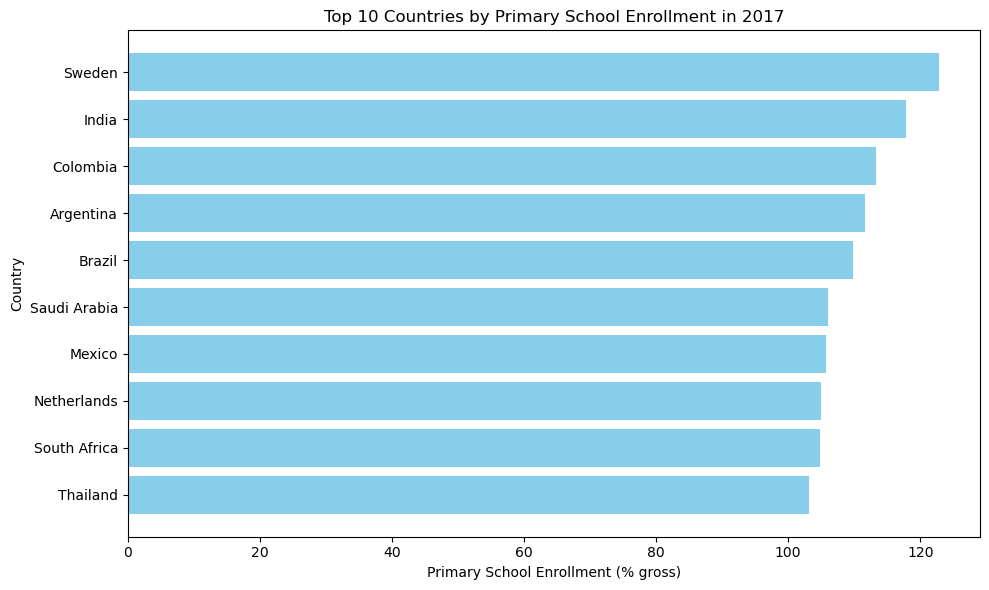

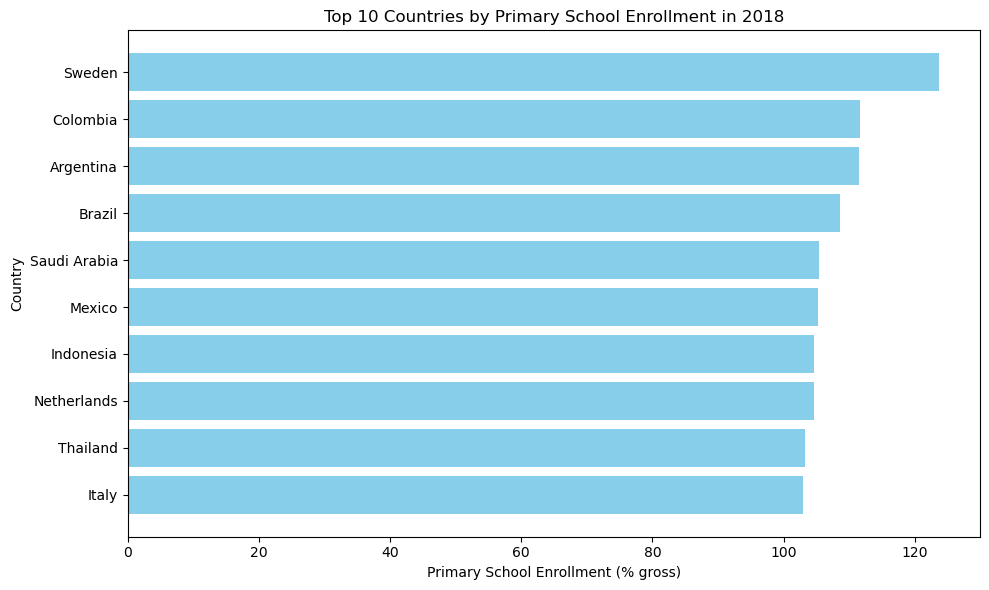

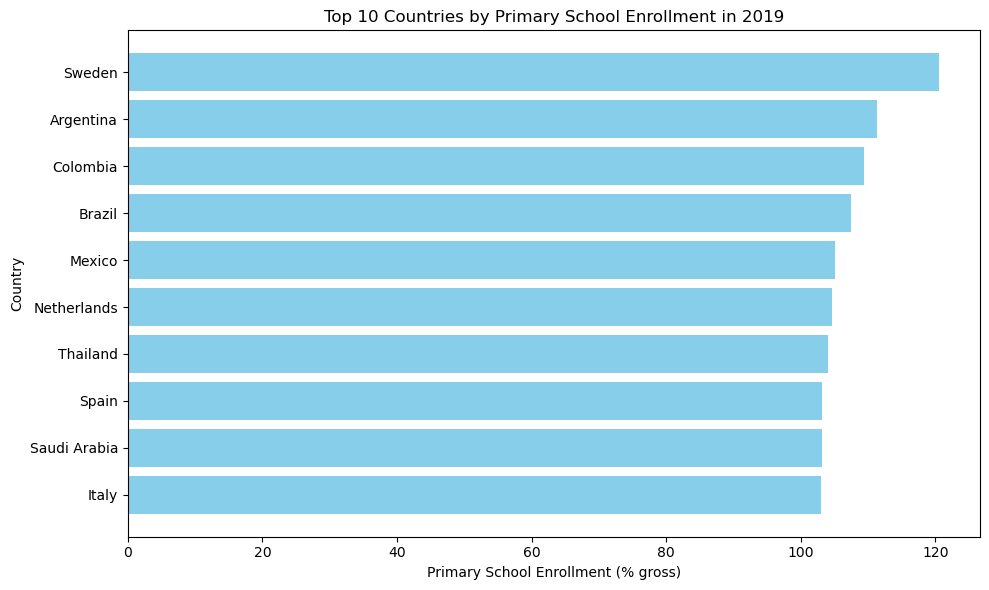

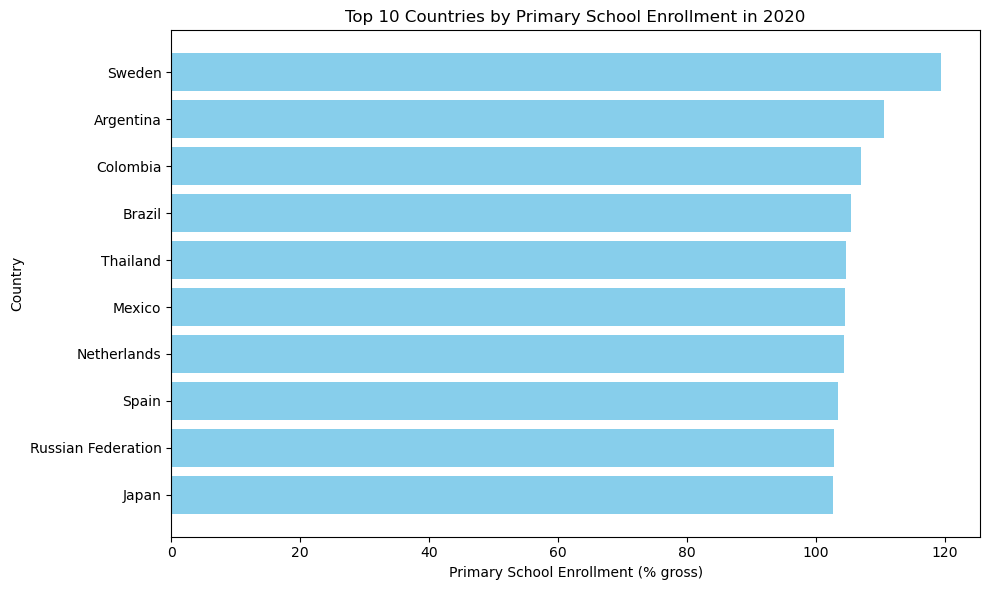

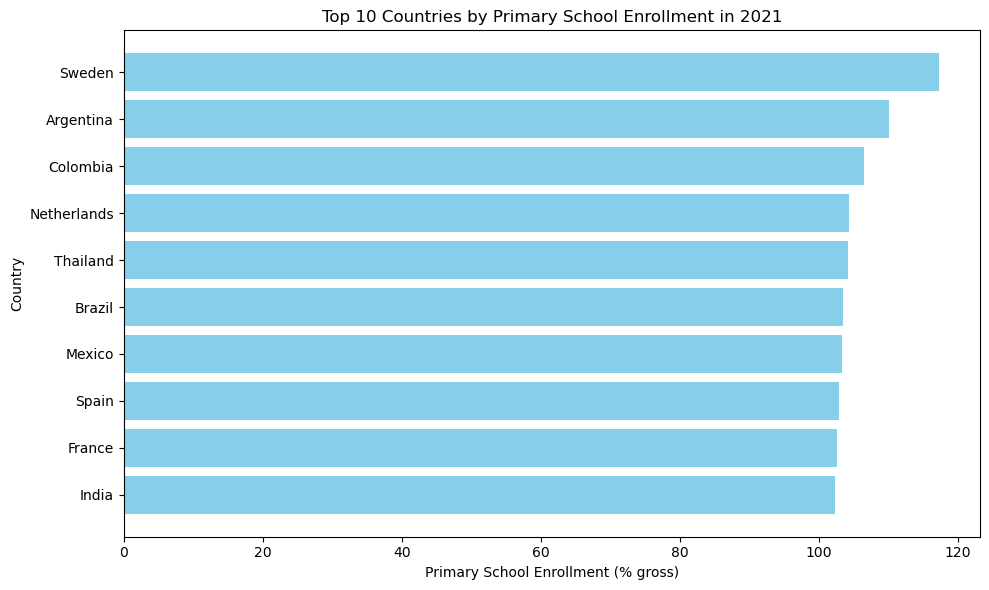

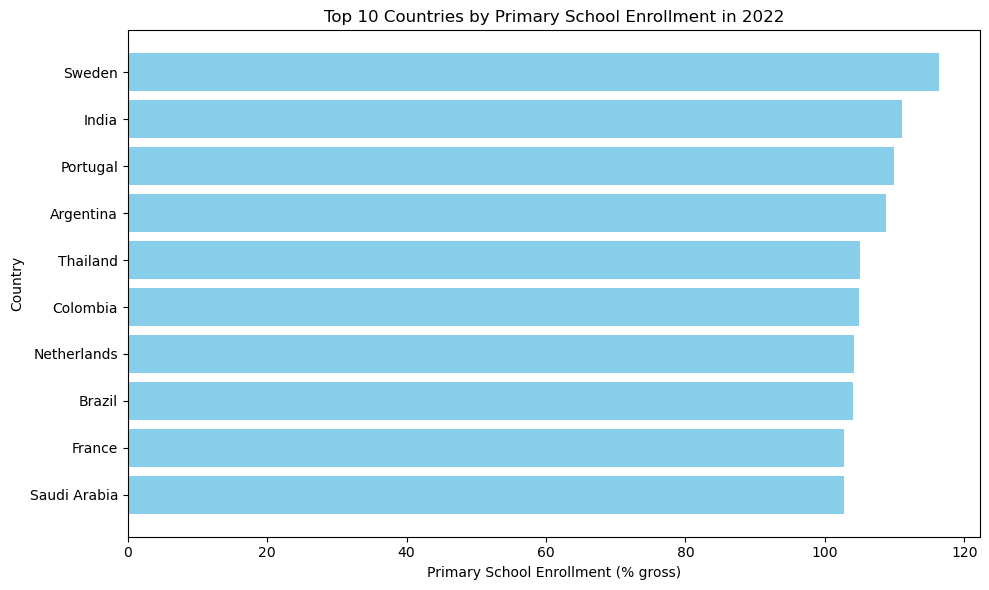

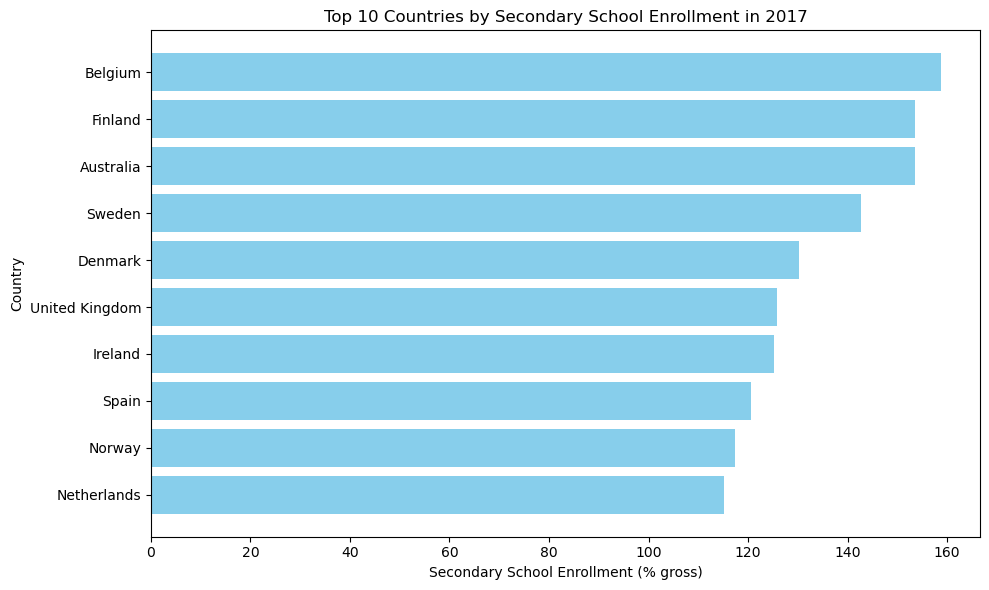

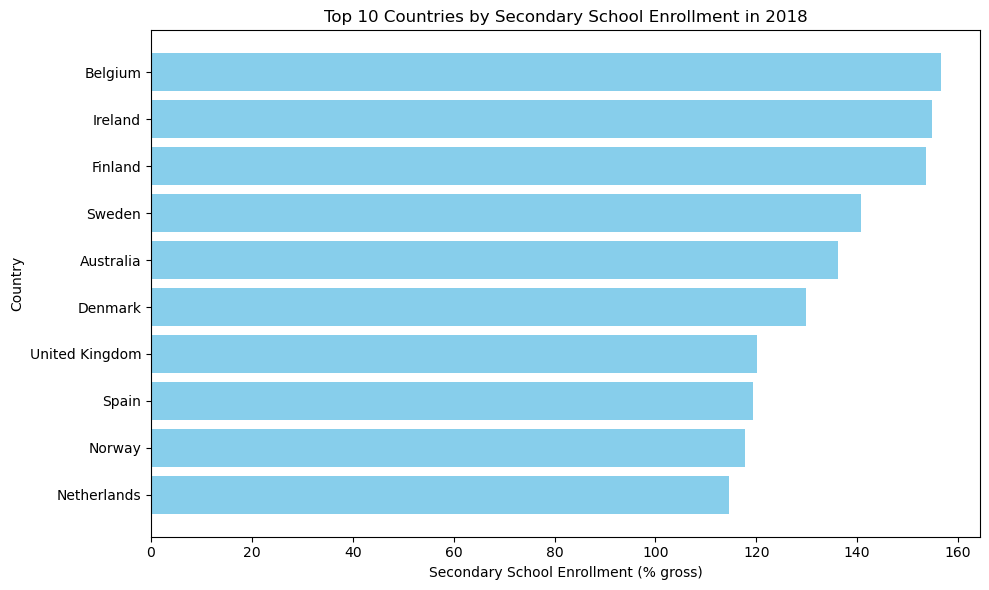

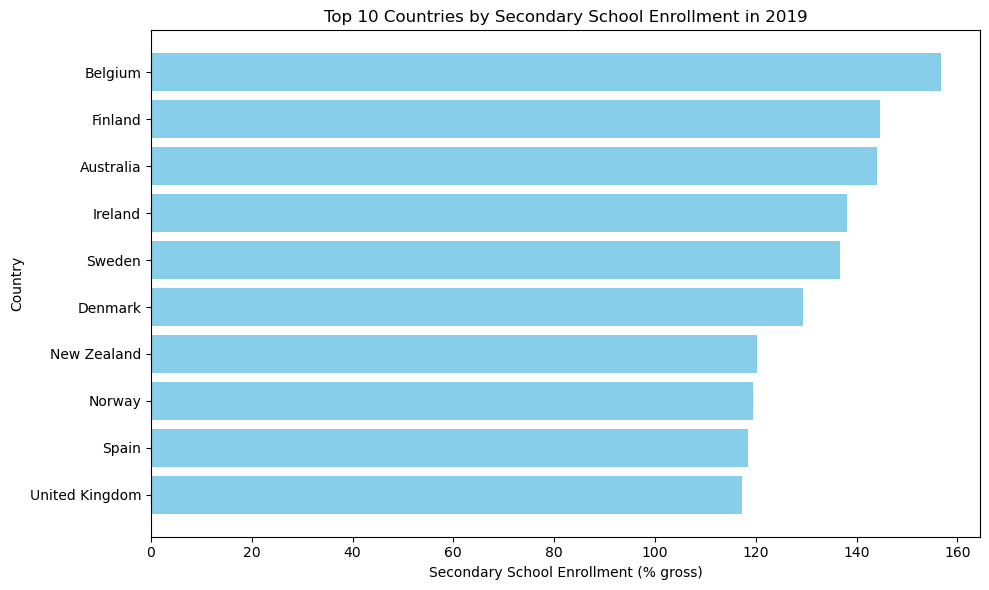

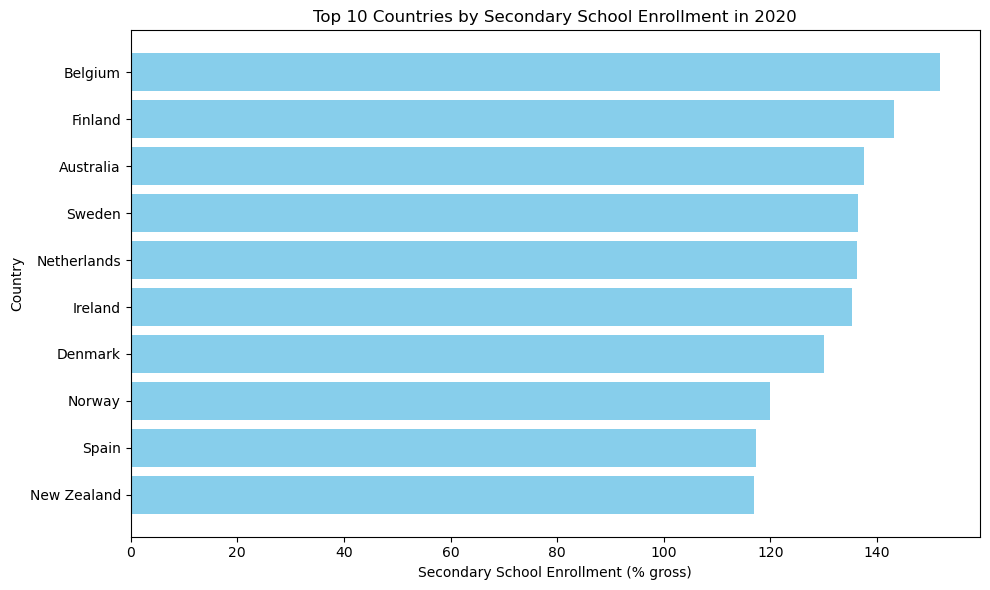

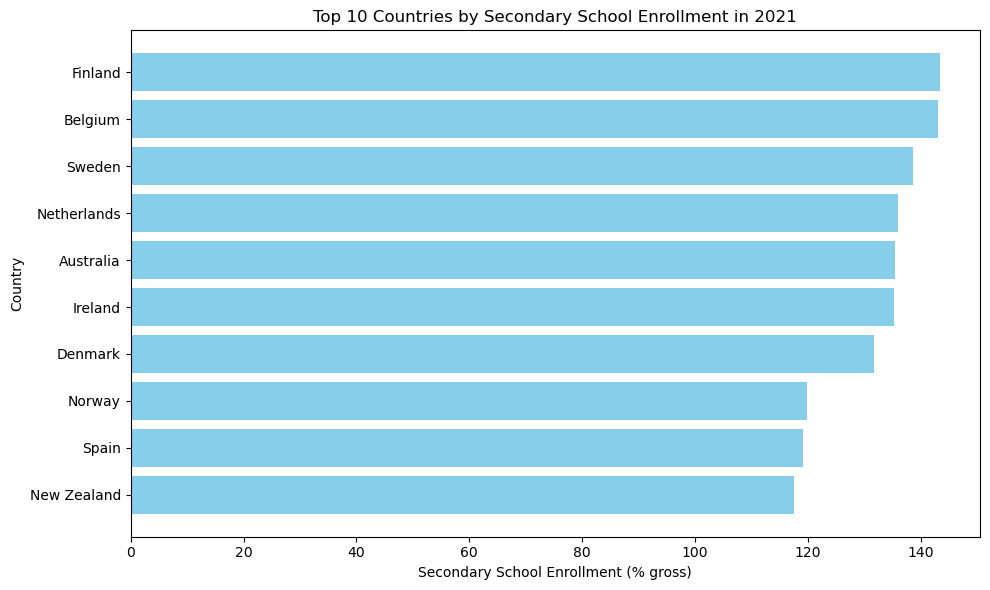

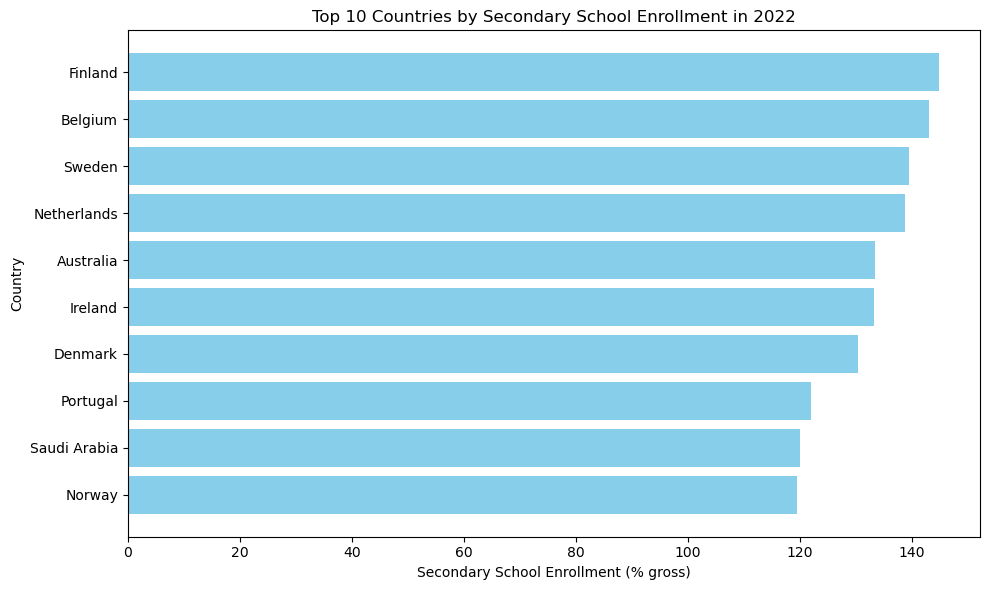

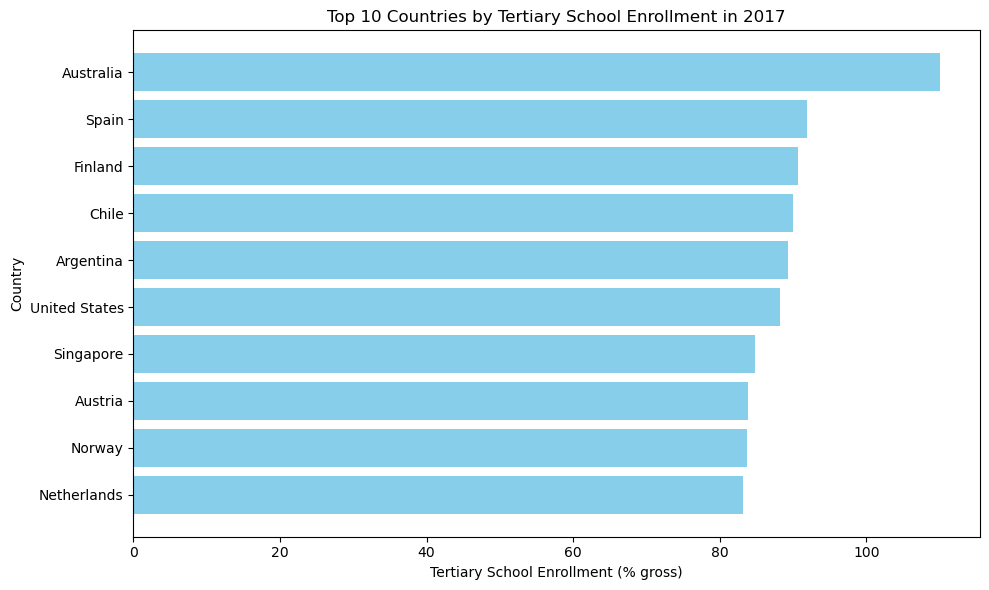

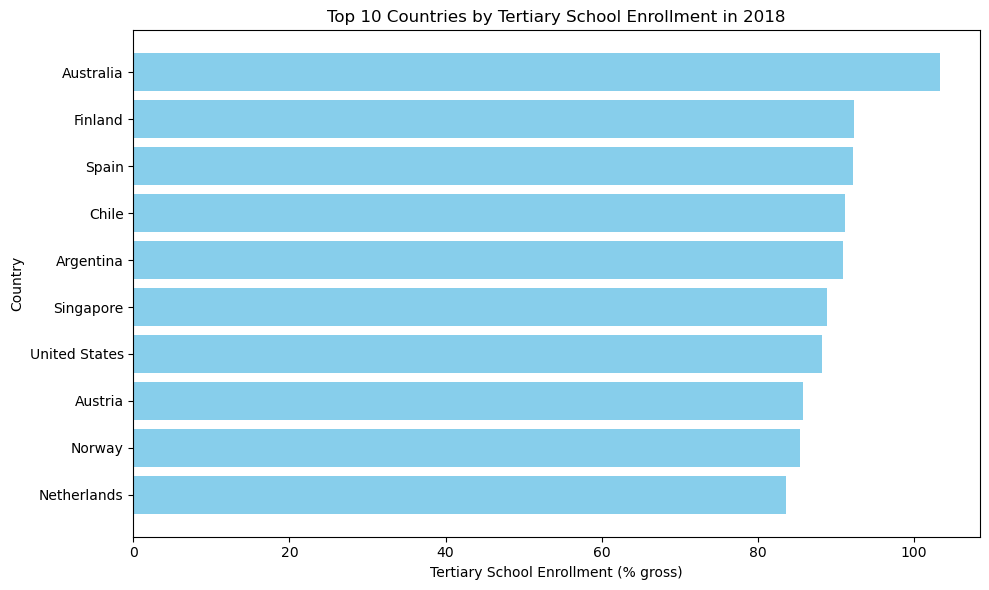

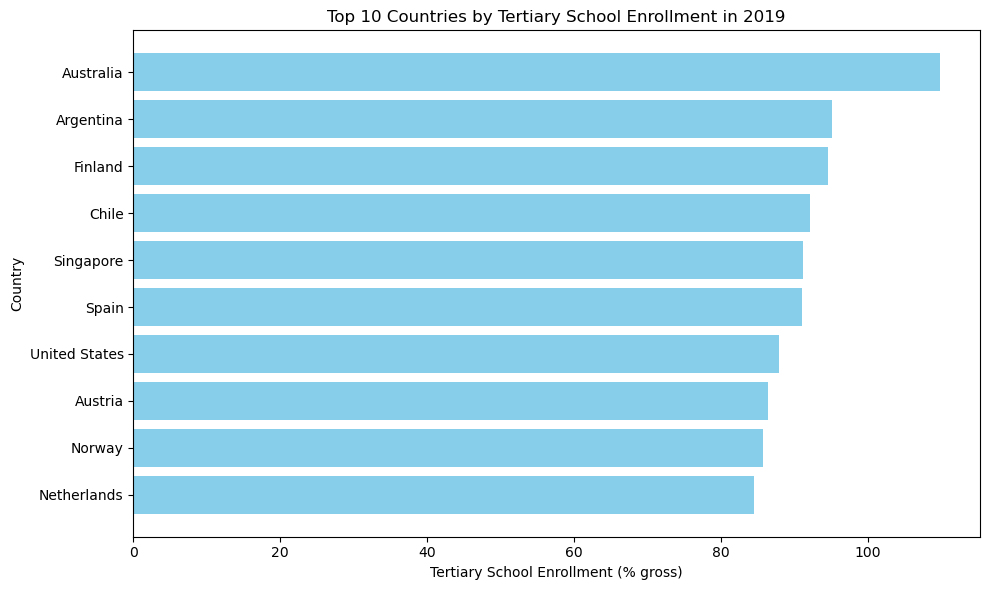

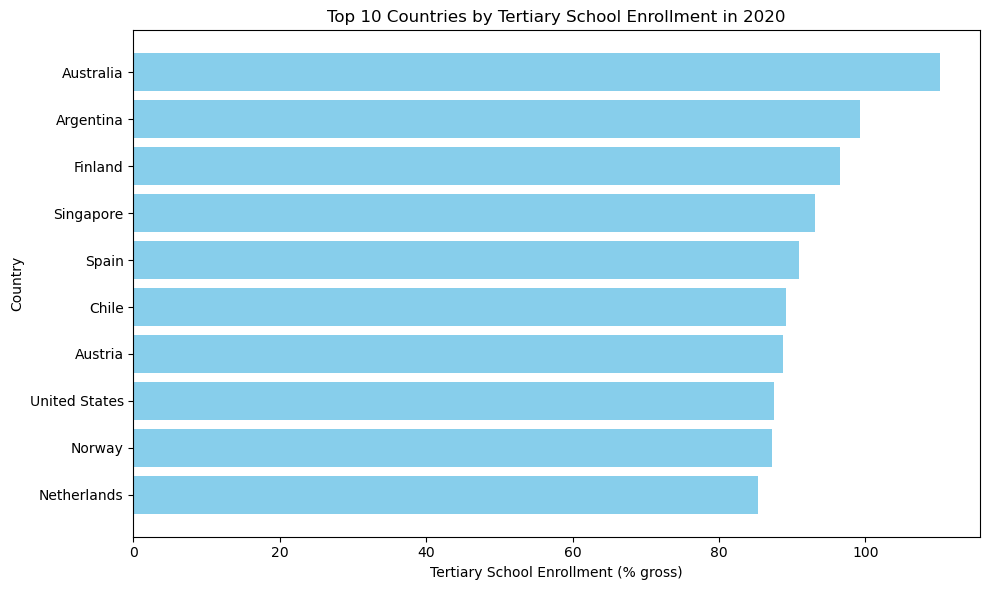

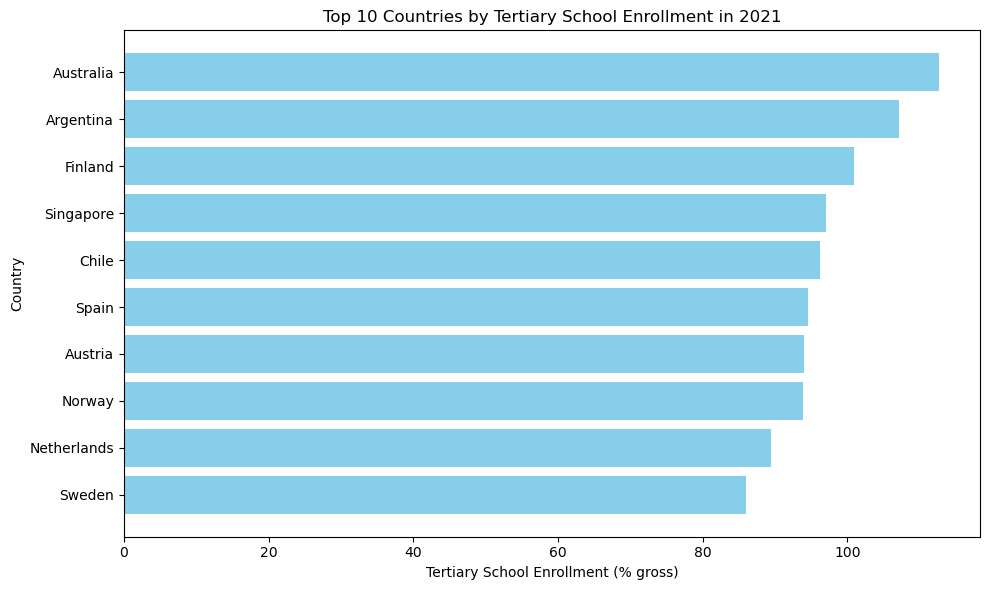

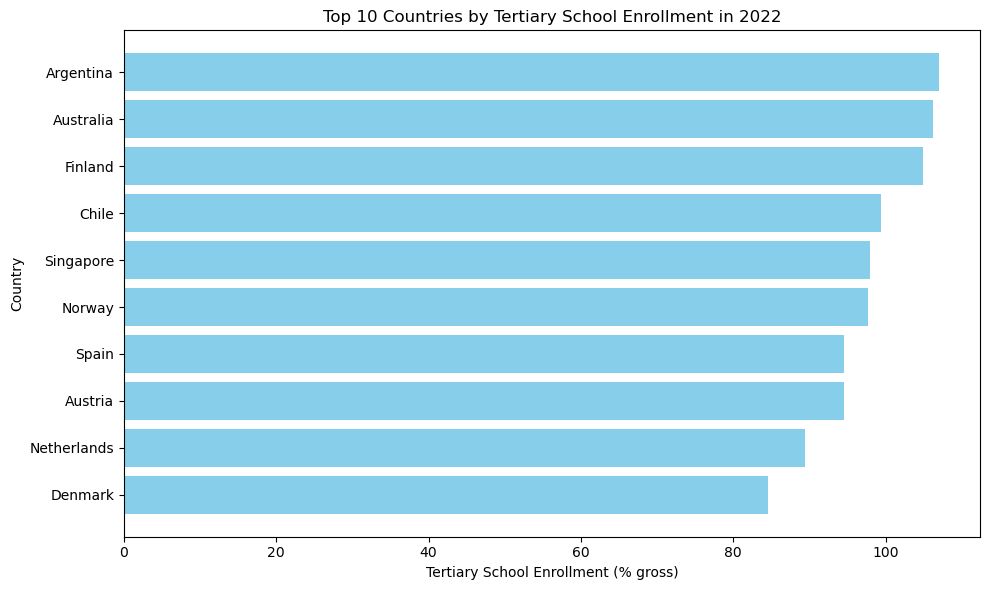

In [125]:
import matplotlib.pyplot as plt

def get_top10_per_year(df, value_col):
    """
    Return top-10 countries per year for the given value column.
    Expects columns: ['country','year', value_col]
    """
    return (
        df
        .sort_values(["year", value_col], ascending=[True, False])
        .groupby("year")
        .head(10)
        .reset_index(drop=True)
    )

def plot_top10_per_year(top10_df, value_col, label, units="(% gross)"):
    """
    Horizontal bar charts of top-10 per year for a given indicator.
    """
    for year, group in top10_df.groupby("year"):
        plt.figure(figsize=(10, 6))
        group_sorted = group.sort_values(value_col, ascending=False)
        plt.barh(group_sorted["country"], group_sorted[value_col], color="skyblue")
        plt.xlabel(f"{label} {units}")
        plt.ylabel("Country")
        plt.title(f"Top 10 Countries by {label} in {int(year)}")
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()

# --- Build top-10s ---
top10_primary   = get_top10_per_year(merged_edu_ind_subset, "school_enrol_primary_pct")
top10_secondary = get_top10_per_year(merged_edu_ind_subset, "school_enrol_secondary_pct")
top10_tertiary  = get_top10_per_year(merged_edu_ind_subset, "school_enrol_tertiary_pct")

# --- Plot them (same look as your GDP charts) ---
plot_top10_per_year(top10_primary,   "school_enrol_primary_pct",   "Primary School Enrollment")
plot_top10_per_year(top10_secondary, "school_enrol_secondary_pct", "Secondary School Enrollment")
plot_top10_per_year(top10_tertiary,  "school_enrol_tertiary_pct",  "Tertiary School Enrollment")

In [126]:
# --- Top 10 Tertiary ---
top10_tertiary = (
    merged_edu_ind_subset
    .sort_values(["year", "school_enrol_tertiary_pct"], ascending=[True, False])
    .groupby("year")
    .head(10)
    .reset_index(drop=True) [["country", "year", "school_enrol_tertiary_pct"]]
)
print(top10_tertiary.head(10))

         country  year  school_enrol_tertiary_pct
0      Australia  2017                 109.993309
1          Spain  2017                  91.887741
2        Finland  2017                  90.698387
3          Chile  2017                  89.921989
4      Argentina  2017                  89.232941
5  United States  2017                  88.167389
6      Singapore  2017                  84.792908
7        Austria  2017                  83.839256
8         Norway  2017                  83.735336
9    Netherlands  2017                  83.200989


### Comparative Analysis 

We will use the `compute_yearly_overlaps` function to calculate year-by-year overlaps between two Top-10 country lists:

- One based on a specific indicator - primary, secondary and tertiary enrolemnts;
- One based on QS Total Score rankings.

In [128]:
# We perform the overlap analysis for the three educational indicators and total_score

prim_df, prim_totals = compute_yearly_overlaps(top10_primary,
                                               top10_total_score_df, "Primary",  baseline="score")
sec_df,  sec_totals  = compute_yearly_overlaps(top10_secondary,
                                               top10_total_score_df, "Secondary", baseline="score")
ter_df,  ter_totals  = compute_yearly_overlaps(top10_tertiary,
                                               top10_total_score_df, "Tertiary",  baseline="score")

2017 → Overlap: 1 countries (10.0%) → ['Netherlands']
2018 → Overlap: 1 countries (10.0%) → ['Netherlands']
2019 → Overlap: 1 countries (10.0%) → ['Netherlands']
2020 → Overlap: 2 countries (20.0%) → ['Japan', 'Netherlands']
2021 → Overlap: 1 countries (10.0%) → ['Netherlands']
2022 → Overlap: 1 countries (10.0%) → ['Netherlands']

=== TOTAL (sum-based) ===
Overlaps: 7 over baseline 60 → 11.7%
=== UNIQUE (set-based across period) ===
Unique overlap countries: 2 / 25 (8.0%)
2017 → Overlap: 3 countries (30.0%) → ['Australia', 'Netherlands', 'United Kingdom']
2018 → Overlap: 3 countries (30.0%) → ['Australia', 'Netherlands', 'United Kingdom']
2019 → Overlap: 2 countries (20.0%) → ['Australia', 'United Kingdom']
2020 → Overlap: 2 countries (20.0%) → ['Australia', 'Netherlands']
2021 → Overlap: 2 countries (20.0%) → ['Australia', 'Netherlands']
2022 → Overlap: 2 countries (20.0%) → ['Australia', 'Netherlands']

=== TOTAL (sum-based) ===
Overlaps: 14 over baseline 60 → 23.3%
=== UNIQUE (set-

| Indicator (Enrollment %) | Year | Overlap Countries | Overlap Count | Overlap % |
|--------------------------|------|-------------------|---------------|-----------|
| **Primary**              | 2017 | Netherlands | 1 | 10.0% |
|                          | 2018 | Netherlands | 1 | 10.0% |
|                          | 2019 | Netherlands | 1 | 10.0% |
|                          | 2020 | Japan, Netherlands | 2 | 20.0% |
|                          | 2021 | Netherlands | 1 | 10.0% |
|                          | 2022 | Netherlands | 1 | 10.0% |
| **TOTAL**                |      |               | **7 / 60** | **11.7%** |
| **Secondary**            | 2017 | Australia, Netherlands, United Kingdom | 3 | 30.0% |
|                          | 2018 | Australia, Netherlands, United Kingdom | 3 | 30.0% |
|                          | 2019 | Australia, United Kingdom | 2 | 20.0% |
|                          | 2020 | Australia, Netherlands | 2 | 20.0% |
|                          | 2021 | Australia, Netherlands | 2 | 20.0% |
|                          | 2022 | Australia, Netherlands | 2 | 20.0% |
| **TOTAL**                |      |               | **14 / 60** | **23.3%** |
| **Tertiary**             | 2017 | Australia, Netherlands, United States | 3 | 30.0% |
|                          | 2018 | Australia, Netherlands, United States | 3 | 30.0% |
|                          | 2019 | Australia, Netherlands, United States | 3 | 30.0% |
|                          | 2020 | Australia, Netherlands, United States | 3 | 30.0% |
|                          | 2021 | Australia, Netherlands | 2 | 20.0% |
|                          | 2022 | Australia, Netherlands | 2 | 20.0% |
| **TOTAL**                |      |               | **16 / 60** | **26.7%** |

#### Discussion & Interpretation
You could structure your discussion like this:

- General Trend

Tertiary enrollment shows the highest total overlap (26.7%), suggesting that countries excelling in higher education participation are more likely to also dominate university rankings.

Primary enrollment has the lowest overlap (11.7%), indicating that near-universal primary education does not strongly correlate with being in the top 10 university rankings. This makes sense — most developed and many developing countries achieve high primary enrollment rates, so it’s not a differentiating factor.

Secondary enrollment sits in between (23.3%), possibly reflecting that strong middle-school-level education pipelines contribute to higher university performance.

- Country-level Patterns

Netherlands appears across all three indicators almost every year, suggesting consistently strong performance across the education spectrum and university rankings.

Australia appears frequently in secondary and tertiary overlaps, but not in primary — possibly because primary education levels are more universally high and less discriminative.

United States appears only in tertiary overlaps, implying that while its higher education enrollment is strong, primary and secondary rates might not be as high relative to other top countries.

- Yearly Stability

Overlap percentages are fairly stable year-to-year within each indicator, suggesting that these relationships are not volatile but rather persistent over the observed period.

- Possible Explanations

Tertiary enrollment is a direct feeder into university systems, so a strong correlation with top university rankings is expected.

Primary and secondary enrollment are necessary but not sufficient — other factors (GDP, R&D spending, government effectiveness) likely play a larger role in determining which countries reach the top rankings.

#### Visualizations

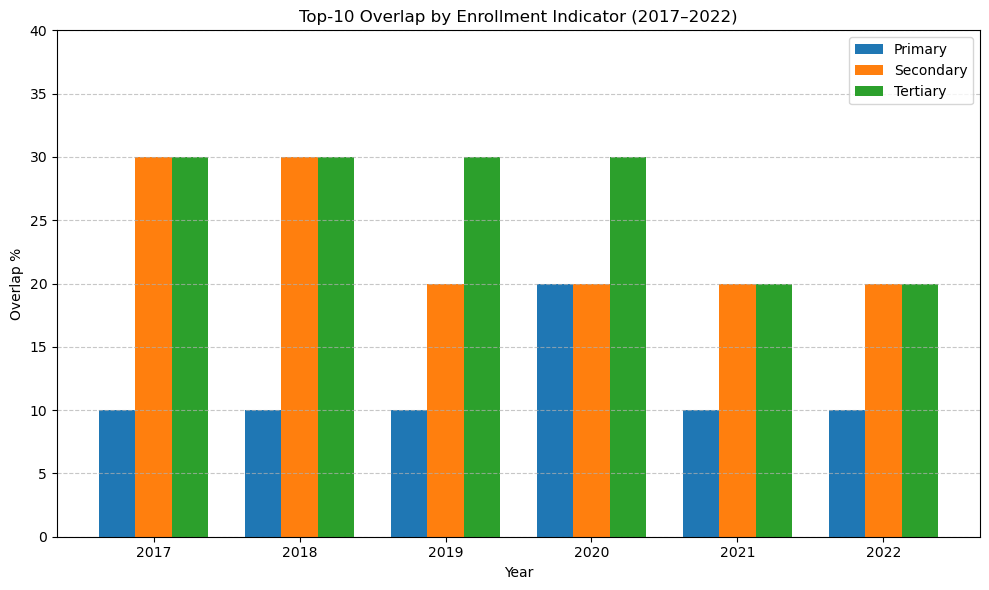

In [132]:
# --- Overlap data ---
data = {
    "Year": [2017, 2018, 2019, 2020, 2021, 2022],
    "Primary":   [10.0, 10.0, 10.0, 20.0, 10.0, 10.0],
    "Secondary": [30.0, 30.0, 20.0, 20.0, 20.0, 20.0],
    "Tertiary":  [30.0, 30.0, 30.0, 30.0, 20.0, 20.0]
}

df = pd.DataFrame(data)

# --- Plot ---
plt.figure(figsize=(10, 6))
bar_width = 0.25
x = range(len(df["Year"]))

plt.bar([p - bar_width for p in x], df["Primary"], width=bar_width, label="Primary")
plt.bar(x, df["Secondary"], width=bar_width, label="Secondary")
plt.bar([p + bar_width for p in x], df["Tertiary"], width=bar_width, label="Tertiary")

# --- Styling ---
plt.xticks(x, df["Year"])
plt.ylabel("Overlap %")
plt.xlabel("Year")
plt.title("Top-10 Overlap by Enrollment Indicator (2017–2022)")
plt.ylim(0, 40)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

## Correlation Analysis

#### Overview 

The second part of the project applies classical statistical correlation techniques — Pearson’s correlation coefficient, Spearman’s rank correlation, and Kendall’s tau — to quantify relationships between the QS total score and each key national indicator. We believe that this combined approach provides both descriptive and inferential insights, clarifying how national conditions (economic, social, and educational) align with global academic performance.

Interpretation Example: "Countries with higher GDP and R&D spending generally show stronger average university rankings. However, outliers exist, suggesting that other factors (e.g., education policy, culture) may also influence rank."

### Economic Indicators

In [136]:
# Expected inputs:
# total_score_df: [country, year, total_score, num_universities, avg_score]
# gdp_pc_long:    [country, year, gdp_per_capita]
# gov_long:       [country, year, gov_effectiveness]
# rd_long:        [country, year, rd_exp_gdp]
# edu_long:       [country, year, gov_edu_exp]

merged_all = (
    total_score_df
    .merge(gdp_pc_long, on=["country","year"], how="left")
    .merge(gov_long,    on=["country","year"], how="left")
    .merge(rd_long,     on=["country","year"], how="left")
    .merge(edu_long,    on=["country","year"], how="left")
)

print(merged_all.head())

   year    country  total_score  gdp_per_capita  gov_effectiveness  \
0  2017  Argentina         65.8    14532.500931          58.571430   
1  2017  Australia        884.1    53901.714539          91.428574   
2  2017    Austria        139.0    47163.742578          90.952377   
3  2017    Belgium        318.7    44035.323936          85.714287   
4  2017     Brazil        107.0    10080.509282          40.000000   

   rd_exp_gdp  gov_edu_exp  
0     0.55631     5.454320  
1     1.87919     5.321256  
2     3.05656     5.371590  
3     2.66666     6.425340  
4     1.11750     6.320480  


=== Correlation with QS Total Score vs. National Indicators ===
rd_exp_gdp: Pearson r=0.3413 (p=5.86e-07), Spearman ρ=0.5717 (p=4.22e-19), Kendall τ=0.3720 (p=2.87e-15); n=204
gdp_per_capita: Pearson r=0.2822 (p=4.33e-05), Spearman ρ=0.4597 (p=4.6e-12), Kendall τ=0.3185 (p=1.34e-11); n=204
gov_effectiveness: Pearson r=0.2725 (p=8.03e-05), Spearman ρ=0.4887 (p=1.22e-13), Kendall τ=0.3079 (p=7.07e-11); n=204
gov_edu_exp: Pearson r=0.0879 (p=0.211), Spearman ρ=0.1551 (p=0.0268), Kendall τ=0.1084 (p=0.0213); n=204


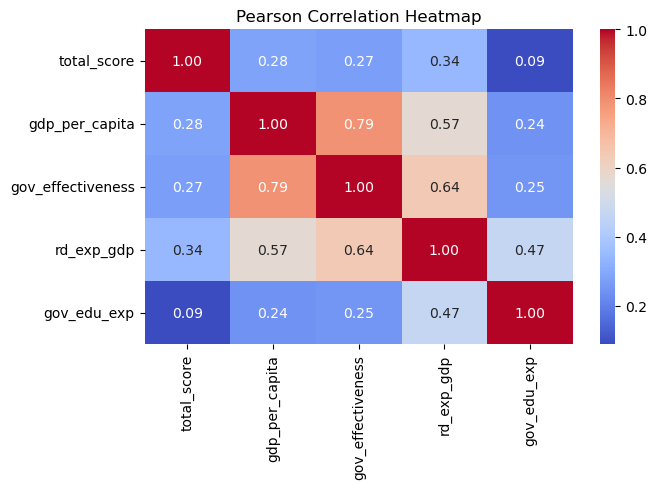

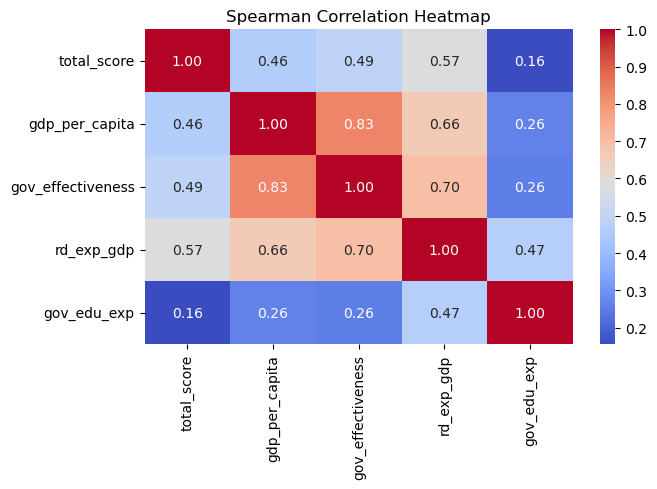

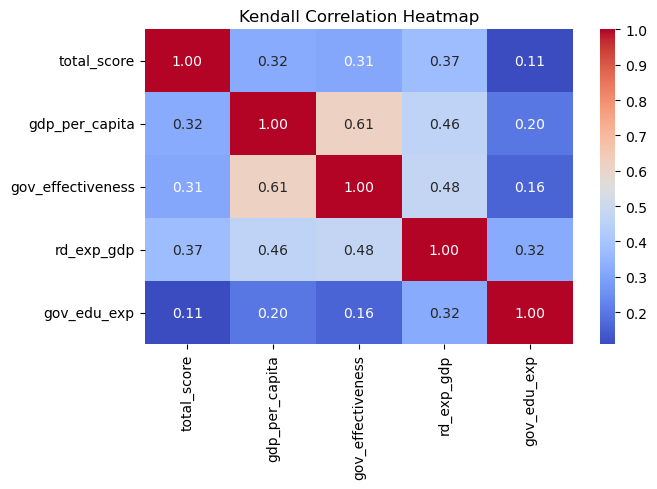

In [137]:
# 1) Select columns and make a clean frame
focus_cols = [
    "total_score",      # target
    "gdp_per_capita",
    "gov_effectiveness",
    "rd_exp_gdp",
    "gov_edu_exp"
]
corr_df = merged_all[focus_cols].dropna()

# 2) Full correlation matrices (for heatmaps)
pearson_mat  = corr_df.corr(method="pearson")
spearman_mat = corr_df.corr(method="spearman")
kendall_mat  = corr_df.corr(method="kendall")

# 3) Target-wise correlations (coef + p-value) in one tidy table
def correlate_to_target(df: pd.DataFrame, target: str, features: list[str]) -> pd.DataFrame:
    rows = []
    for feat in features:
        sub = df[[target, feat]].dropna()
        x, y = sub[target].to_numpy(), sub[feat].to_numpy()

        pr, pp = pearsonr(x, y)
        sr, sp = spearmanr(x, y)          # rank-based, monotonic
        tr, tp = kendalltau(x, y)         # concordance of pairs

        rows.append({
            "feature": feat,
            "pearson_r": pr,   "pearson_p": pp,
            "spearman_rho": sr,"spearman_p": sp,
            "kendall_tau": tr, "kendall_p": tp,
            "n": len(sub)
        })
    out = pd.DataFrame(rows)
    return out.sort_values(by="pearson_r", ascending=False).reset_index(drop=True)

target = "total_score"
features = [c for c in focus_cols if c != target]
corr_table = correlate_to_target(corr_df, target, features)

# 4) Pretty print a compact summary
title = "QS Total Score vs. National Indicators"
print(f"=== Correlation with {title} ===")
for _, r in corr_table.iterrows():
    print(
        f"{r['feature']}: "
        f"Pearson r={r['pearson_r']:.4f} (p={r['pearson_p']:.3g}), "
        f"Spearman ρ={r['spearman_rho']:.4f} (p={r['spearman_p']:.3g}), "
        f"Kendall τ={r['kendall_tau']:.4f} (p={r['kendall_p']:.3g}); n={int(r['n'])}"
    )

# 5) Heatmaps (optional)
plt.figure(figsize=(7,5))
sns.heatmap(pearson_mat, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Pearson Correlation Heatmap"); plt.tight_layout(); plt.show()

plt.figure(figsize=(7,5))
sns.heatmap(spearman_mat, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Spearman Correlation Heatmap"); plt.tight_layout(); plt.show()

plt.figure(figsize=(7,5))
sns.heatmap(kendall_mat, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Kendall Correlation Heatmap"); plt.tight_layout(); plt.show()


### Educational Indicators

In [139]:
indicators = ["school_enrol_primary_pct", "school_enrol_secondary_pct", "school_enrol_tertiary_pct"]

results = []
for ind in indicators:
    pearson_r, pearson_p = pearsonr(merged_edu_ind[ind], merged_edu_ind["total_score"])
    spearman_r, spearman_p = spearmanr(merged_edu_ind[ind], merged_edu_ind["total_score"])
    kendall_r, kendall_p = kendalltau(merged_edu_ind[ind], merged_edu_ind["total_score"])
    
    results.append({
        "Indicator": ind,
        "Pearson_r": pearson_r, "Pearson_p": pearson_p,
        "Spearman_r": spearman_r, "Spearman_p": spearman_p,
        "Kendall_tau": kendall_r, "Kendall_p": kendall_p
    })

corr_df = pd.DataFrame(results)
print(corr_df)

                    Indicator  Pearson_r  Pearson_p  Spearman_r    Spearman_p  \
0    school_enrol_primary_pct  -0.008614   0.897761    0.068877  3.036592e-01   
1  school_enrol_secondary_pct   0.056760   0.396808    0.272035  3.533120e-05   
2   school_enrol_tertiary_pct   0.223344   0.000740    0.371665  8.857700e-09   

   Kendall_tau     Kendall_p  
0     0.046848  2.958146e-01  
1     0.166428  2.040017e-04  
2     0.230204  2.767899e-07  


In [140]:
focus_cols = ["total_score"] + indicators
corr_data = merged_edu_ind[focus_cols].dropna()

# Pearson, Spearman, Kendall matrices
pearson_mat  = corr_data.corr(method="pearson")
spearman_mat = corr_data.corr(method="spearman")
kendall_mat  = corr_data.corr(method="kendall")

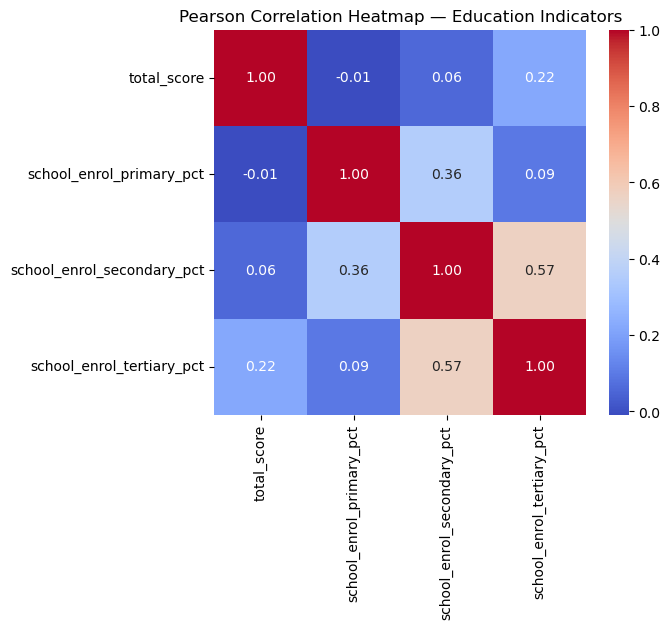

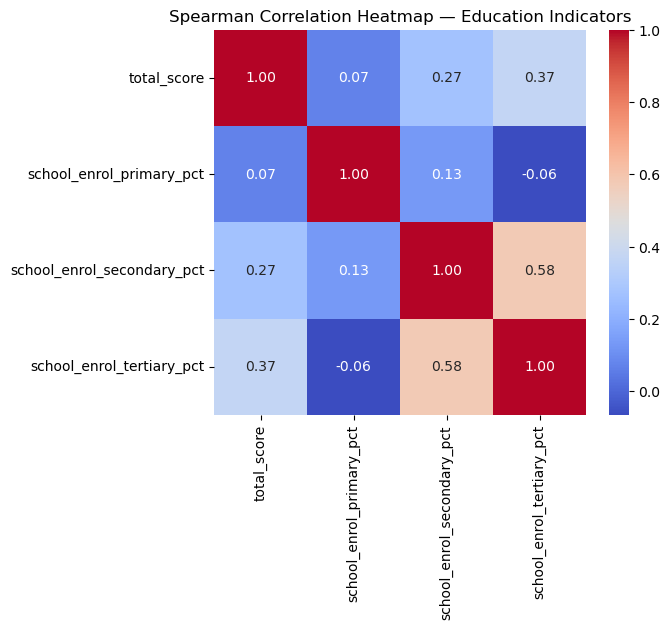

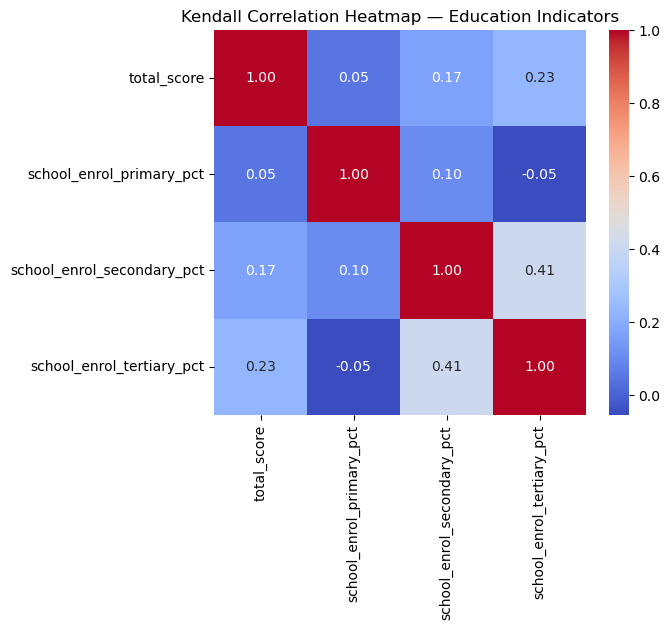

In [141]:
plt.figure(figsize=(6,5))
sns.heatmap(pearson_mat, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Pearson Correlation Heatmap — Education Indicators")
plt.show()

plt.figure(figsize=(6,5))
sns.heatmap(spearman_mat, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Spearman Correlation Heatmap — Education Indicators")
plt.show()

plt.figure(figsize=(6,5))
sns.heatmap(kendall_mat, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Kendall Correlation Heatmap — Education Indicators")
plt.show()

#### Economic Indicators vs. Total Score

| Indicator                                    | Pearson r (p)                   | Spearman ρ (p)                 | Kendall τ (p)                  | Interpretation               |
|----------------------------------------------|----------------------------------|---------------------------------|---------------------------------|--------------------------------|
| GDP per capita                               | 0.3032 (**4.89×10⁻⁶**)           | 0.5255 (**6.02×10⁻¹⁷**)         | 0.3746 (**1.62×10⁻¹⁶**)         | Moderate positive              |
| Gov. expenditure on education (% GDP)        | 0.1182 (0.0809)                  | 0.2294 (**0.0006235**)          | 0.1600 (**0.0004323**)          | Weak positive                  |
| Government effectiveness                     | 0.2974 (**7.53×10⁻⁶**)           | 0.5589 (**2.16×10⁻¹⁹**)         | 0.3668 (**8.11×10⁻¹⁶**)         | Moderate positive              |
| R&D expenditure (% GDP)                      | 0.3576 (**8.02×10⁻⁸**)           | 0.6235 (**2.43×10⁻²⁴**)         | 0.4143 (**2.51×10⁻¹⁹**)         | Moderate-to-strong positive    |

**Note:**  
- **Bold p-values** indicate statistical significance at p < 0.05.  
- Pearson measures *linear* relationships, Spearman measures *monotonic* relationships, and Kendall measures *rank concordance*.  


#### Educational Indicators vs. Total Score

| Indicator                     | Pearson r (p)                | Spearman ρ (p)                 | Kendall τ (p)                 | Interpretation               |
|--------------------------------|------------------------------|---------------------------------|--------------------------------|--------------------------------|
| Primary school enrollment (%)  | -0.0166 (0.8076)              | 0.0252 (0.7108)                 | 0.0206 (0.6506)                | No correlation                 |
| Secondary school enrollment (%)| 0.0465 (0.4939)               | 0.2423 (**2.96×10⁻⁴**)          | 0.1446 (**0.001454**)          | Weak positive                   |
| Tertiary school enrollment (%) | 0.2161 (**0.001294**)         | 0.3516 (**9.01×10⁻⁸**)          | 0.2167 (**2×10⁻⁶**)            | Moderate positive               |

**Note:**  
- **Bold p-values** indicate statistical significance at p < 0.05.  
- Pearson measures *linear* relationships, Spearman measures *monotonic* relationships, and Kendall measures *rank concordance*.  

#### Discussion - Correlations Analysis with Total Score

The correlation analysis reveals consistent and statistically significant relationships between certain economic and educational indicators and the total score of countries in the QS World University Rankings.

**Economic indicators** show that GDP per capita, government effectiveness, and R&D expenditure (% of GDP) all have moderate positive correlations with total score across all three statistical measures (Pearson, Spearman, Kendall). Notably, R&D expenditure exhibits the strongest association (Pearson r = 0.358, Spearman ρ = 0.624, Kendall τ = 0.414), suggesting that higher investment in research and development aligns strongly with better university rankings. Government expenditure on education (% of GDP) shows weaker correlations, with only the rank-based measures (Spearman and Kendall) reaching statistical significance, indicating that the magnitude of spending alone may not capture the quality or efficiency of investment. 
Countries with higher GDP and R&D spending generally show stronger average university rankings. However, outliers exist, suggesting that other factors (e.g., education policy, culture) may also influence rank.

**Educational indicators** present a more varied pattern. Primary school enrollment shows no significant correlation with total score, which is expected given its near-universal levels across countries. Secondary school enrollment has a weak but significant positive association in rank-based measures, while tertiary school enrollment stands out with moderate, significant correlations in all three methods (Pearson r = 0.216, Spearman ρ = 0.352, Kendall τ = 0.217). This suggests that greater participation in higher education is meaningfully linked to stronger university performance at the national level.

Overall, the findings highlight that while economic capacity and institutional effectiveness are important, the most relevant educational factor for university rankings is the proportion of the population engaged in tertiary education, supported by targeted research and development investment.

## Limitations and Sensitivity Analysis

While the correlation analysis provides valuable insights into the alignment between national indicators and university rankings, several limitations should be acknowledged:  

**Data Gaps and Missing Values**  
   - The World Bank datasets (GDP, government effectiveness, R&D expenditure, government spending on education, and school enrollment rates) contain substantial missing values, particularly for smaller economies and developing countries.  
   - In some cases, entire countries or specific years are absent, reducing the representativeness of the global sample.  
   - Interpolation and imputation methods were applied to mitigate this issue, but such procedures introduce uncertainty and may bias correlations if missingness is systematically related to country characteristics (e.g., low data availability in lower-income countries).  

**Different Educational Systems and Reporting Standards**  
   - Indicators such as primary, secondary, and tertiary enrollment rates may not be strictly comparable across countries due to variations in definitions, reporting practices, and the structure of national education systems.  
   - These inconsistencies may weaken or distort observed relationships between enrollment metrics and QS rankings.  

**Assumption of Linearity**  
   - Pearson correlation assumes linear relationships, which may not fully capture more complex, non-linear dynamics (e.g., diminishing returns of GDP growth on academic rankings).  
   - Spearman’s rho and Kendall’s tau mitigate this by considering monotonic rank-based associations, but these too may overlook threshold effects or nonlinearities present in the data.  

**Temporal Sensitivity**  
   - The analysis covers a limited time window (2017–2022). Correlation patterns may shift if a longer historical perspective is considered, especially for variables like R&D expenditure or education spending, where impacts often materialize with significant lag.  

**Selection Bias in Rankings**  
   - The QS World University Rankings themselves reflect methodological choices (weights on reputation surveys, faculty/student ratio, etc.) that may not fully capture educational or economic conditions.  
   - Correlations therefore reveal associations between QS-specific ranking constructs and indicators, not necessarily broader measures of academic quality.  

### Sensitivity Analysis  
To address these limitations, robustness checks include:  
- Comparing results across **different correlation measures** (Pearson, Spearman, Kendall) to verify consistency.  
- Testing the impact of excluding countries or years with high proportions of missing data.  
- Exploring alternative baselines (e.g., using average rank instead of total score).  
- Considering subgroup analyses by **income level or geographic region** to control for heterogeneity. 

## Overall Analysis 

The combined findings from the overlap and correlation analyses reveal a nuanced relationship between national indicators and performance in the QS World University Rankings. Several overarching themes emerge:  

### 1. Divergent Role of Economic Indicators  
- **GDP per capita** shows limited explanatory power for QS Top-10 membership. Wealth alone does not translate into globally competitive universities, as evidenced by the very low overlap (8.3%).  
- **Government expenditure on education (% of GDP)** demonstrates no meaningful association with top university performance. This suggests that **how resources are allocated and used matters more than how much is spent**.  
- **R&D expenditure (% of GDP)** stands out as the most relevant economic indicator, showing both moderate overlap (20%) and the strongest correlation values (Pearson r = 0.358; Spearman ρ = 0.624). Sustained investment in research appears to be a necessary, though not sufficient, driver of academic excellence.  
- **Government effectiveness** exhibits the highest overlap (31.7%), emphasizing that strong governance and institutional quality are fundamental enablers of globally competitive higher education systems.  

### 2. Patterns in Educational Indicators  
- **Tertiary enrollment** is the clearest educational predictor, with the highest overlap (26.7%) and consistent positive correlations across all statistical measures. Countries with broad participation in higher education tend to have stronger overall university rankings.  
- **Secondary enrollment** shows a weaker but still significant relationship (23.3% overlap; weak positive correlations), suggesting that a solid pipeline at the mid-education level supports higher education outcomes.  
- **Primary enrollment**, while universally high, offers little explanatory value. Its limited overlap (11.7%) reflects that **near-universal access at the primary level does not differentiate top university systems**.  

### 3. Country-Level Consistencies  
A small set of countries appear repeatedly across multiple indicators. **Switzerland** emerges as the most consistent performer, combining wealth, governance quality, and R&D intensity with strong education participation. The **United States** and **Japan** show strength primarily in tertiary enrollment, R&D, and governance. The **Netherlands** demonstrates balance across both economic and educational indicators, highlighting system-wide coherence.  

### 4. Stability of Relationships  
Both overlap and correlation patterns are relatively stable across years (2017–2022). This persistence suggests structural relationships rather than short-term fluctuations, reinforcing the robustness of the findings.  

### 5. Integrated Insight  
The evidence points to a clear conclusion: **university excellence at the national level is less about raw wealth or spending, and more about governance quality, sustained investment in research, and higher education participation**. Primary and secondary education provide foundational benefits but are not differentiators among the global elite. Instead, the pathways to QS Top-10 representation are characterized by **effective governance, strong R&D ecosystems, and inclusive tertiary systems**. 

### Overview  

The combined findings from the overlap and correlation analyses reveal a nuanced relationship between national indicators and performance in the QS World University Rankings. Several overarching themes emerge:  

### Divergent Role of Economic Indicators  
- **GDP per capita** shows limited explanatory power for QS Top-10 membership. Wealth alone does not translate into globally competitive universities, as evidenced by the very low overlap (8.3%).  
- **Government expenditure on education (% of GDP)** demonstrates no meaningful association with top university performance. This suggests that **how resources are allocated and used matters more than how much is spent**.  
- **R&D expenditure (% of GDP)** stands out as the most relevant economic indicator, showing both moderate overlap (20%) and the strongest correlation values (Pearson r = 0.358; Spearman ρ = 0.624). Sustained investment in research appears to be a necessary, though not sufficient, driver of academic excellence.  
- **Government effectiveness** exhibits the highest overlap (31.7%), emphasizing that strong governance and institutional quality are fundamental enablers of globally competitive higher education systems.  

### Patterns in Educational Indicators  
- **Tertiary enrollment** is the clearest educational predictor, with the highest overlap (26.7%) and consistent positive correlations across all statistical measures. Countries with broad participation in higher education tend to have stronger overall university rankings.  
- **Secondary enrollment** shows a weaker but still significant relationship (23.3% overlap; weak positive correlations), suggesting that a solid pipeline at the mid-education level supports higher education outcomes.  
- **Primary enrollment**, while universally high, offers little explanatory value. Its limited overlap (11.7%) reflects that **near-universal access at the primary level does not differentiate top university systems**.  

### Country-Level Consistencies  
A small set of countries appear repeatedly across multiple indicators. **Switzerland** emerges as the most consistent performer, combining wealth, governance quality, and R&D intensity with strong education participation. The **United States** and **Japan** show strength primarily in tertiary enrollment, R&D, and governance. The **Netherlands** demonstrates balance across both economic and educational indicators, highlighting system-wide coherence.  

### Stability of Relationships  
Both overlap and correlation patterns are relatively stable across years (2017–2022). This persistence suggests structural relationships rather than short-term fluctuations, reinforcing the robustness of the findings.  

### Integrated Insight  
The evidence points to a clear conclusion: **university excellence at the national level is less about raw wealth or spending, and more about governance quality, sustained investment in research, and higher education participation**. Primary and secondary education provide foundational benefits but are not differentiators among the global elite. Instead, the pathways to QS Top-10 representation are characterized by **effective governance, strong R&D ecosystems, and inclusive tertiary systems**. 

## What Next?  

While this study provides a first exploration of the links between national indicators and university rankings, several extensions could deepen and broaden the analysis:  

- Multivariate Regression Analysis  
Future work could employ **multiple regression models** to quantify the joint influence of GDP, R&D, governance, and education indicators on QS scores. This would allow us to disentangle the relative contributions of each factor while controlling for others, offering a more precise understanding of their combined effects.  

- Machine Learning Models for Prediction  
Beyond regression, predictive models such as **Random Forests, Gradient Boosting Machines, or Neural Networks** could be developed to forecast QS scores or rankings based on economic and educational features. These models may capture **non-linear relationships and complex interactions** that traditional regression cannot.  

- Time-Series Forecasting 
Methods such as **ARIMA, Prophet, or Long Short-Term Memory (LSTM) neural networks** could be applied to forecast how countries’ university performance might evolve given historical trends in their indicators. This would provide a forward-looking perspective on which countries are likely to rise in the rankings.  

- Broader Indicator Sets  
The analysis could be extended to include additional dimensions such as:  
- **Innovation outputs** (patents, publications, citations)  
- **Internationalization** (student and faculty mobility)  
- **Inequality and inclusivity** in education access  
- **Policy frameworks** for higher education and research  

- Cross-Validation with Other Rankings  
Comparisons with ARWU (Shanghai Rankings), THE (Times Higher Education), or U-Multirank would help assess whether the observed relationships are **QS-specific** or consistent across global ranking systems.  

**In summary**, the next stage of research should move from descriptive overlap and correlation analysis toward **predictive modeling and causal inference**. This progression would not only explain past and present patterns but also help **anticipate the future landscape of global higher education competitiveness**.  


## Conclusion  

This project has explored the relationship between national economic, governance, and educational indicators and performance in the QS World University Rankings. By combining overlap analysis, correlation studies, and indicator-based comparisons, several key insights emerge.  

First, **economic strength alone is insufficient** to explain global university excellence. GDP per capita and government expenditure on education show little to no consistent overlap with QS Top-10 representation. Instead, **governance quality and investment in research and development** emerge as the most meaningful predictors, highlighting the importance of long-term institutional stability and knowledge creation ecosystems.  

Second, **educational pipeline indicators reveal differentiation at the tertiary level**. While primary and secondary enrollments are near-universal and provide limited explanatory power, tertiary enrollment strongly aligns with better university outcomes, reflecting its direct role in feeding higher education systems.  

Third, the analysis underscores the importance of a **balanced system-wide approach**. Countries such as Switzerland, the Netherlands, Japan, and the United States demonstrate that combinations of effective governance, robust R&D ecosystems, and inclusive higher education access are far more impactful than wealth or spending levels alone.  

Fourth, the observed patterns show **stability over time**, suggesting that these relationships are structural rather than temporary. This reinforces the robustness of the findings and indicates that policies aimed at improving governance, R&D, and tertiary education participation will likely have sustained effects on national university performance.  

At the same time, the study highlights important **limitations**. The reliance on QS rankings as a single measure may bias results toward reputation-driven factors. Missing data in World Bank indicators introduces gaps, and the assumption of linearity in correlations oversimplifies complex dynamics. Different educational systems and cultural contexts may also affect comparability across countries.  

Looking forward, the analysis opens avenues for **future research and predictive modeling**. Multivariate regression could disentangle the relative weight of each factor, while machine learning models may capture non-linear interactions and forecast future university rankings. Time-series forecasting could provide valuable forward-looking insights, and cross-validation with other rankings (ARWU, THE) would strengthen generalizability.  

**In conclusion**, university excellence at the global level is not determined by wealth or spending alone. It is the result of **effective governance, sustained R&D investment, and broad participation in higher education**, reinforced by systemic stability. These findings emphasize that countries seeking to improve their global higher education standing must focus not only on resource levels, but also on the quality, efficiency, and strategic alignment of their education and research policies.  

The project thus contributes to a deeper understanding of the **structural foundations of academic excellence**, while laying the groundwork for more advanced predictive approaches in future work.  


## Acknowledgements and References

Special thanks:
- to padhmam for the QS World University Rankings (2017–2022) dataset.
Link: https://www.kaggle.com/datasets/padhmam/qs-world-university-rankings-2017-2022
- bushraqurban for Gross enrolment: Primary, Secondary, Tertiary (%) - “World Education Dataset” 
Link: https://www.kaggle.com/datasets/bushraqurban/world-education-dataset


Agasisti, T., & Bertoletti, A. (2022). Evaluating the influence of country characteristics on the Higher Education System Rankings’ performance. Studies in Higher Education, 47(9), 1774–1790. https:

Benito, M., Gil, P., Romera, R., & Urquía-Grande, E. (2019). Funding, is it key for standing out in the university rankings? Scientometrics, 121(2), 771–792. https:

Gadd, E. (2021). In praise of rankers: Taking the long view on university rankings. Insights, 34(1), 19. https:

Guo, C. (2023). The effect of higher education initiatives on university rankings: Evidence from global panel data. Humanities and Social Sciences Communications, 10, 127. https://doi.org/10.1057/s41599-023-02034-w

Günay, A. (2022). Economic indicators and global university rankings: A comparative analysis. Journal of Higher Education Policy and Management, 44(6), 579–593. https://dergipark.org.tr/tr/download/article-file/2542024

Kaufmann, D., Kraay, A., & Mastruzzi, M. (2011). The Worldwide Governance Indicators: Methodology and analytical issues. Hague Journal on the Rule of Law, 3(2), 220–246. https://doi.org/10.1017/S1876404511200046

Lu, C. T. K. (2014). World-class universities and GDP per capita: Is there a relationship? Munich Personal RePEc Archive. https://mpra.ub.uni-muenchen.de/53900/

Meo, S. A., Usmani, A. M., Vohra, M. S., & Bukhari, I. A. (2013). Impact of GDP, spending on R&D, number of universities and scientific journals on research publications among Asian countries. PLoS ONE, 8(6), e66449. https://doi.org/10.1371/journal.pone.0066449

Moed, H. F. (2016). A critical comparative analysis of five world university rankings. Scientometrics, 110(2), 967–990. https://doi.org/10.1007/s11192-016-2212-y

Pietrucha, J. (2018). Country-specific determinants of world university rankings. Scientometrics, 114(3), 1129–1139. https://doi.org/10.1007/s11192-017-2628-9

Prathap, G. (2014). The size of higher education, R&D expenditure, academic documents and international rankings. Current Science, 106(4), 518–520. https://doi.org/10.18520/cs/v106/i4/518-520

Selten, F., Neylon, C., Huang, C. K., & Groth, P. (2019). A longitudinal analysis of university rankings. arXiv preprint arXiv:1908.10632. https://arxiv.org/abs/1908.10632

Telias, D. (2014). The contribution of university rankings to country’s GDP per capita. Munich Personal RePEc Archive. https://mpra.ub.uni-muenchen.de/56057/

Whetsell, T. A., Cao, X., Kroll, A., & Grossardt, T. (2019). The influence of governance on scientific performance: A cross-national study. arXiv preprint arXiv:1909.04468. https://arxiv.org/abs/1909.04468